<a href="https://colab.research.google.com/github/MaxGhenis/taxcalc-notebooks/blob/master/random/cps_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore CPS data

In [0]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Graph options

In [2]:
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
mpl.font_manager._rebuild()

--2018-11-10 05:37:23--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2018-11-10 05:37:23--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Roboto-Regular.ttf.1’

Roboto-Regular.ttf. 100%[===================>] 141.94K  --.-KB/s    in 0.04s   

2018-11-10 05:37:

In [0]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Data

#### Load

In [0]:
cps = pd.read_csv('https://github.com/open-source-economics/taxdata/raw/master/cps_data/cps.csv.gz')

In [0]:
# Rename weight column for clarity.
cps.rename(columns={'s006': 'weight'}, inplace=True)

In [6]:
cps.columns

Index(['age_head', 'age_spouse', 'e00200p', 'e00900p', 'e02100p', 'e00200s',
       'e00900s', 'e02100s', 'a_lineno', 'e00600', 'e00800', 'e01500',
       'e02300', 'weight', 'DSI', 'h_seq', 'ffpos', 'fips', 'blind_head',
       'blind_spouse', 'nu18', 'n1820', 'n21', 'ssi_ben', 'vet_ben',
       'snap_ben', 'mcare_ben', 'mcaid_ben', 'e02400', 'tanf_ben',
       'housing_ben', 'wic_ben', 'nu13', 'nu05', 'n24', 'elderly_dependents',
       'f2441', 'EIC', 'XTOT', 'filer', 'FLPDYR', 'MARS', 'e01100', 'e01400',
       'e03300', 'e03270', 'e20400', 'e32800', 'e19200', 'e18500', 'e03240',
       'e17500', 'RECID', 'e18400', 'e00900', 'e00650', 'e00300', 'e00400',
       'e01700', 'e19800', 'e20100', 'e03210', 'e03150', 'agi_bin',
       'other_ben', 'pencon_p', 'pencon_s', 'e00200', 'e02100'],
      dtype='object')

In [7]:
cps.sample(5)

age_head  age_spouse  e00200p  e00900p  e02100p  e00200s  e00900s  \
367035        58          58        0        0        0    69643        0   
132786        50          45    60710        0        0        0    24724   
71167         32           0    51734        0        0        0        0   
58016         41          41        0    10240        0   177600        0   
410827        39           0    26642        0        0        0        0   

        e02100s  a_lineno  e00600   ...    e19800  e20100  e03210  e03150  \
367035        0         1       0   ...      6160    1351       0       0   
132786        0         1       0   ...         0       0     221       0   
71167         0         1       0   ...      4756    1043       0       0   
58016         0         1       0   ...         0       0       0       0   
410827        0         1       0   ...         0       0       0       0   

        agi_bin  other_ben  pencon_p  pencon_s  e00200  e02100  
367035       12          0         0         0   69643       0  
132786       11       8616         0         0   60710       0  
71167         9          0         0         0   51734       0  
58016        12          0         0         0  177600       0  
410827        6       1346         0         0   26642       0  

[5 rows x 69 columns]

In [8]:
cps.sample(5).transpose()

107394  118256  269494  89308   446923
age_head          67      63      24      66      85
age_spouse        62      59       0      57      85
e00200p            0       0   10243       0       0
e00900p            0   79496       0       0       0
e02100p            0       0       0       0       0
e00200s        13962       0       0       0       0
e00900s            0       0       0       0       0
e02100s            0       0       0       0       0
a_lineno           1       1       2       1       1
e00600             0       0       0       0       0
e00800             0       0       0       0       0
e01500         47289       0       0       0  122383
e02300             0       0       0       0       0
weight         47300    4200  152300   43700    6600
DSI                0       0       0       0       0
h_seq          60283   68009   80633   49185   93293
ffpos              1       1       1       1       1
fips               1      40       4      45       6
blind_head         0       0       0       0       0
blind_spouse       0       0       0       0       0
nu18               0       0       0       0       0
n1820              0       0       0       0       0
n21                2       2       1       2       2
ssi_ben            0       0       0       0    8025
vet_ben            0       0       0       0   22450
snap_ben           0       0       0       0       0
mcare_ben      11622   11622       0   11622   11622
mcaid_ben          0       0       0       0       0
e02400         30613   19225       0   10391   18345
tanf_ben           0       0       0       0    3622
...              ...     ...     ...     ...     ...
filer              1       1       1       1       1
FLPDYR          2014    2014    2013    2014    2012
MARS               2       2       1       2       2
e01100         26996       0       0       0       0
e01400             0       0       0       0     806
e03300             0       0       0       0       0
e03270             0       0       0       0       0
e20400             0       0       0       0       0
e32800             0       0       0       0       0
e19200          6476    6391       0       0     131
e18500          3856    3212       0       0    3718
e03240             0       0       0       0       0
e17500             0       0       0       0       0
RECID         107395  118257  269495   89309  446924
e18400          8366    5844     600     500    5889
e00900             0   79496       0       0       0
e00650             0       0       0       0       0
e00300           673     657       6       0     297
e00400             0       0       0       0       0
e01700         27286       0       0       0  122383
e19800          4910    5422       0       0       0
e20100          1076    1189       0       0       0
e03210             0       0       0       0       0
e03150             0       0       0       0       0
agi_bin           11      11       3       3      11
other_ben          0       0       0       0    3278
pencon_p           0       0       0       0       0
pencon_s           0       0       0       0       0
e00200         13962       0   10243       0       0
e02100             0       0       0       0       0

[69 rows x 5 columns]

In [0]:
def cdf(df, col):
  res = df.copy()[[col, 'weight']].sort_values(col)
  res['weight_cumpct'] = res.weight.cumsum() / res.weight.sum()
  return res

In [0]:
from matplotlib.ticker import MaxNLocator

def plot_cdf(df, col, unit_prepend=''):
  df_cdf = cdf(df, col)
  ax = df_cdf.plot(x=col, y='weight_cumpct')
  ax.grid(color='#eeeeee')
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  # Assume a dollar amount if exceeds 100. Use symlog and $ axis.
  if df[col].max() > 100:
    unit_prepend = '$'
    plt.xscale('symlog')
  ax.get_legend().remove()
  ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(
      lambda x, _: unit_prepend + format(int(x), ',')))
  ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
      lambda y, _: '{:.0%}'.format(y)))
  ax.set(xlabel=col, ylabel='Share of weighted records')
  plt.title('CDF of ' + col, loc='left')
  sns.despine(left=True, bottom=True)
  plt.show()

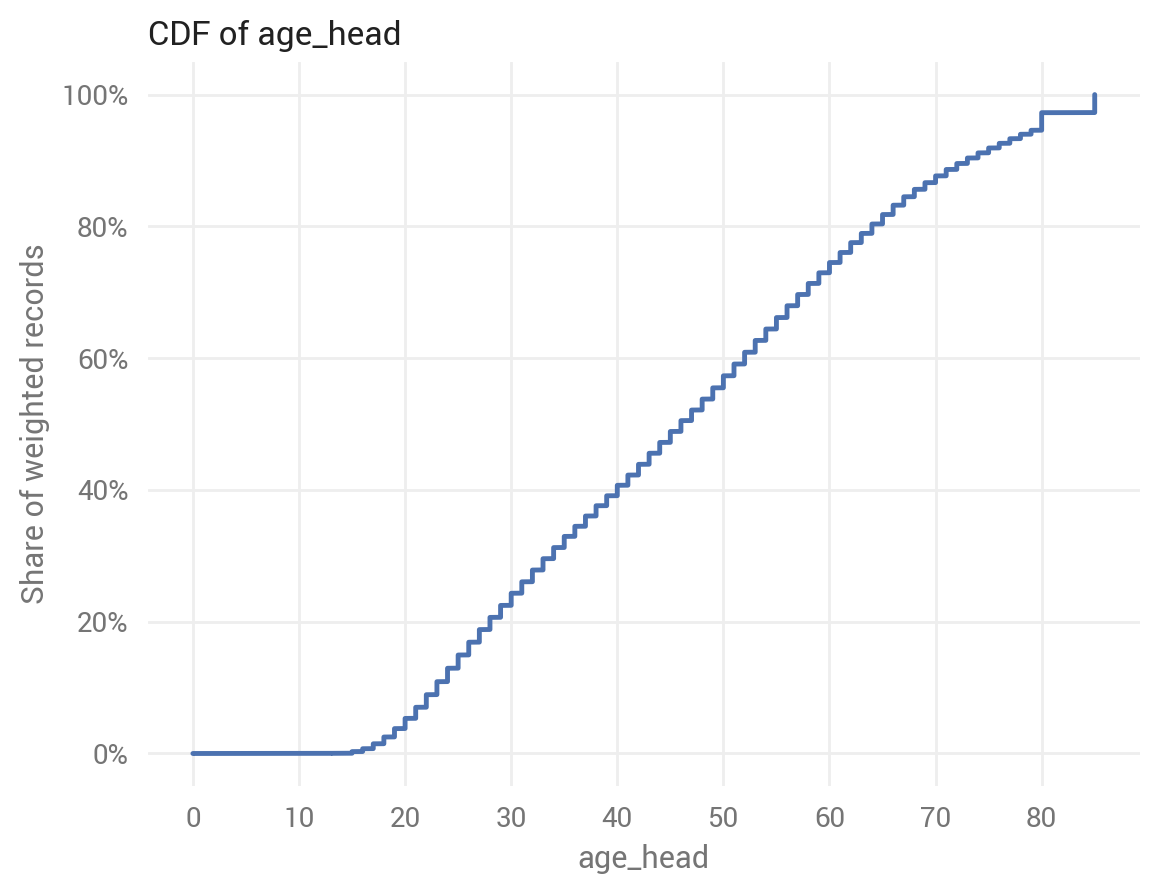

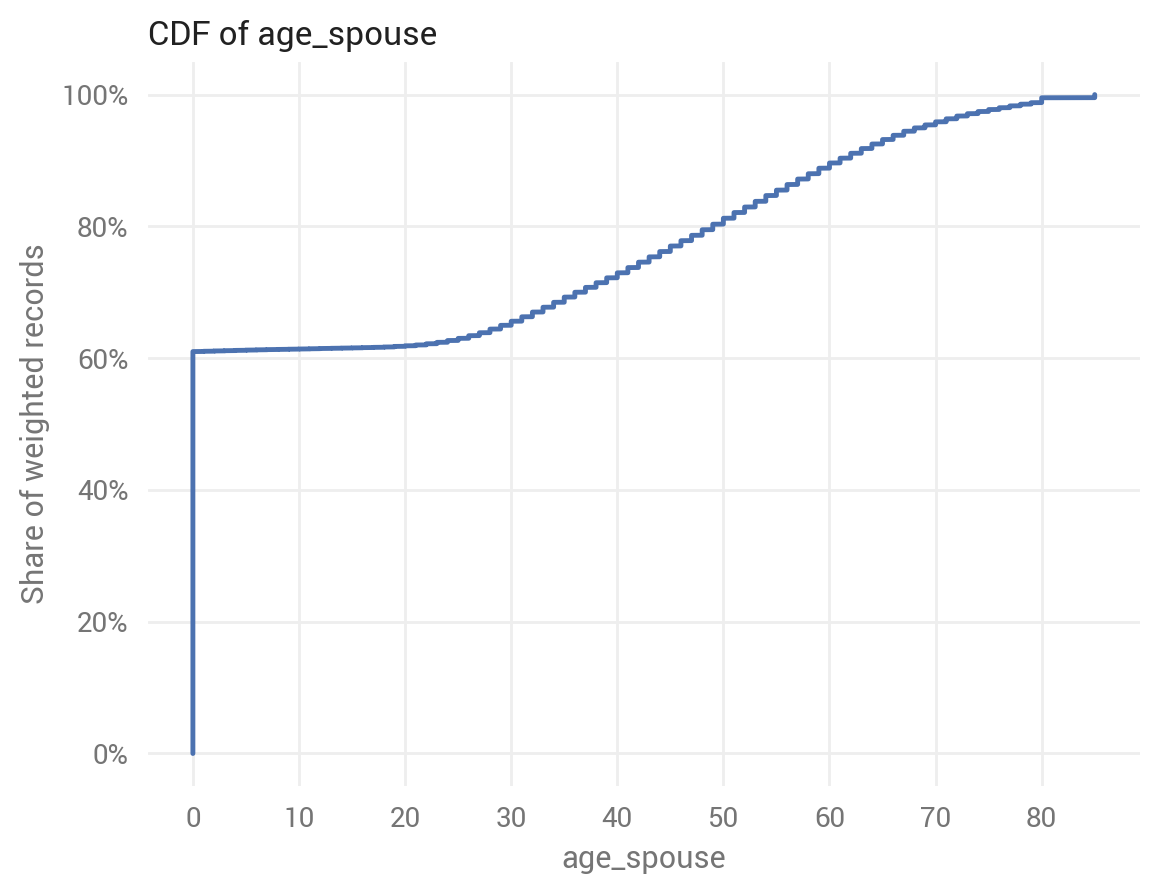

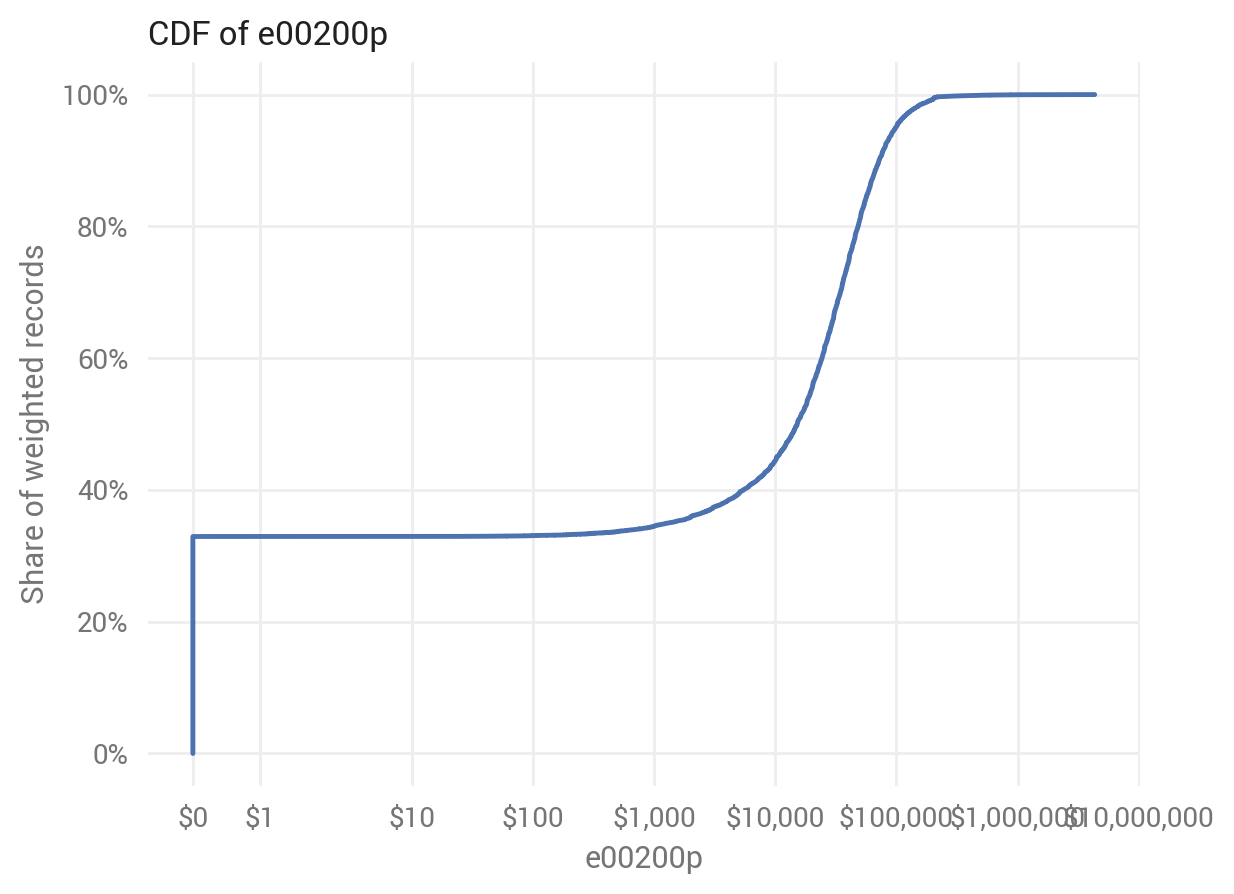

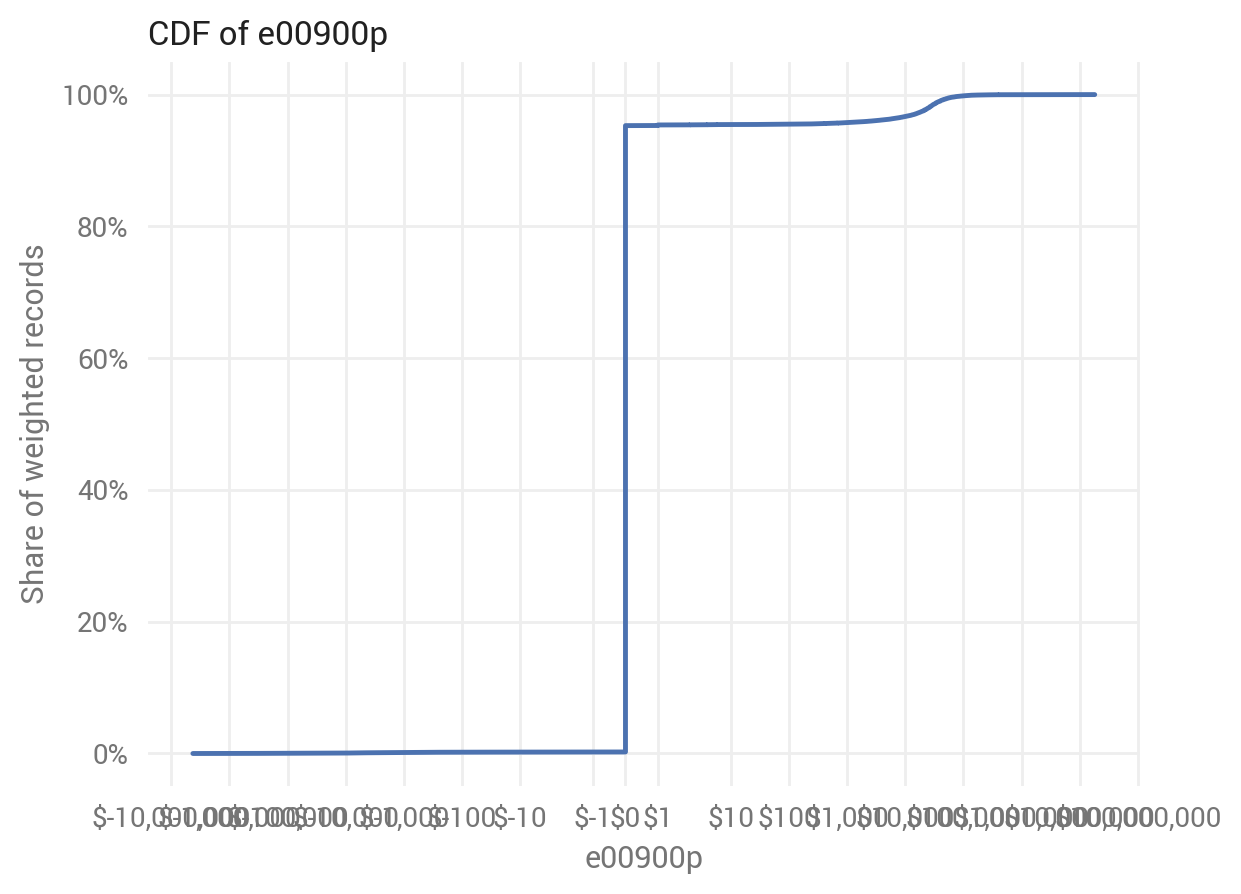

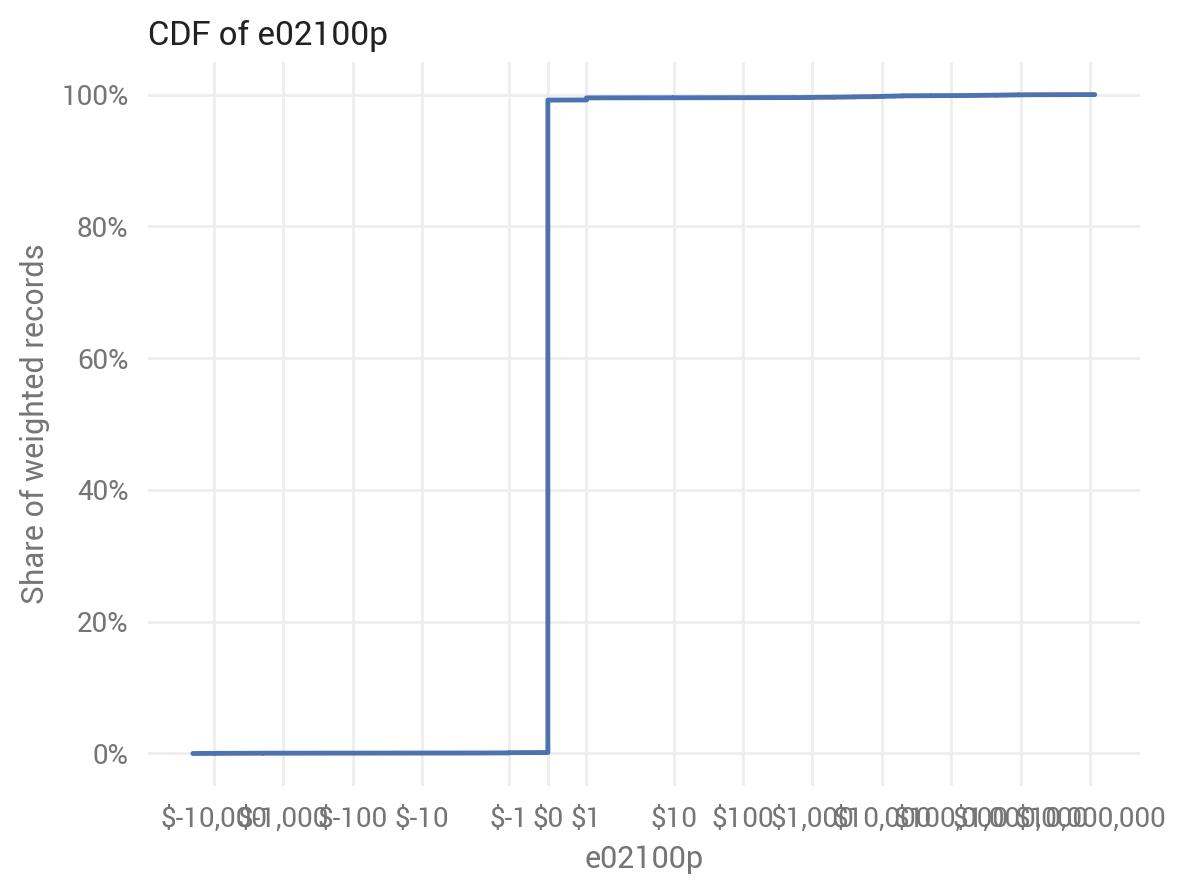

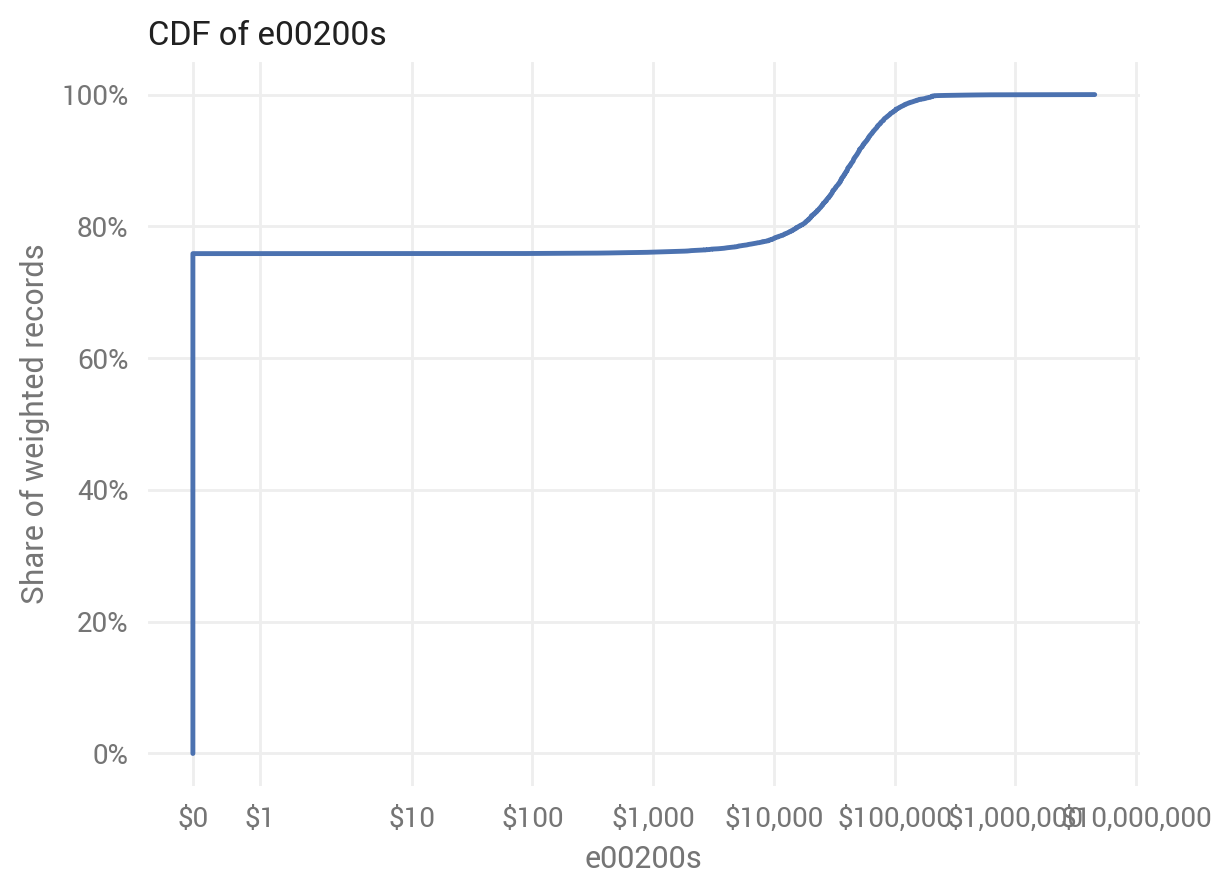

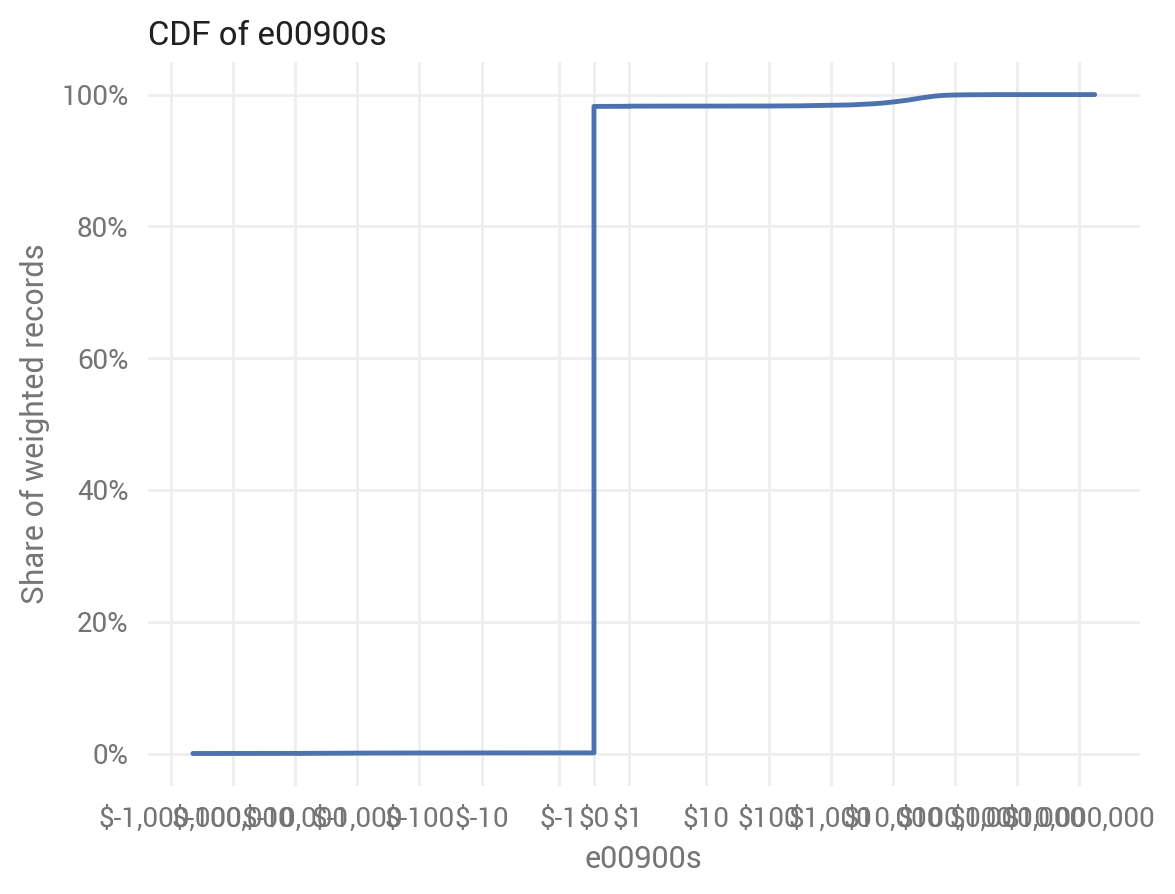

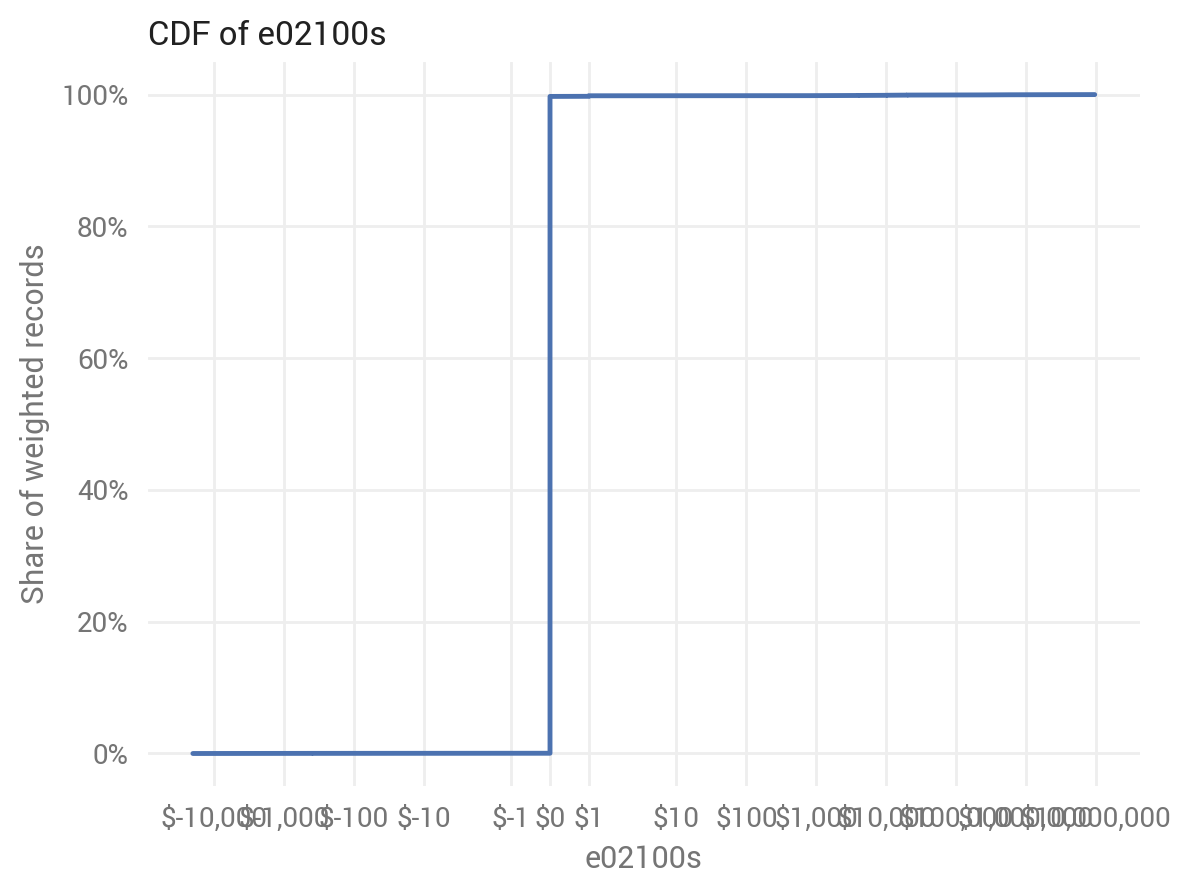

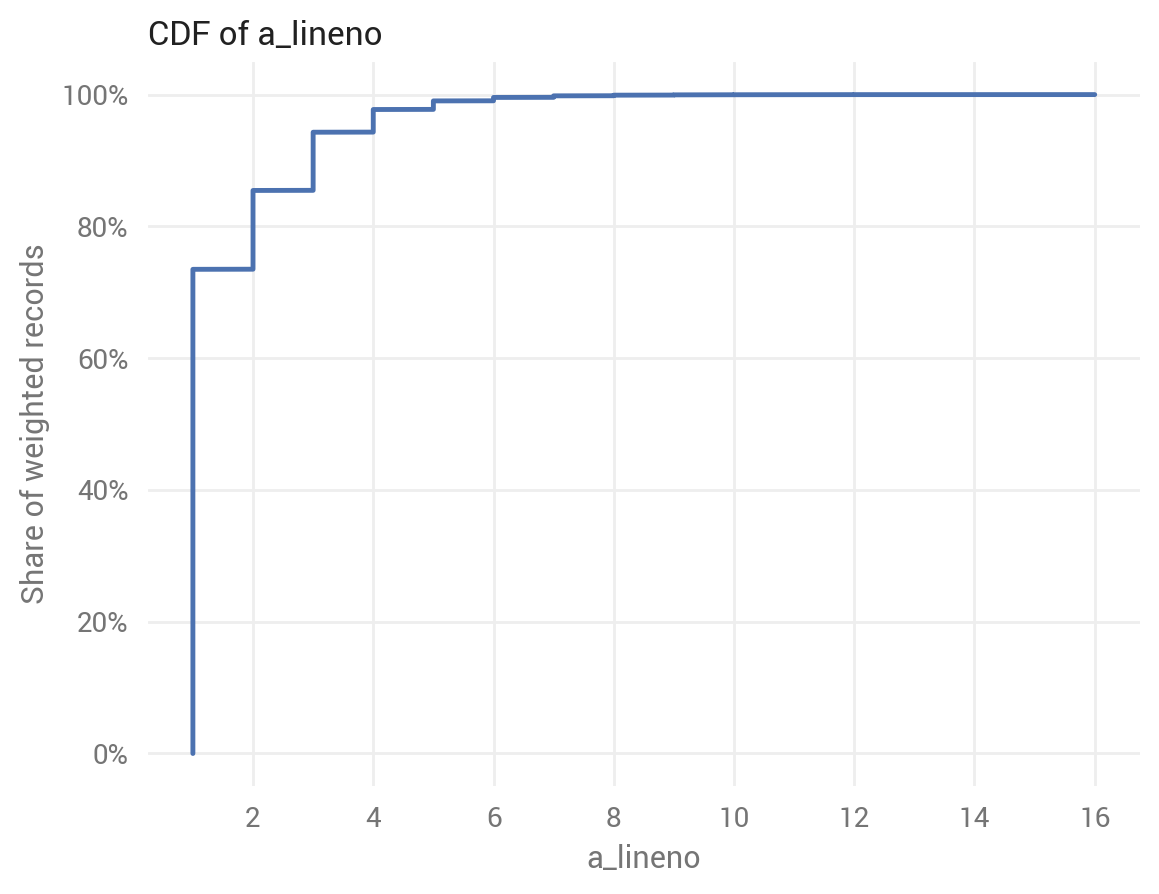

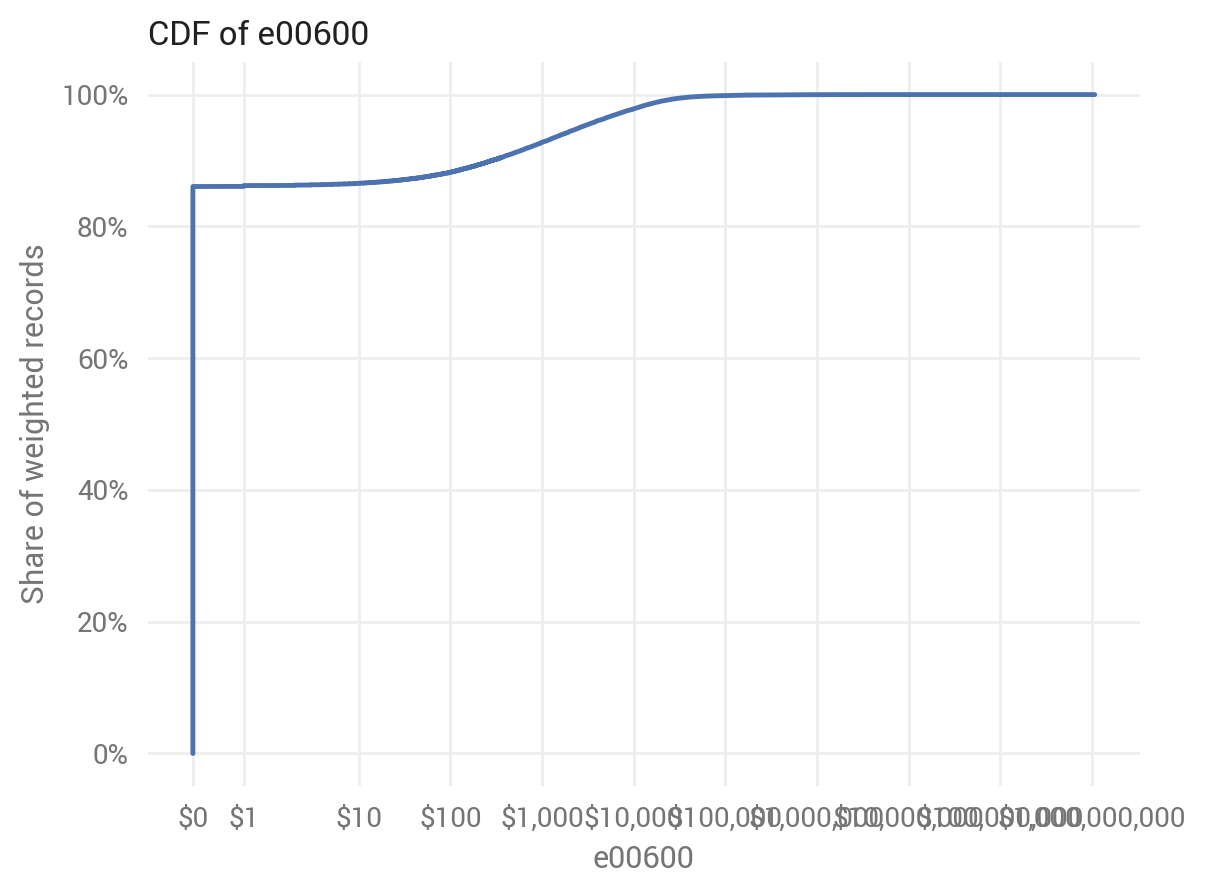

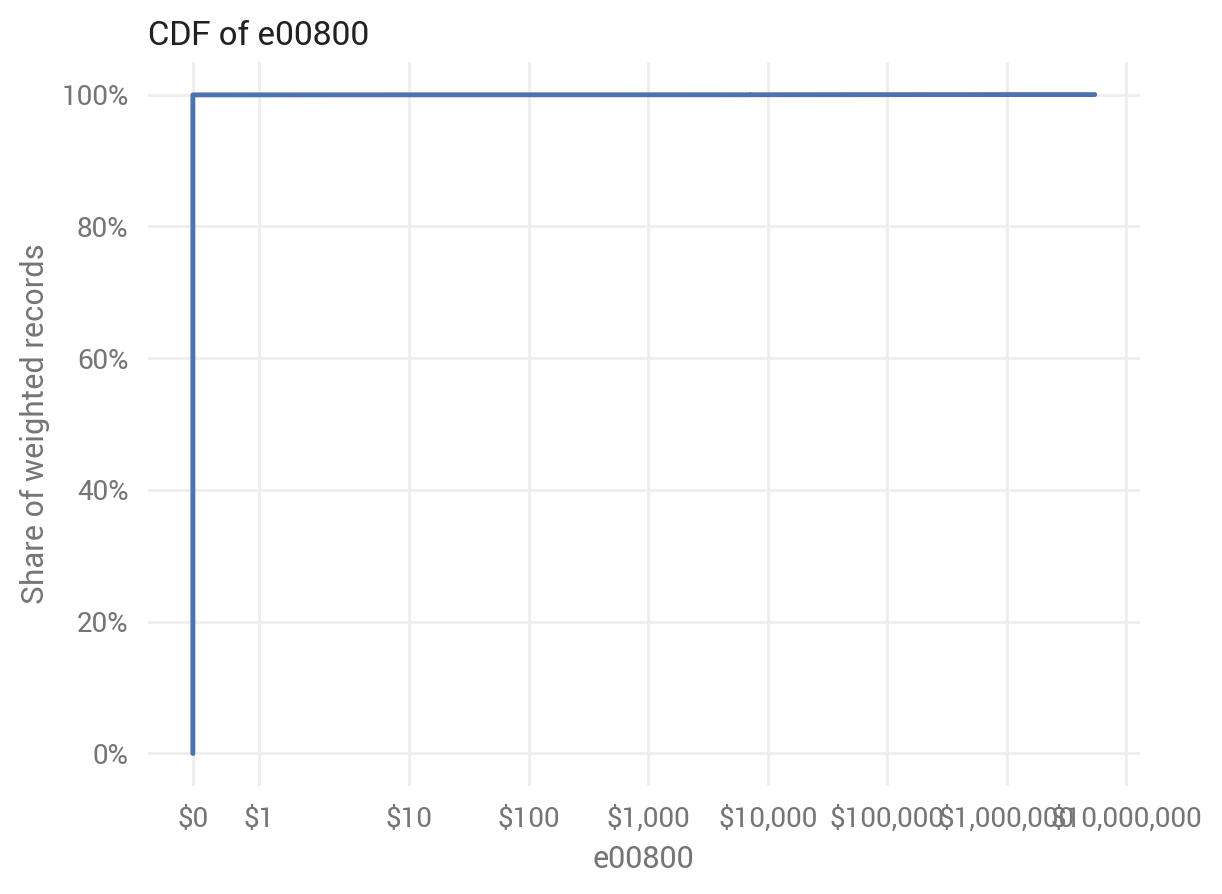

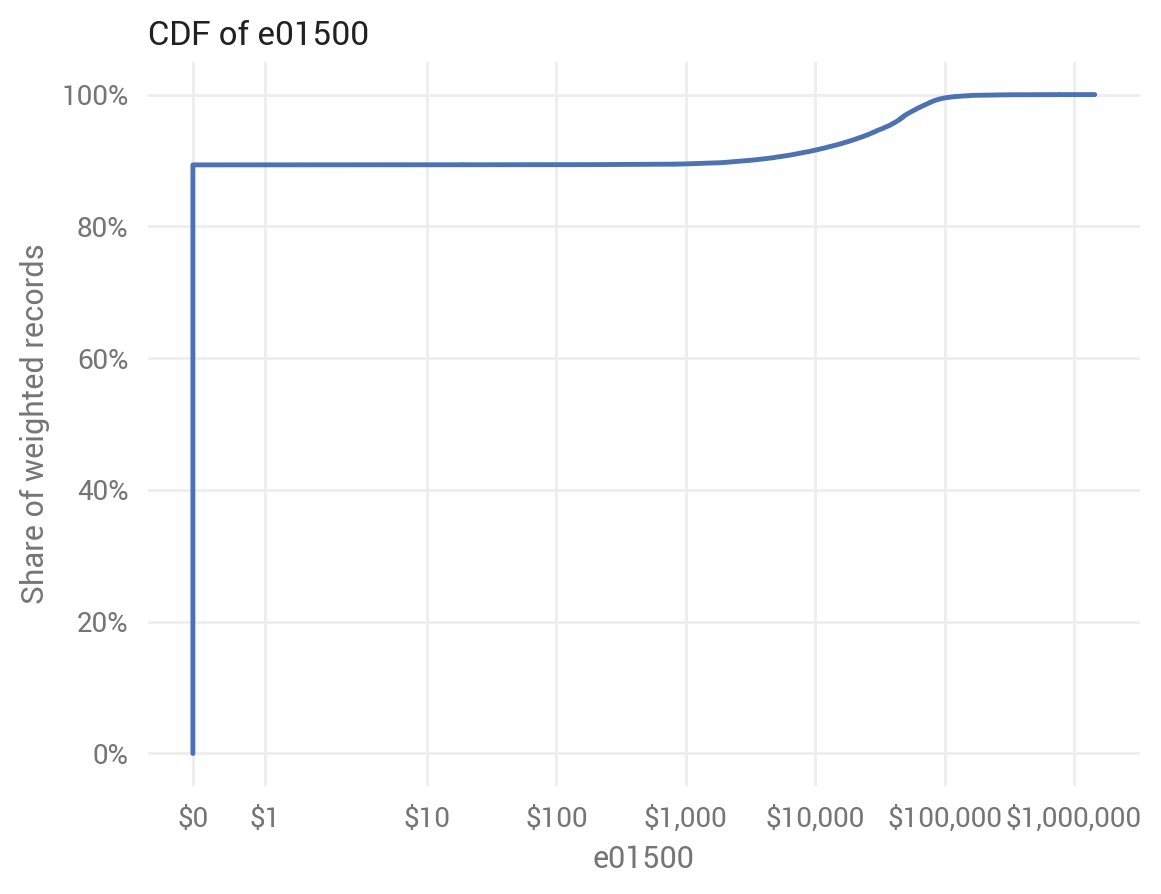

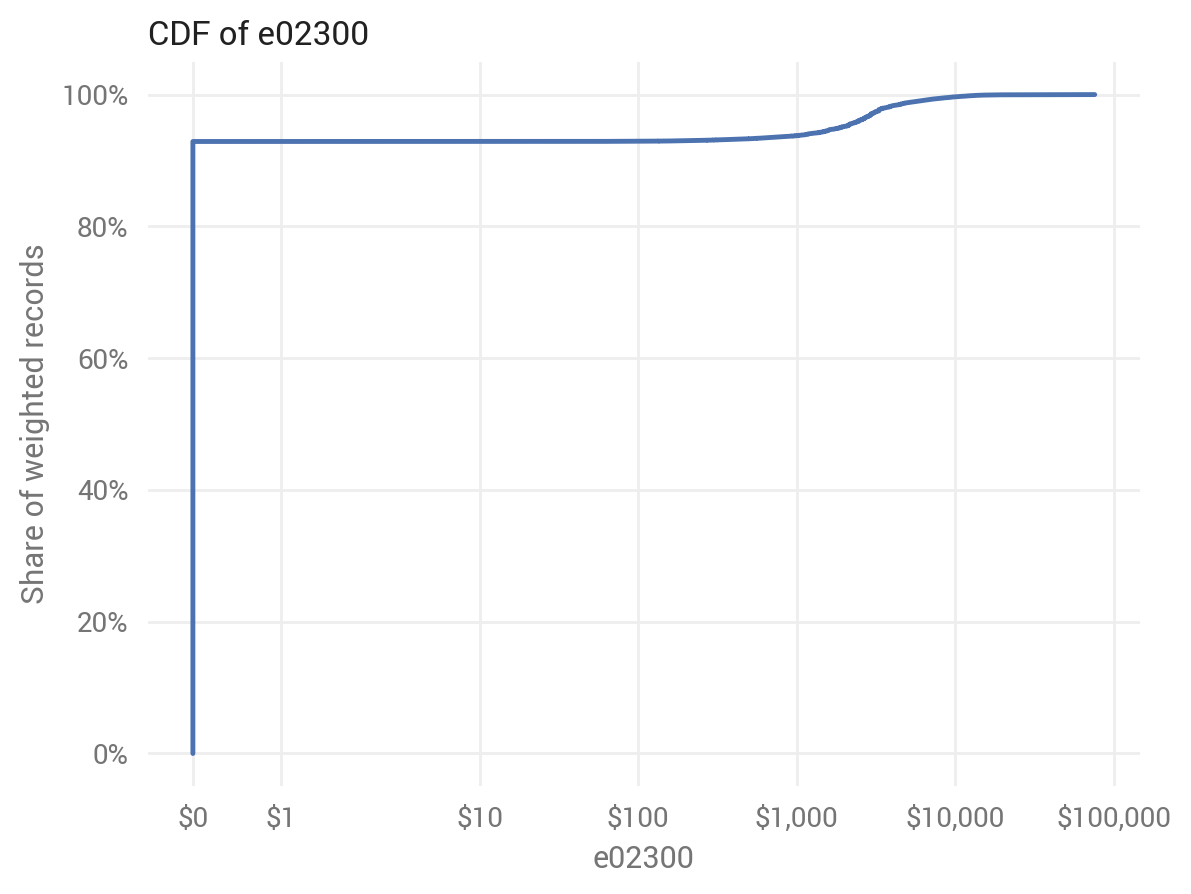

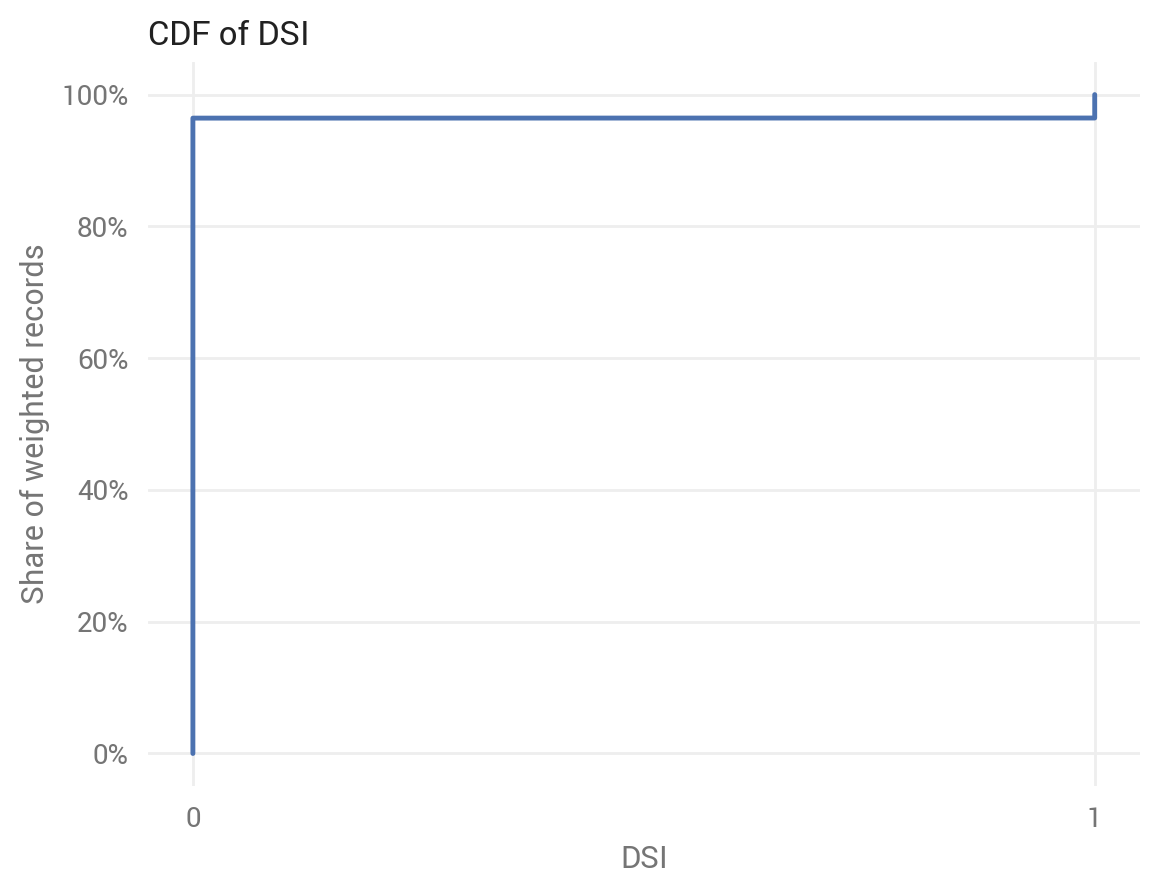

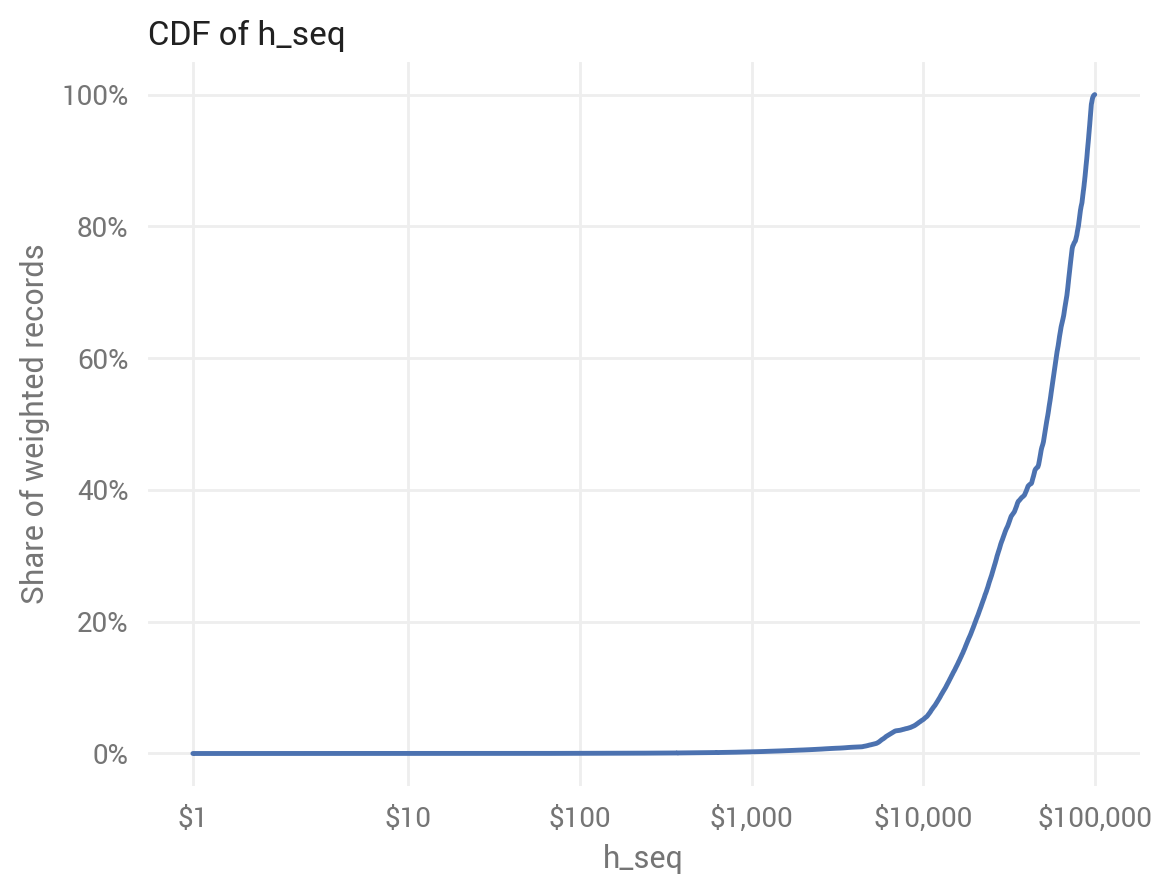

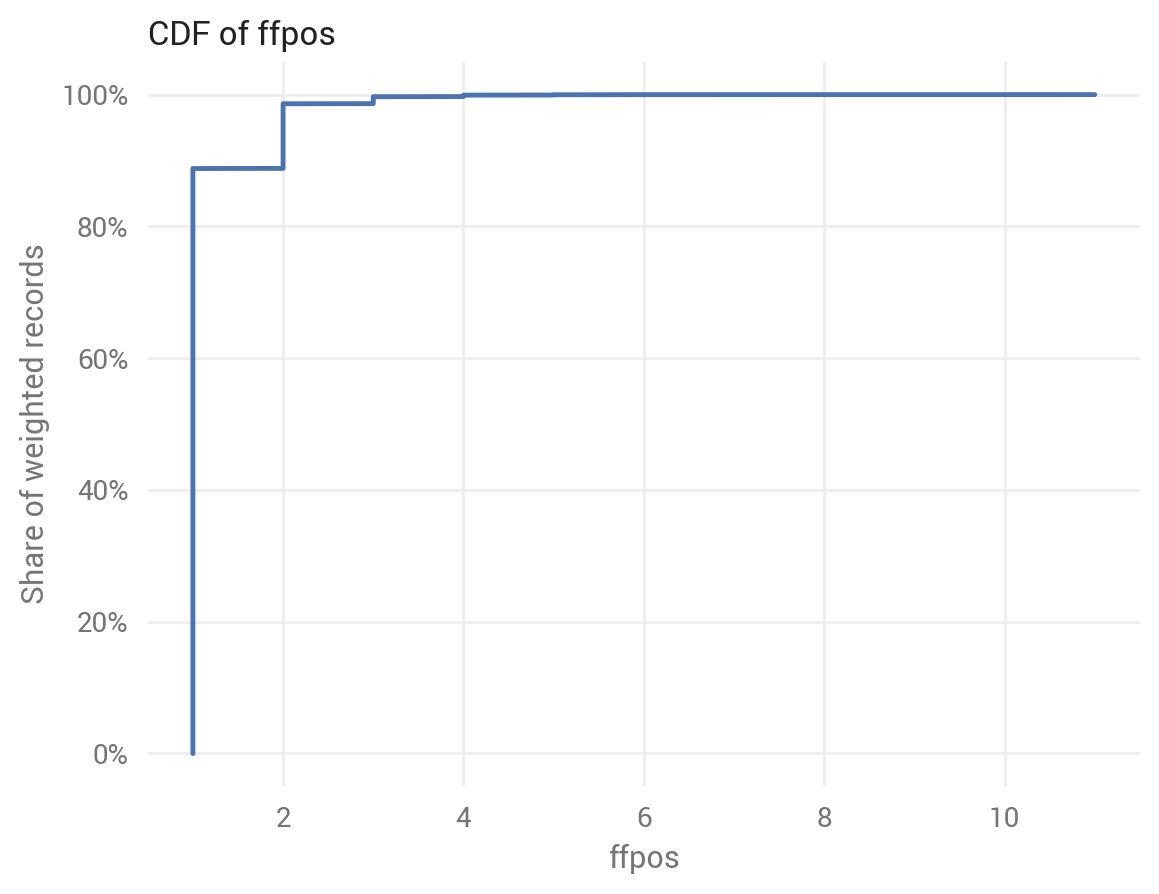

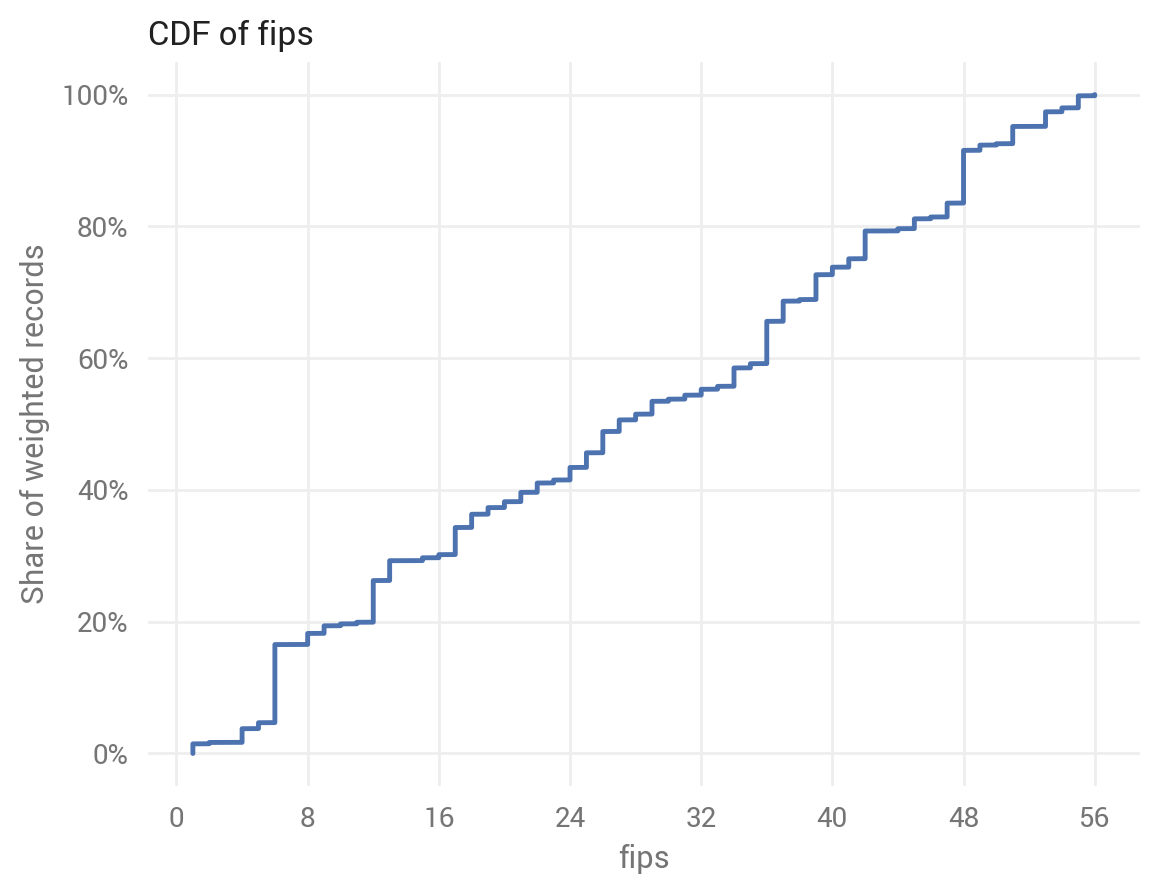

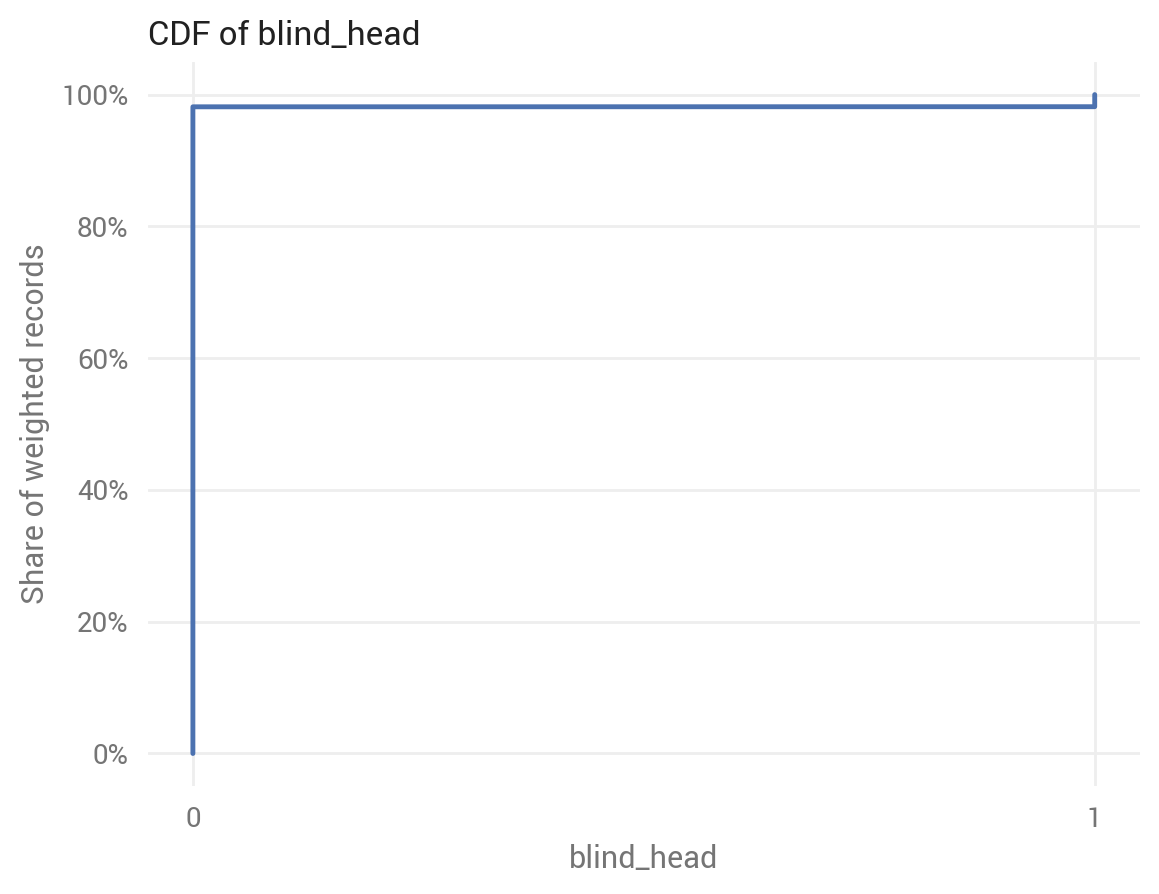

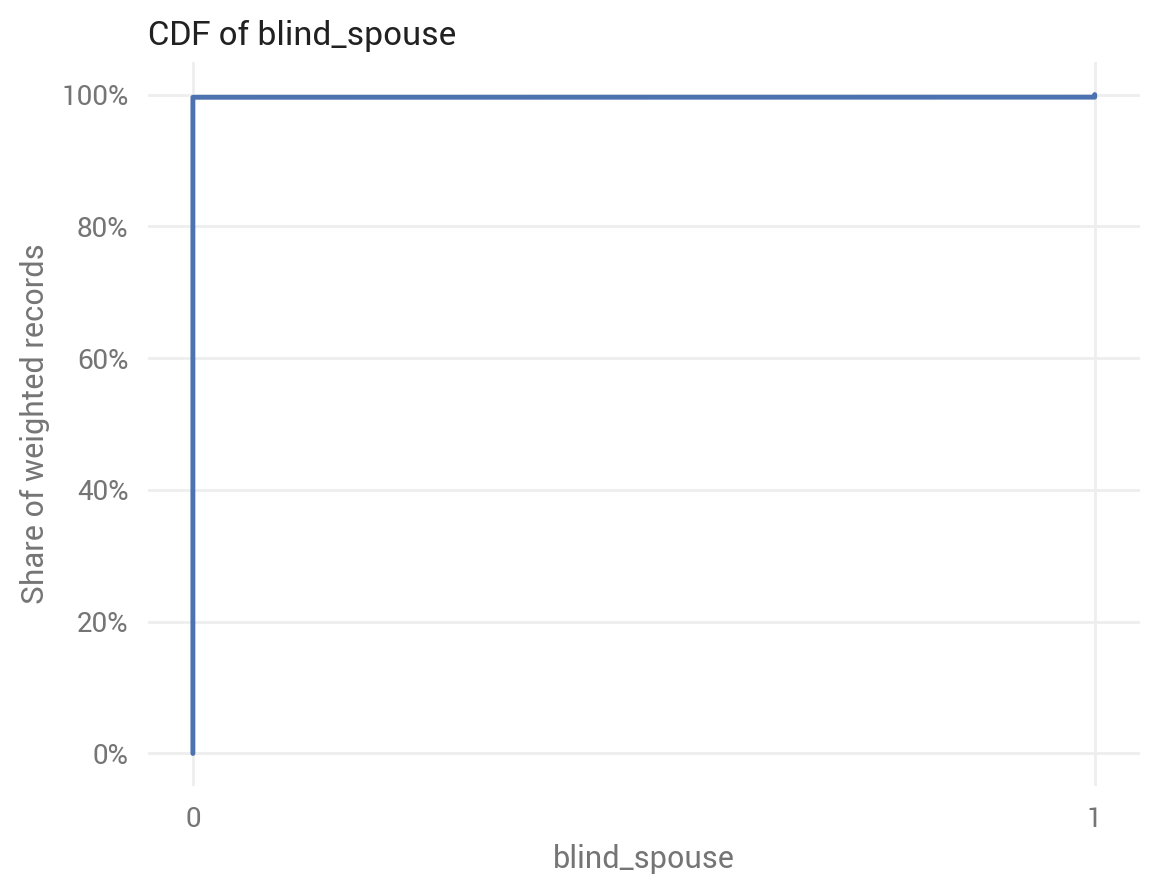

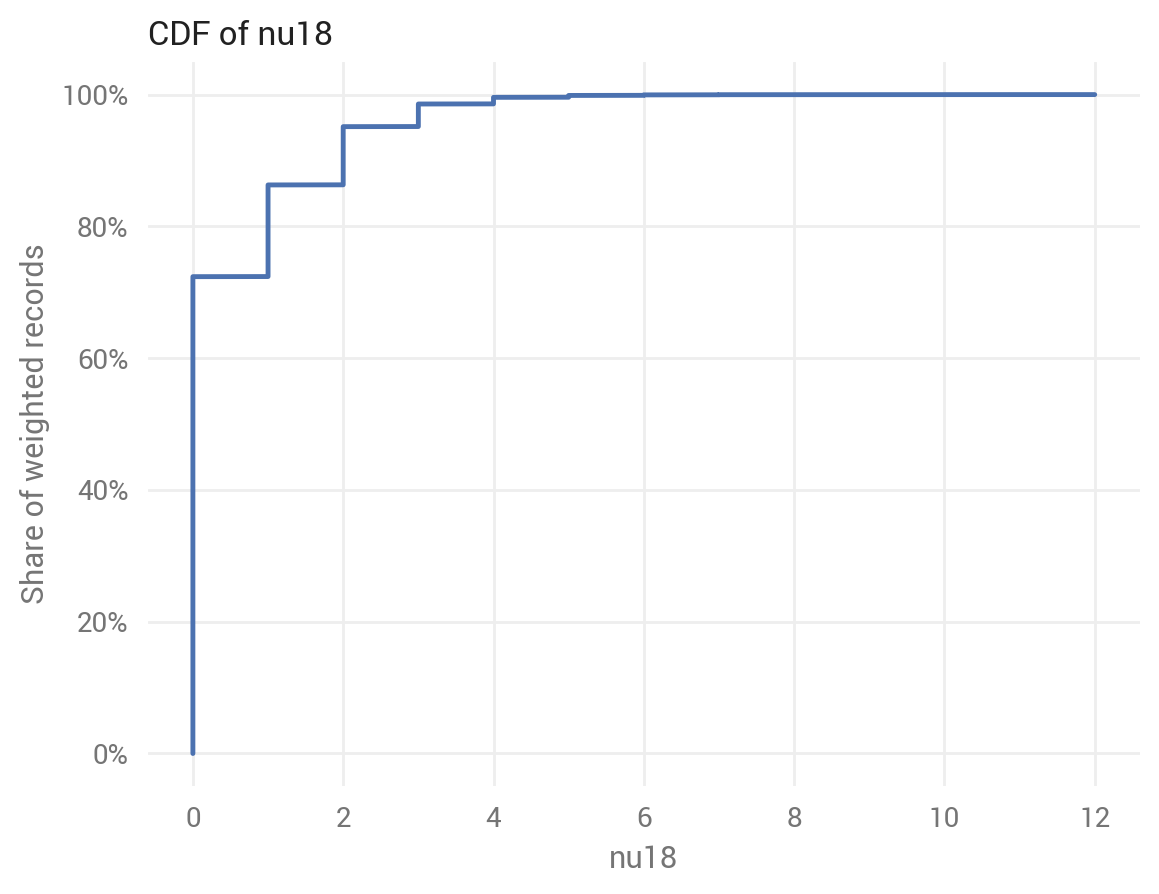

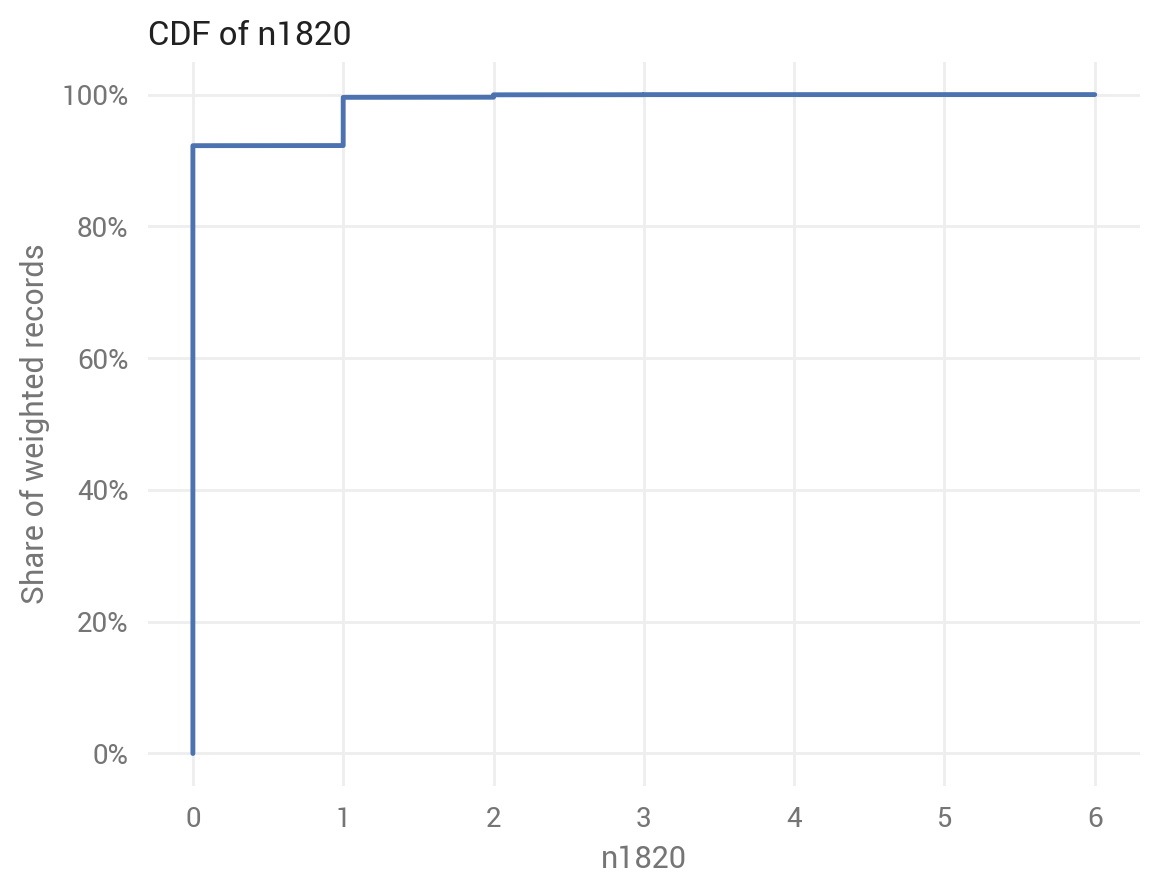

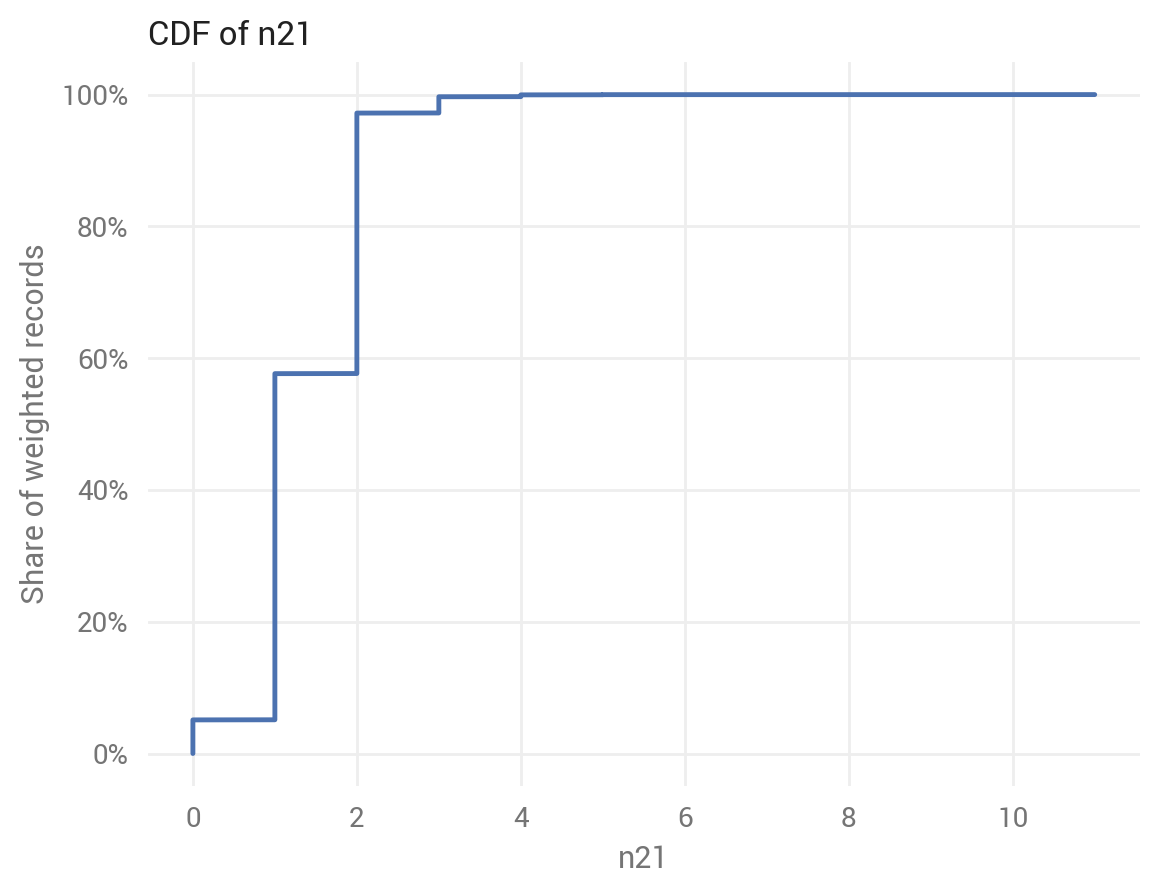

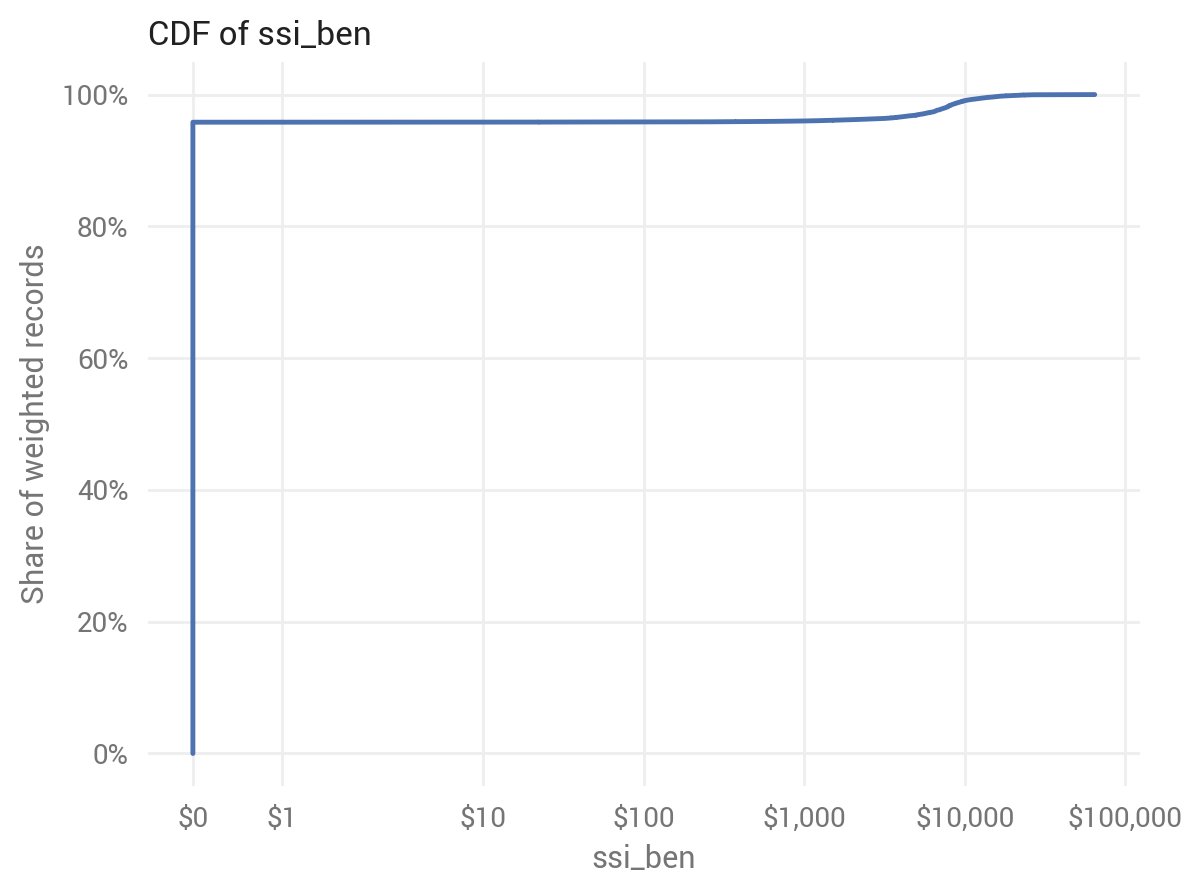

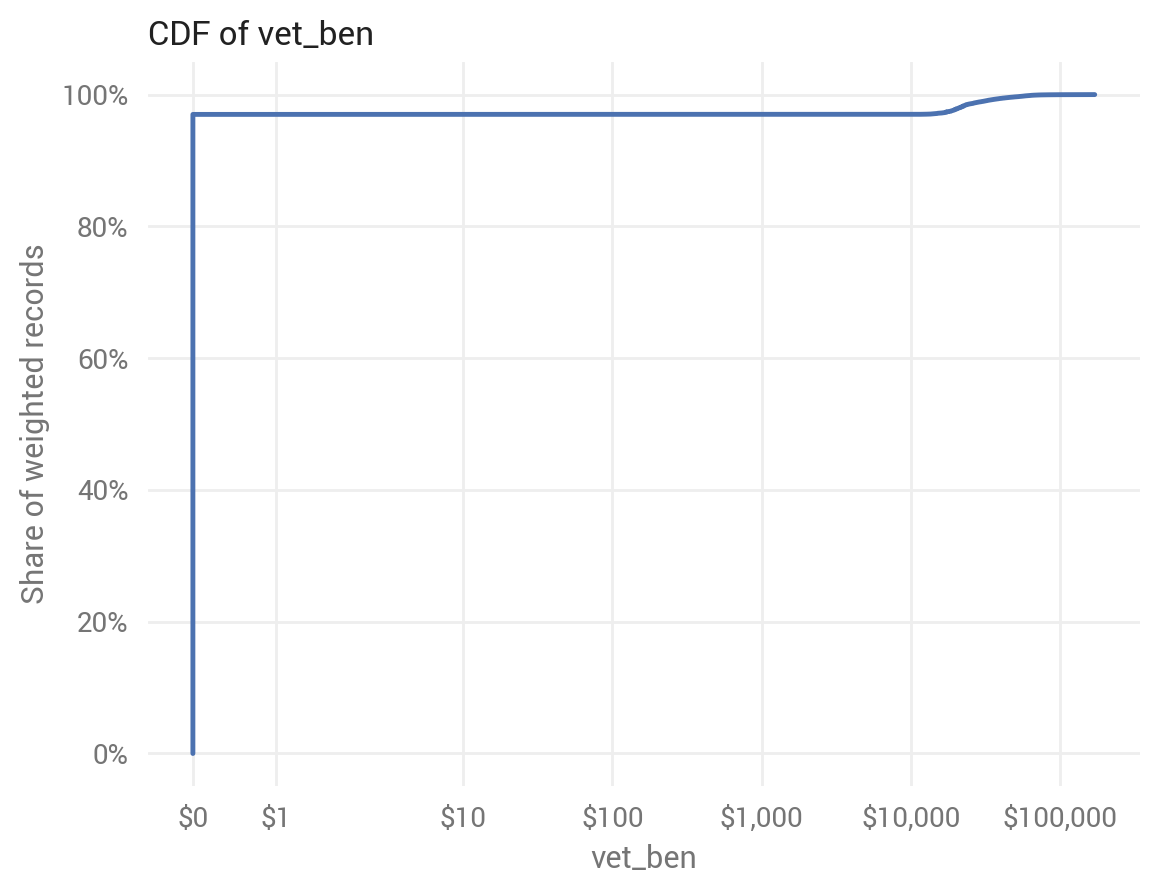

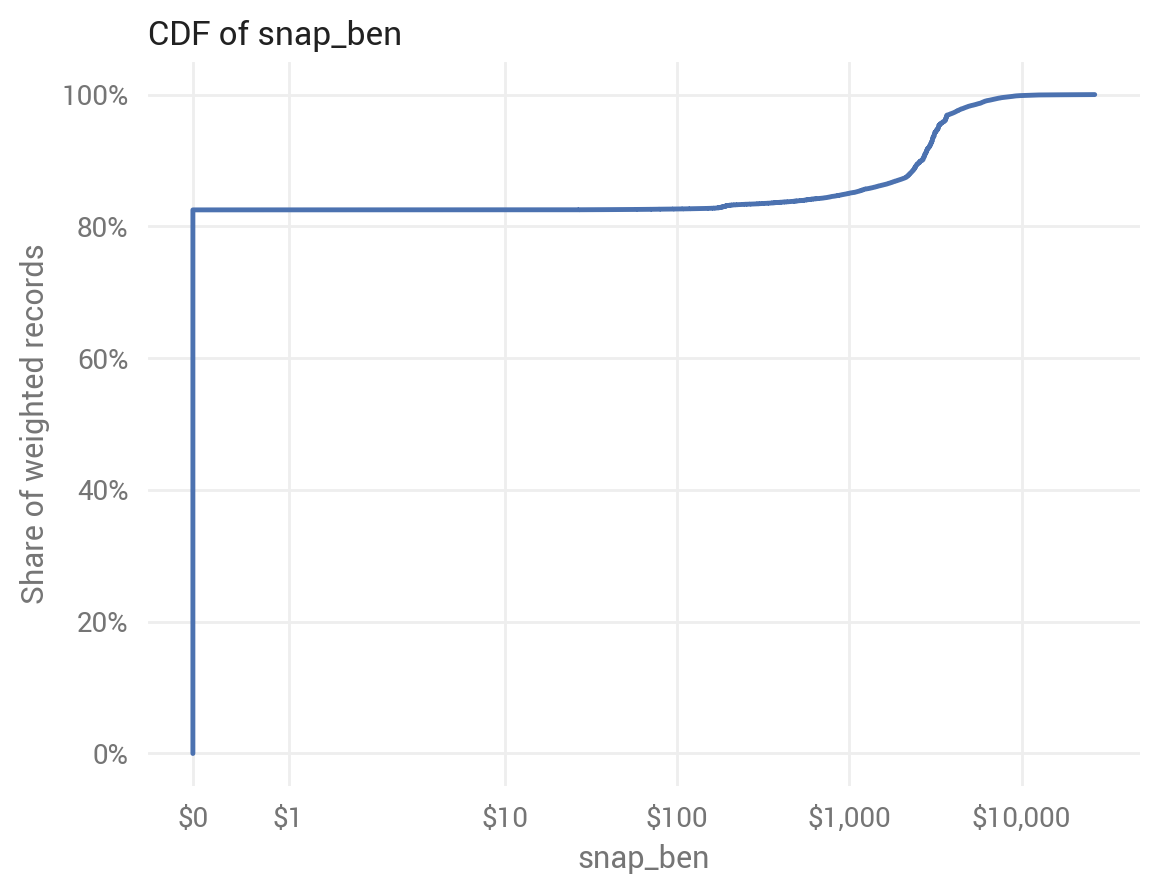

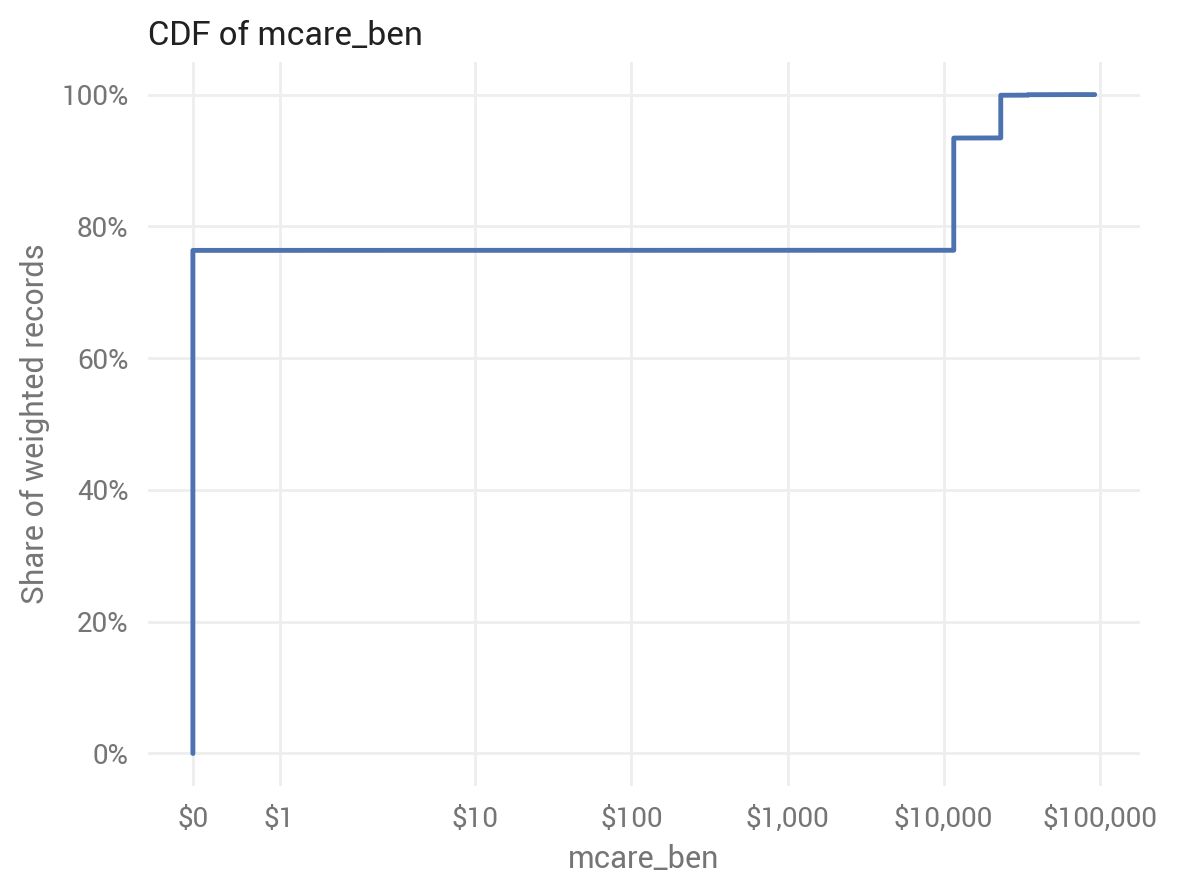

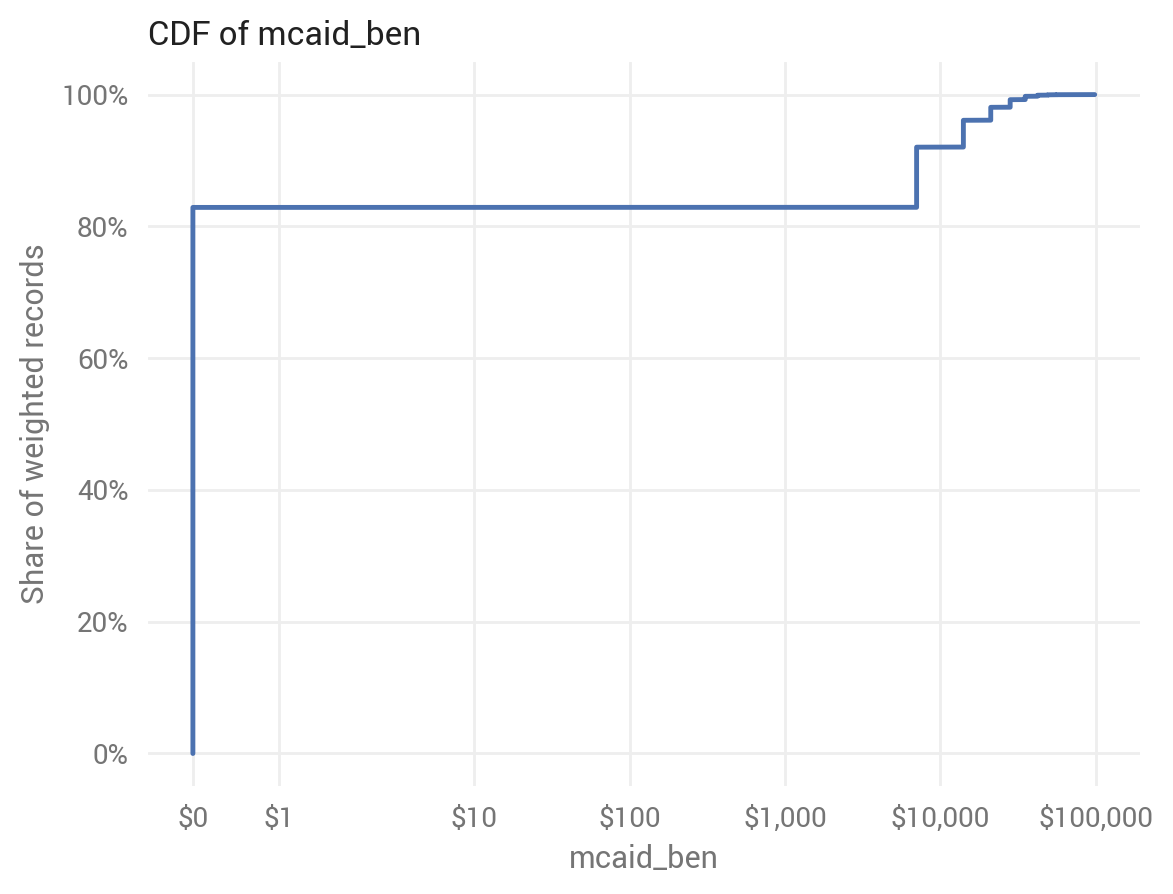

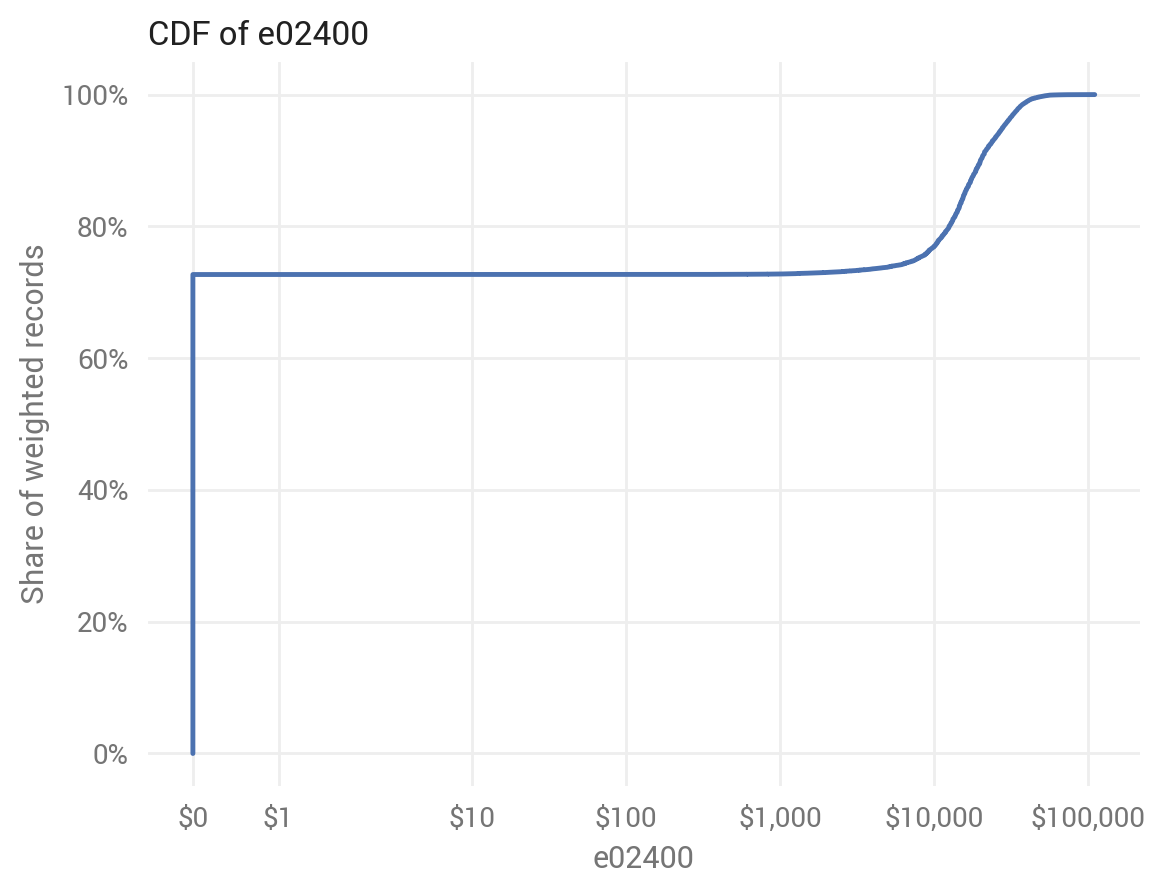

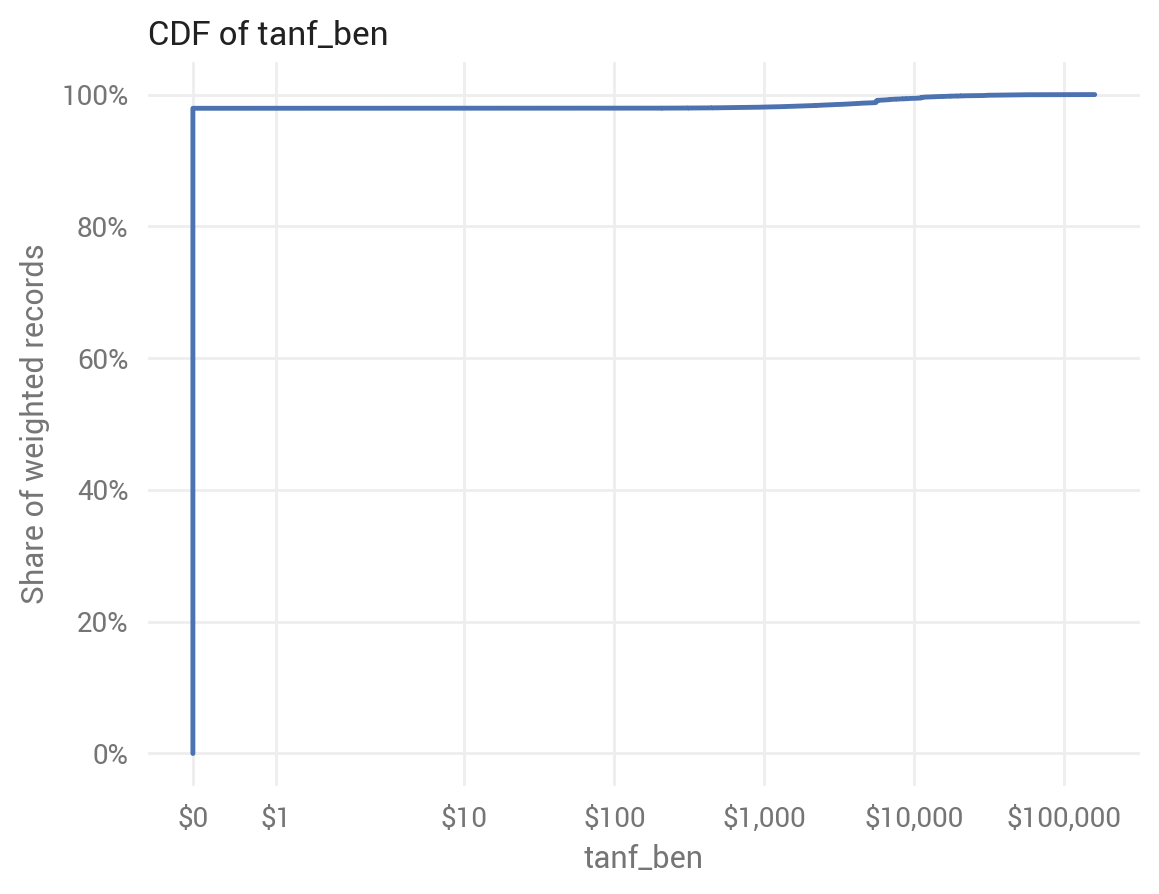

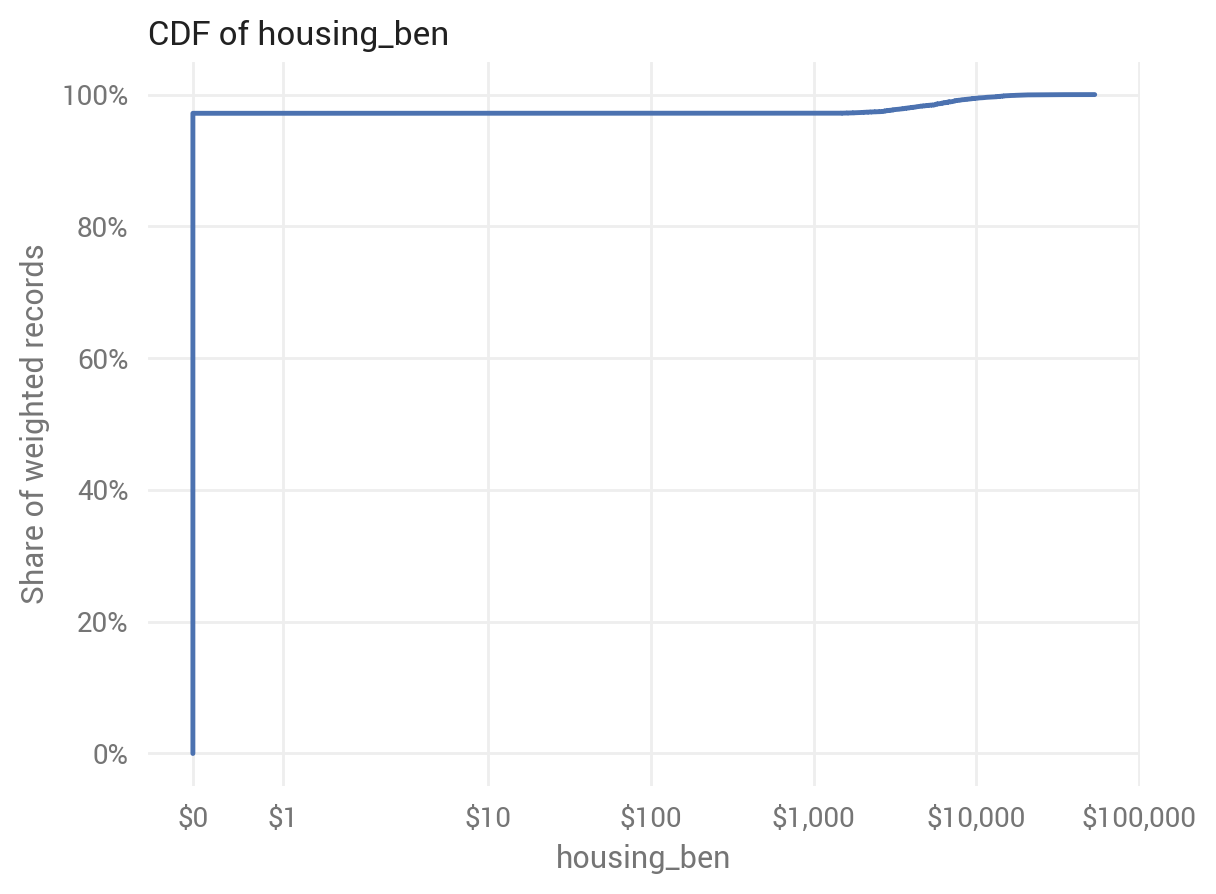

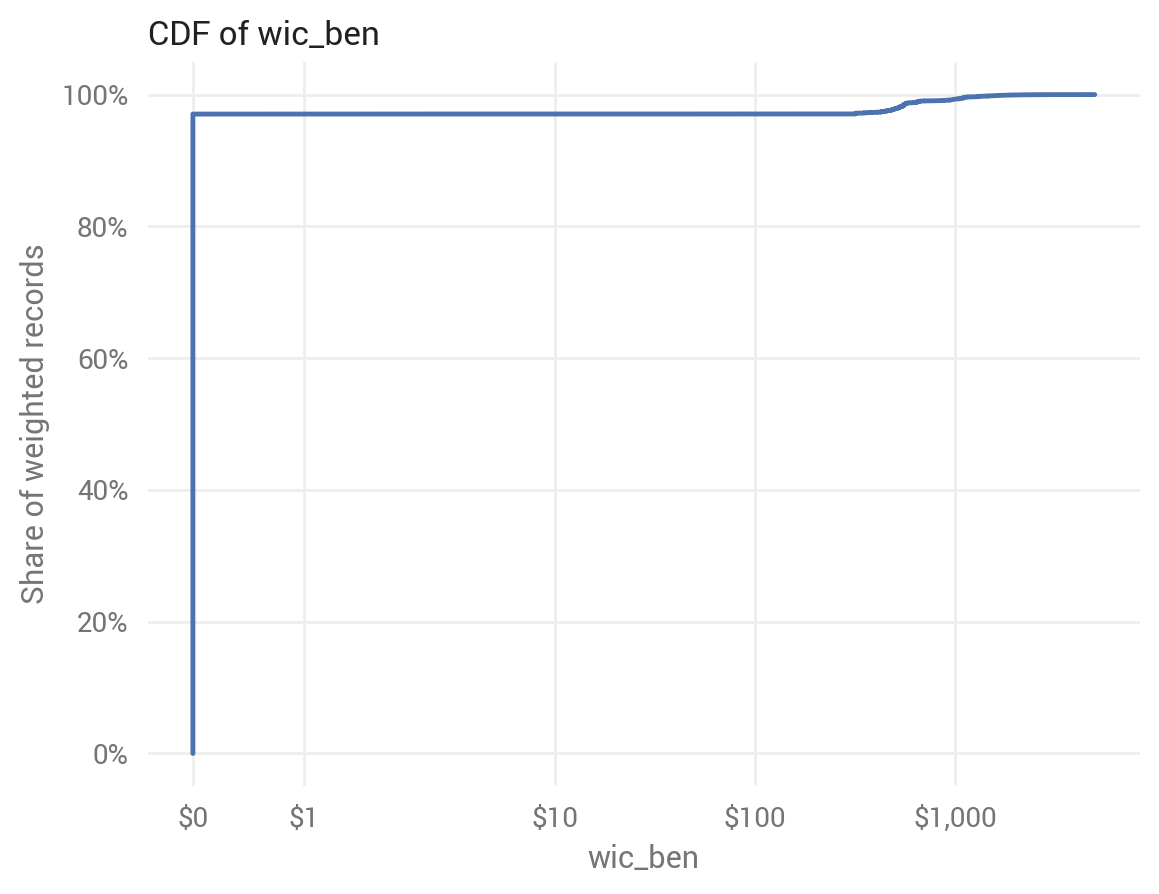

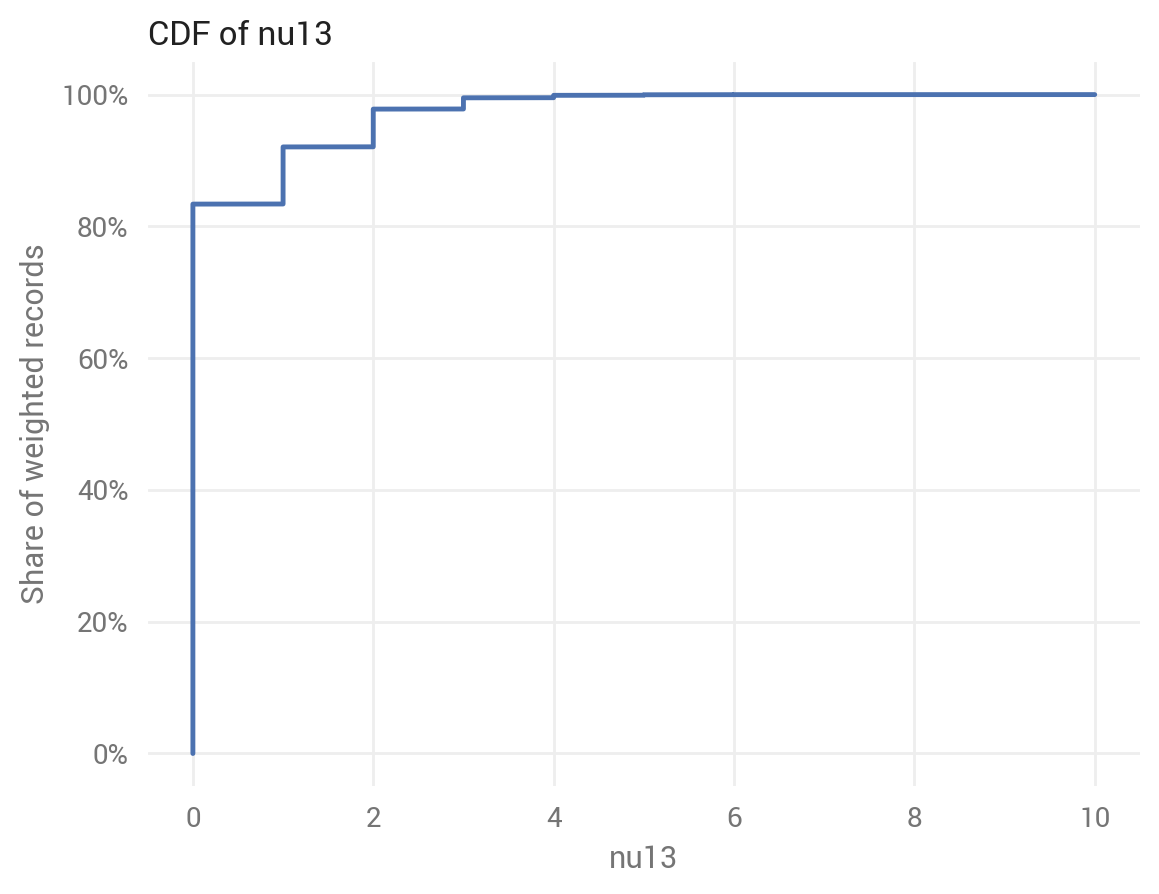

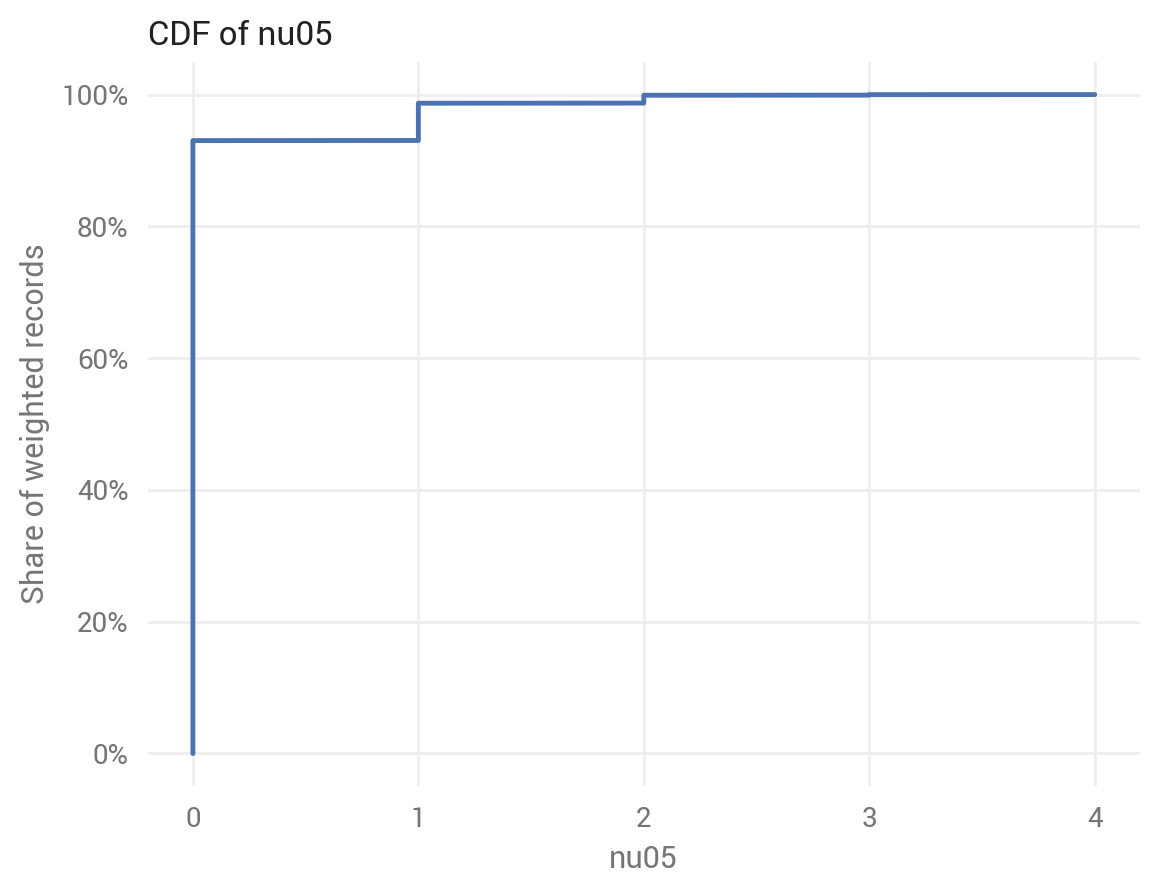

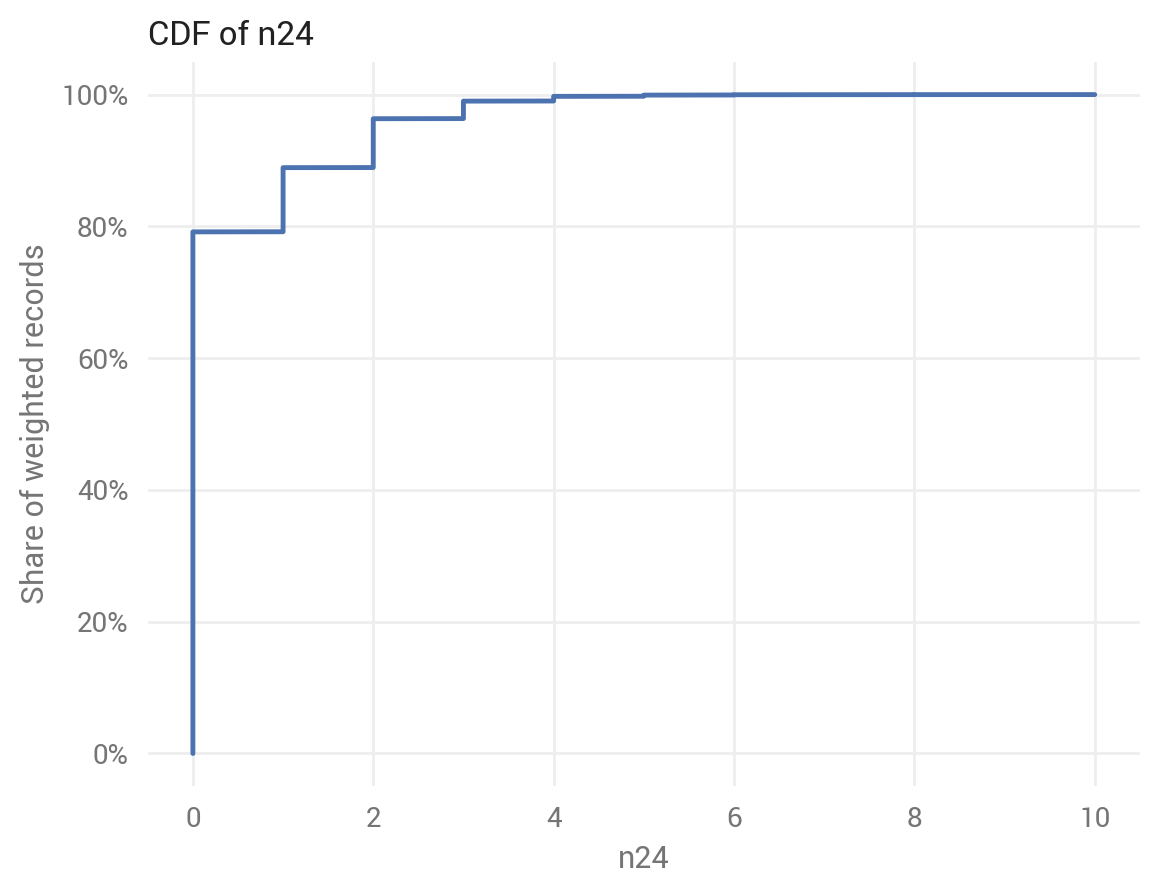

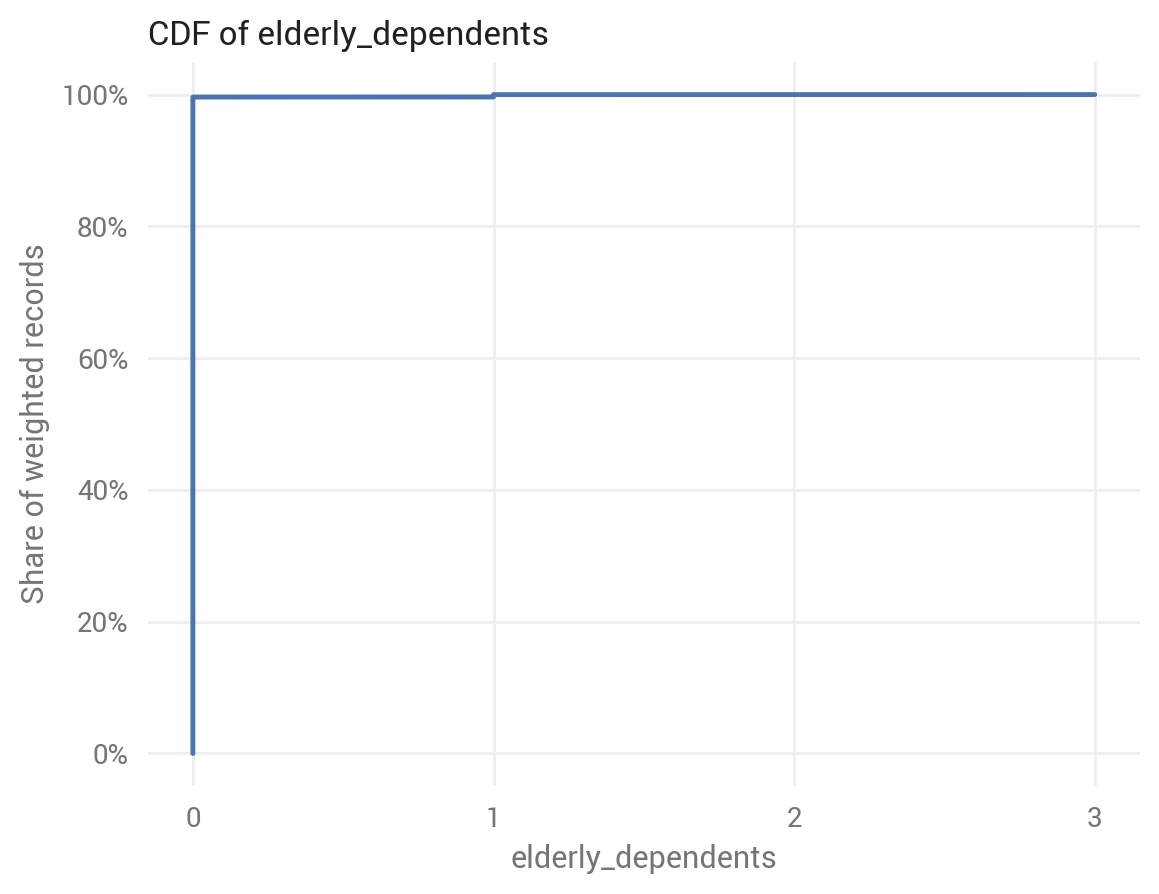

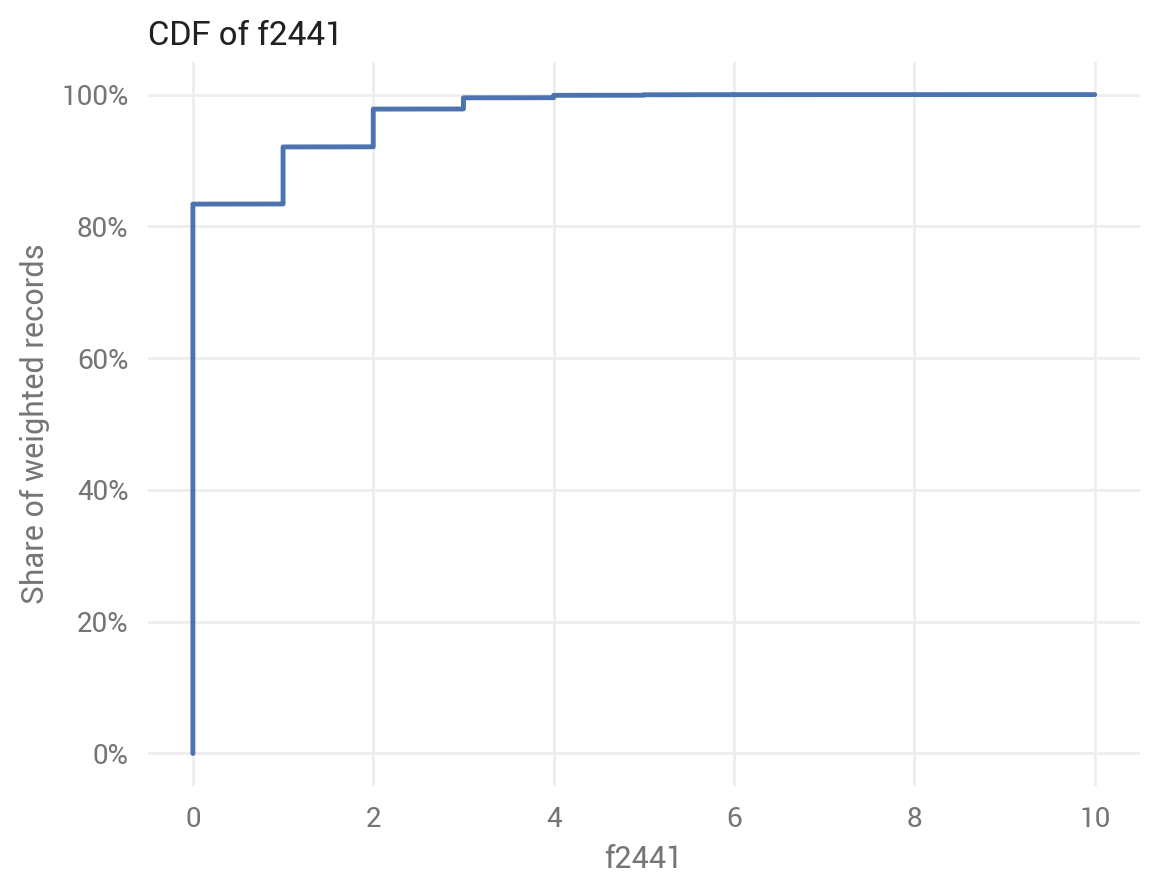

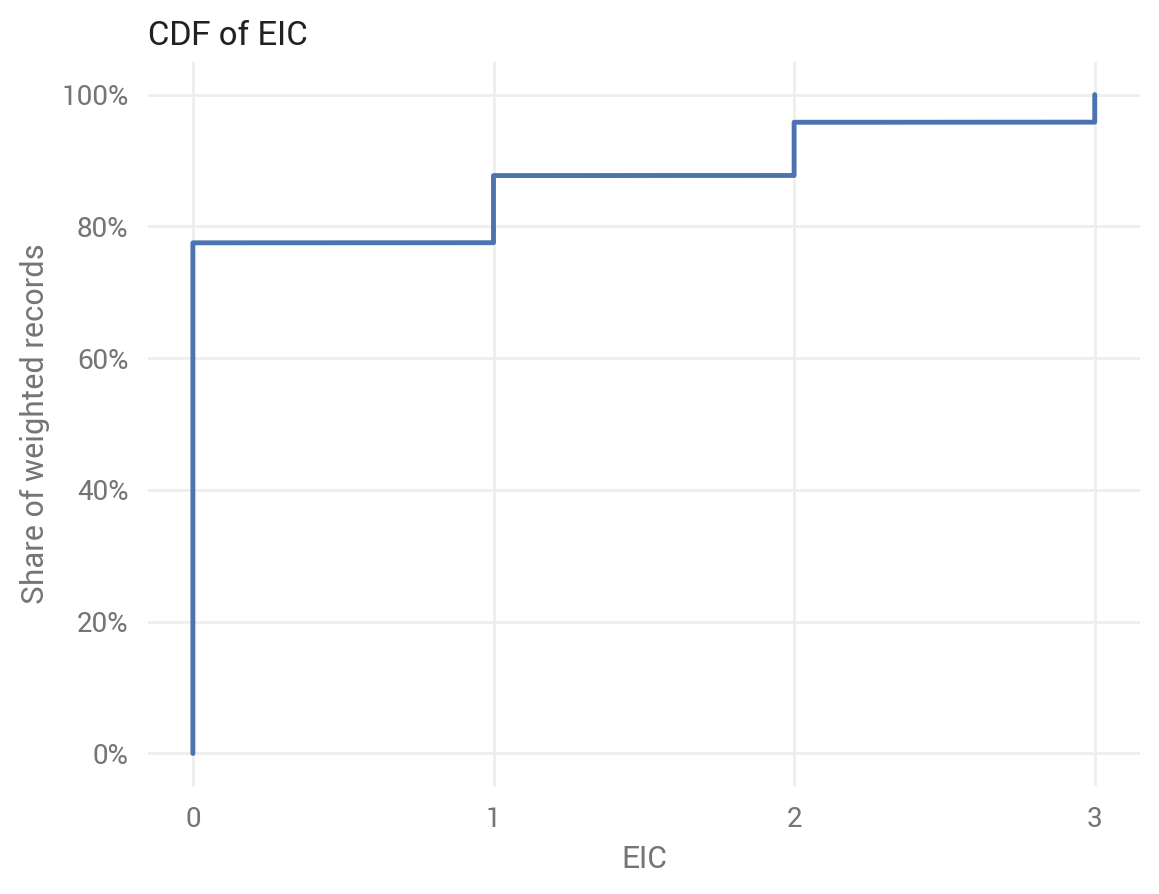

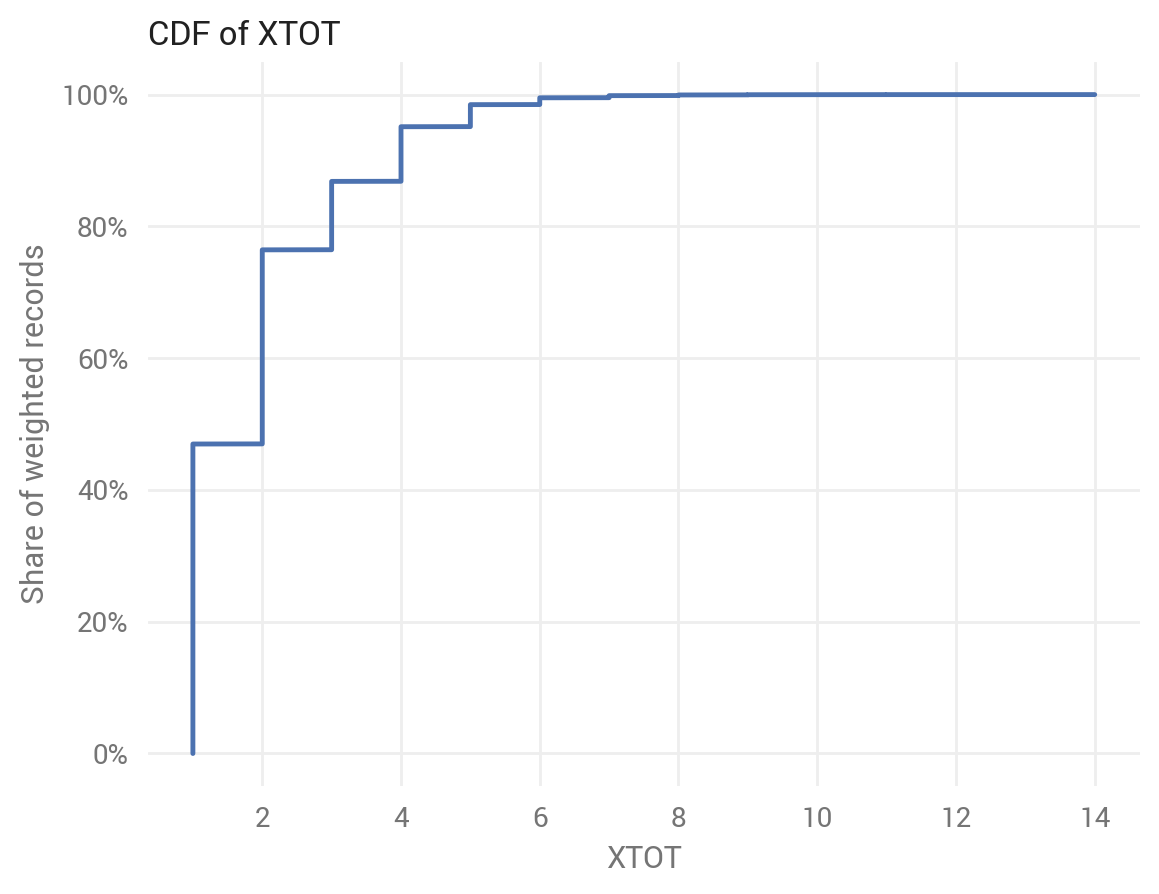

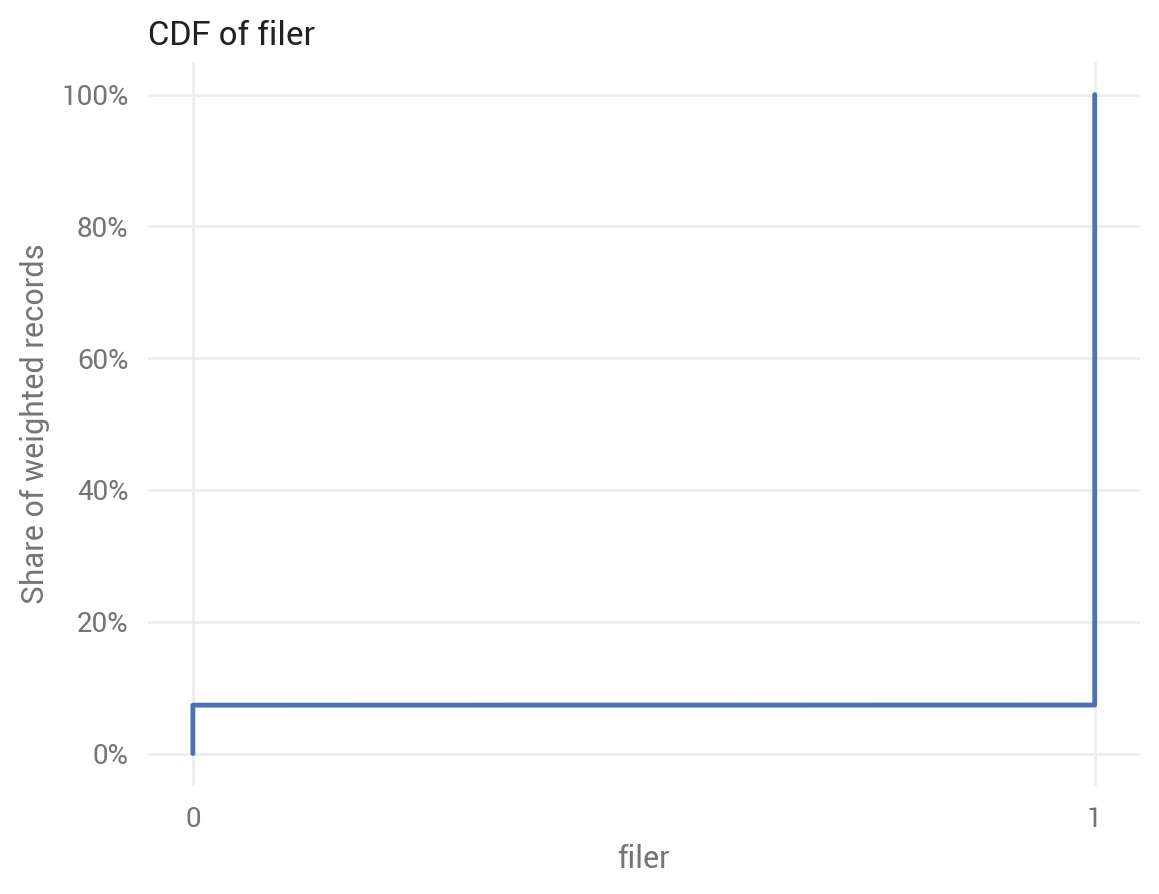

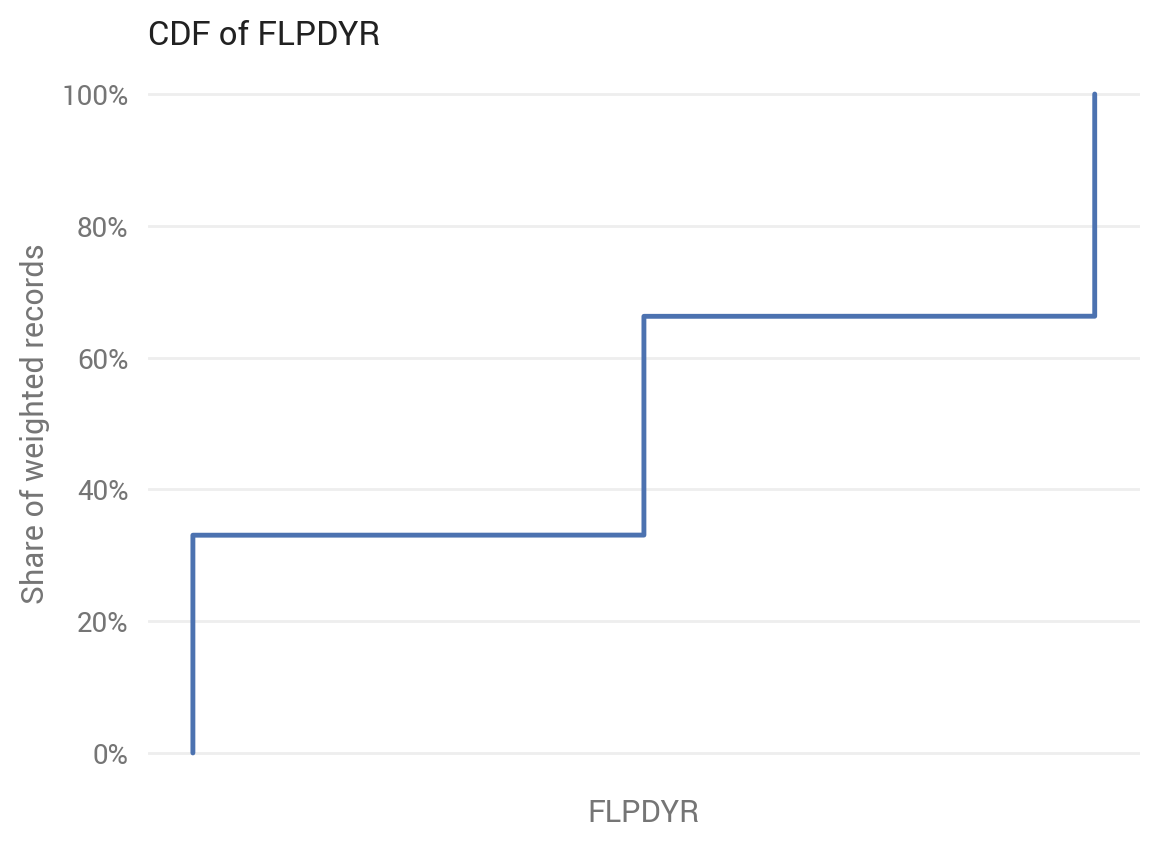

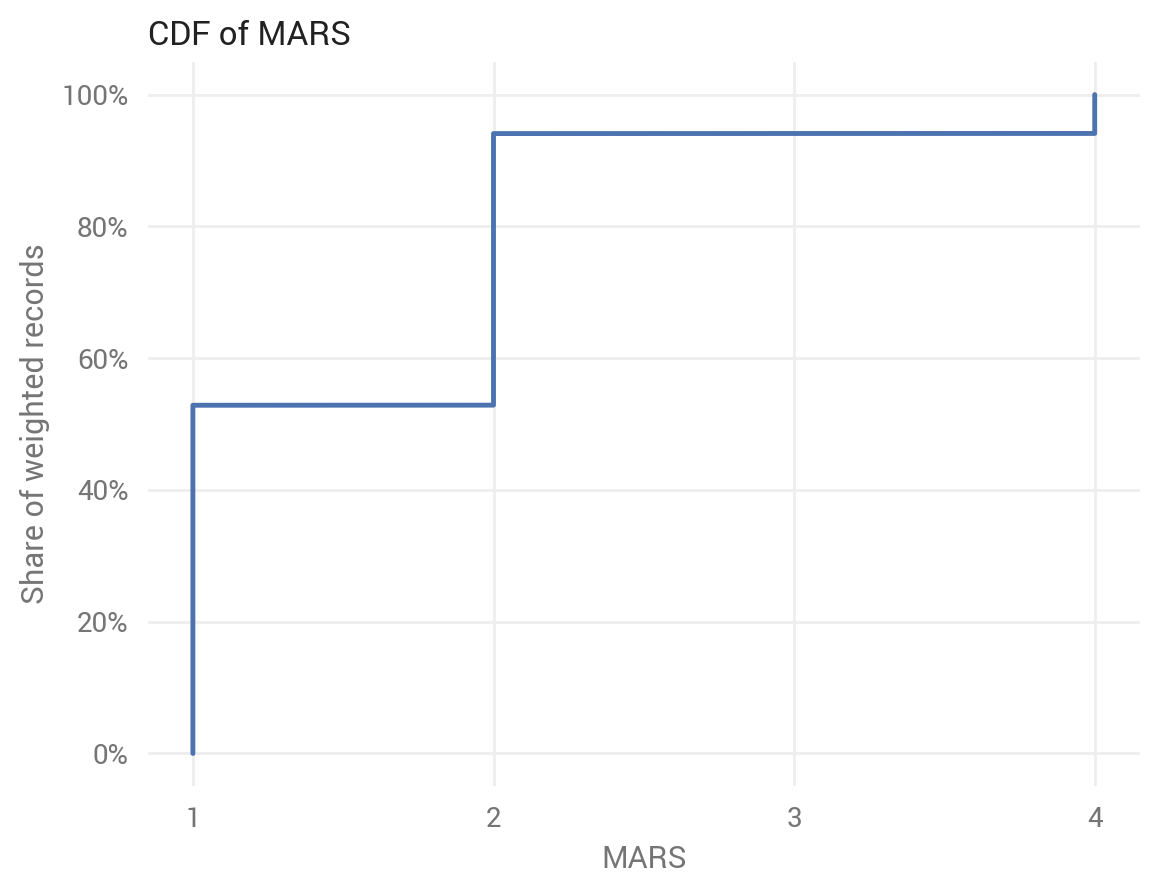

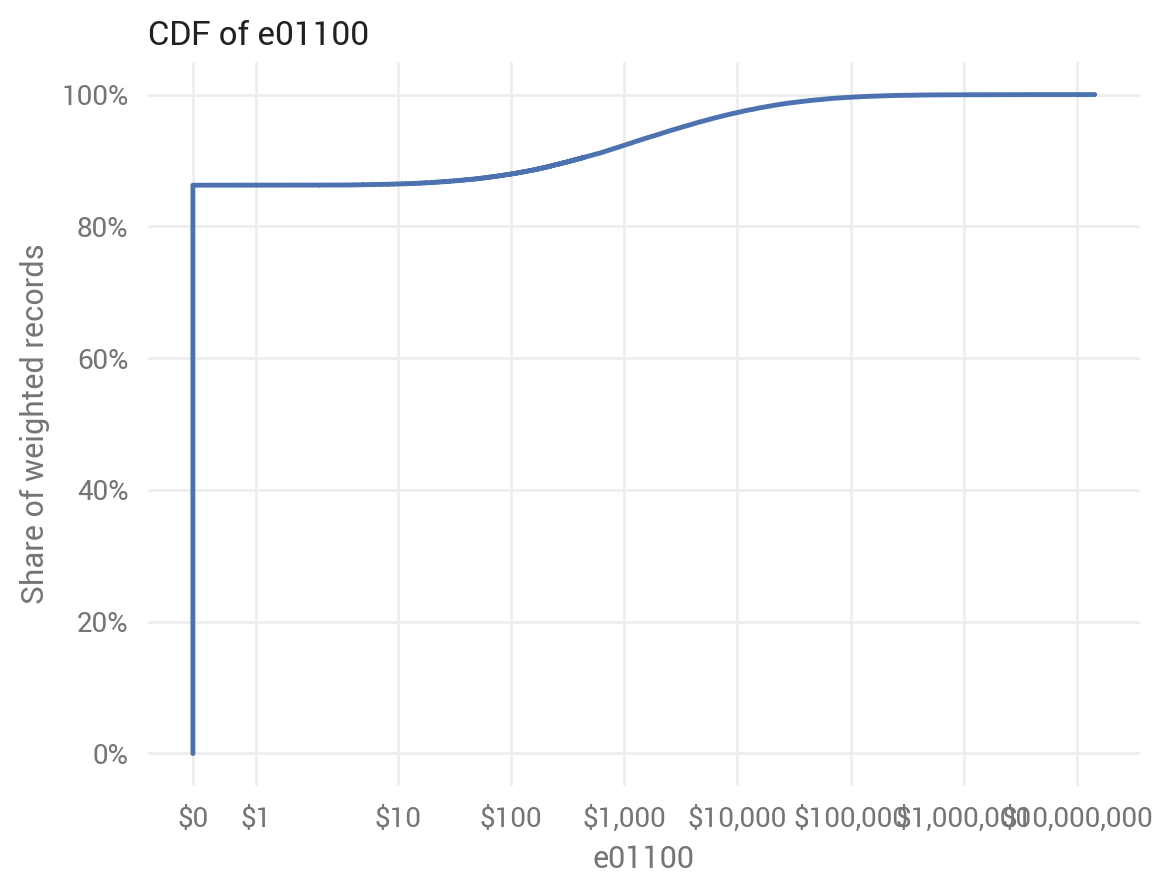

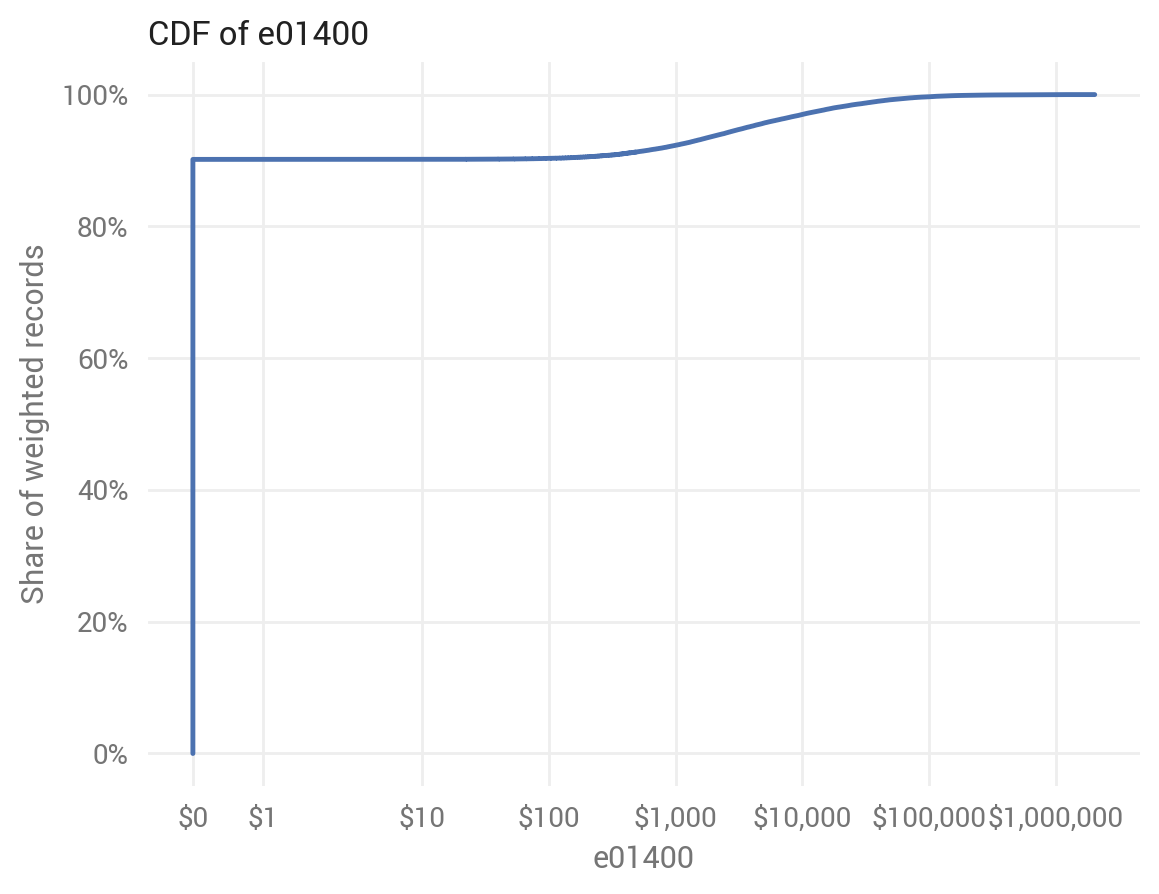

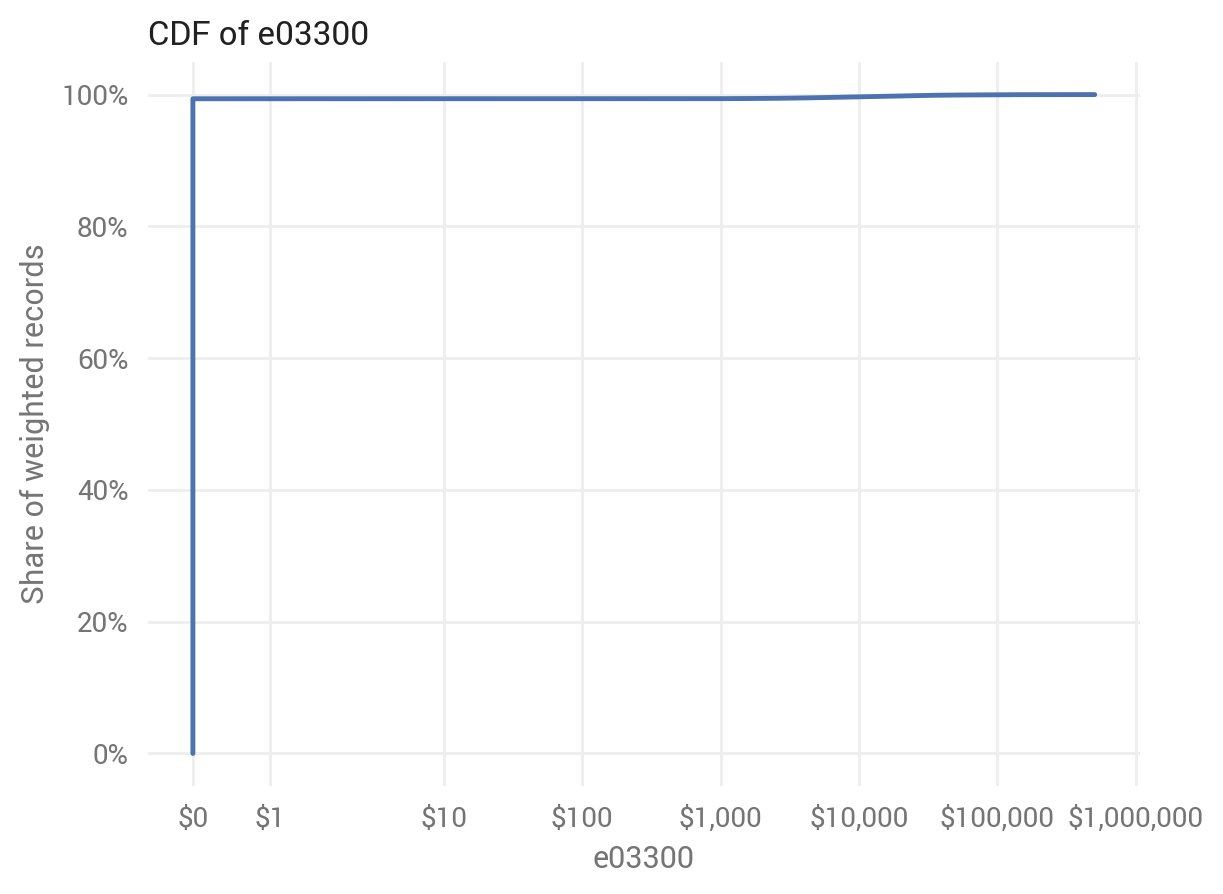

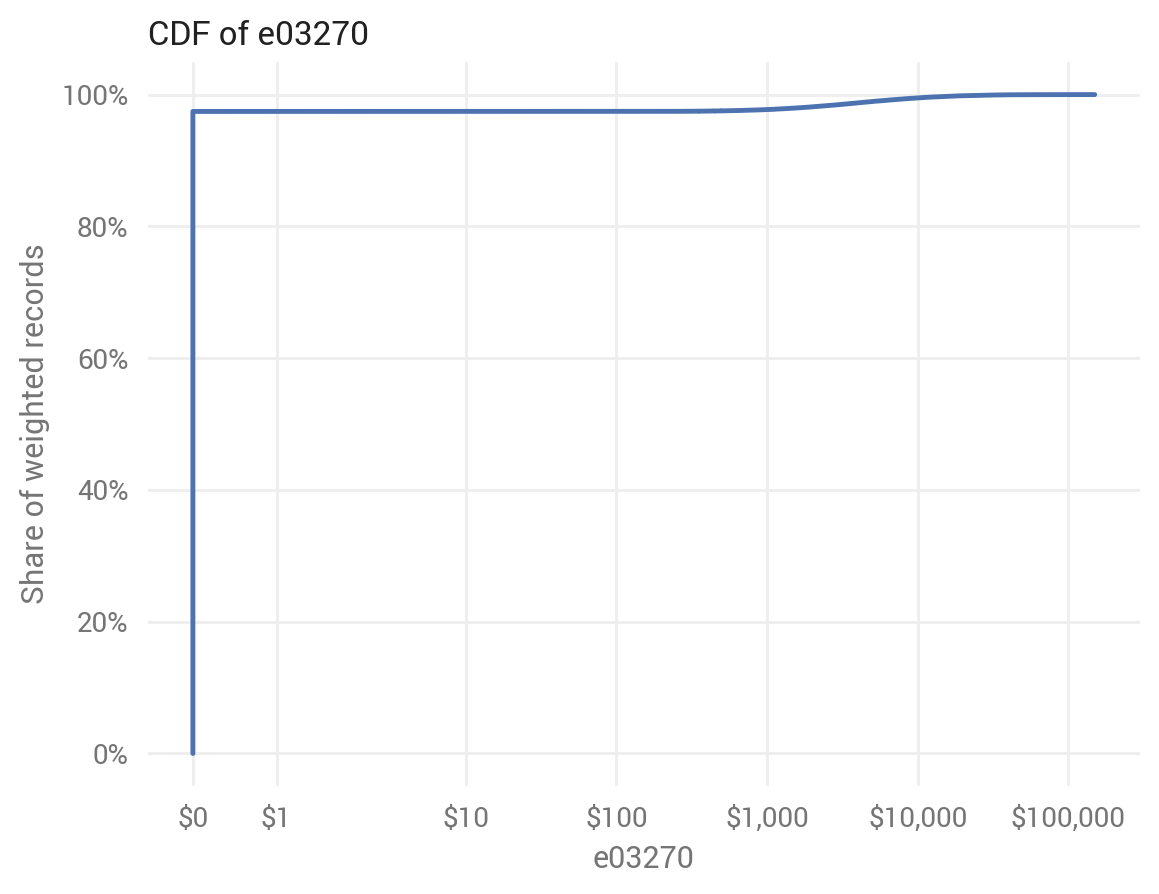

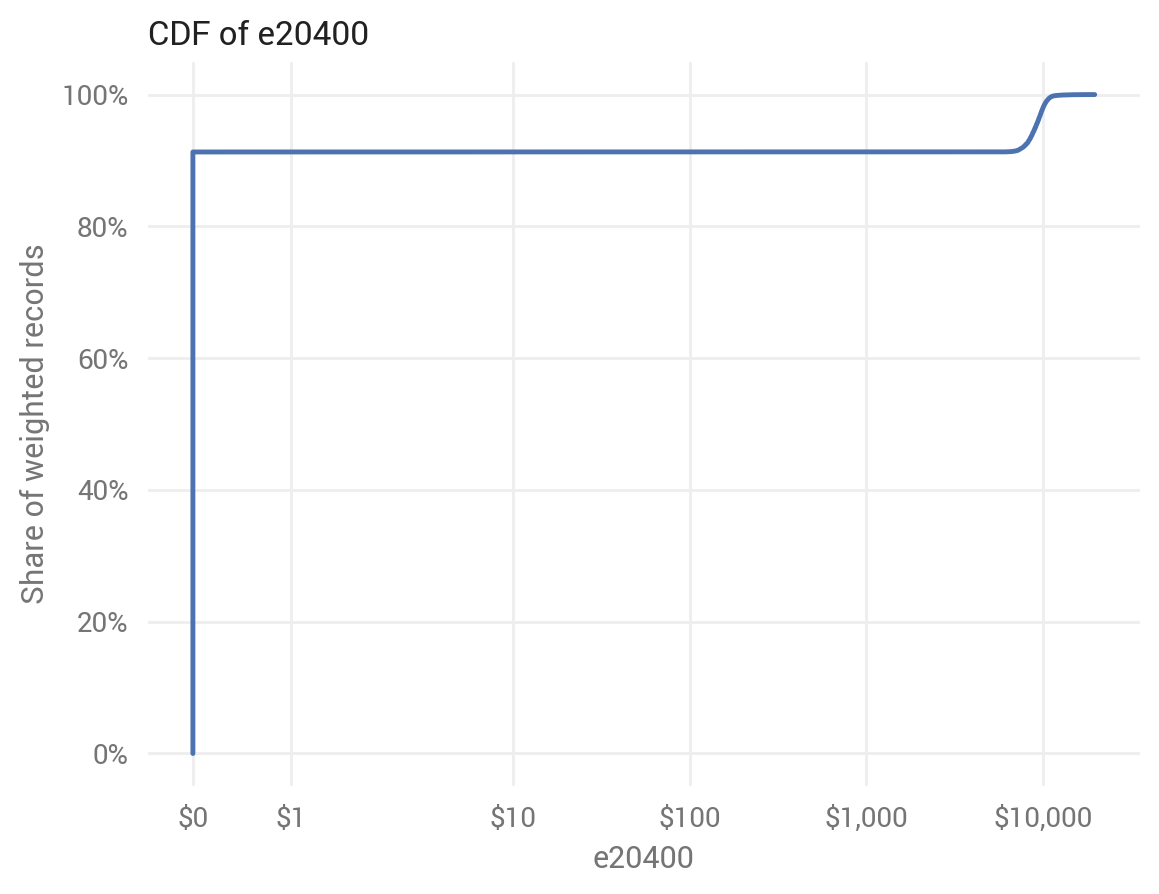

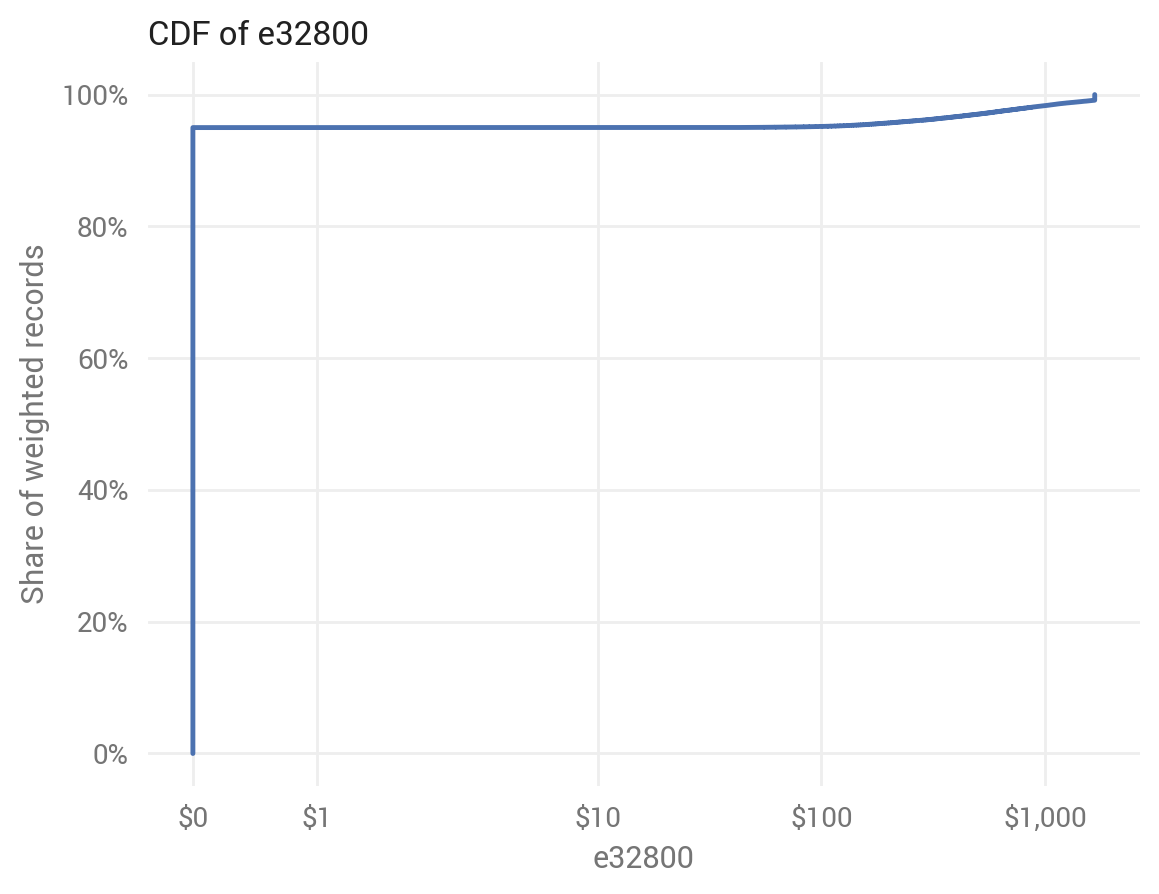

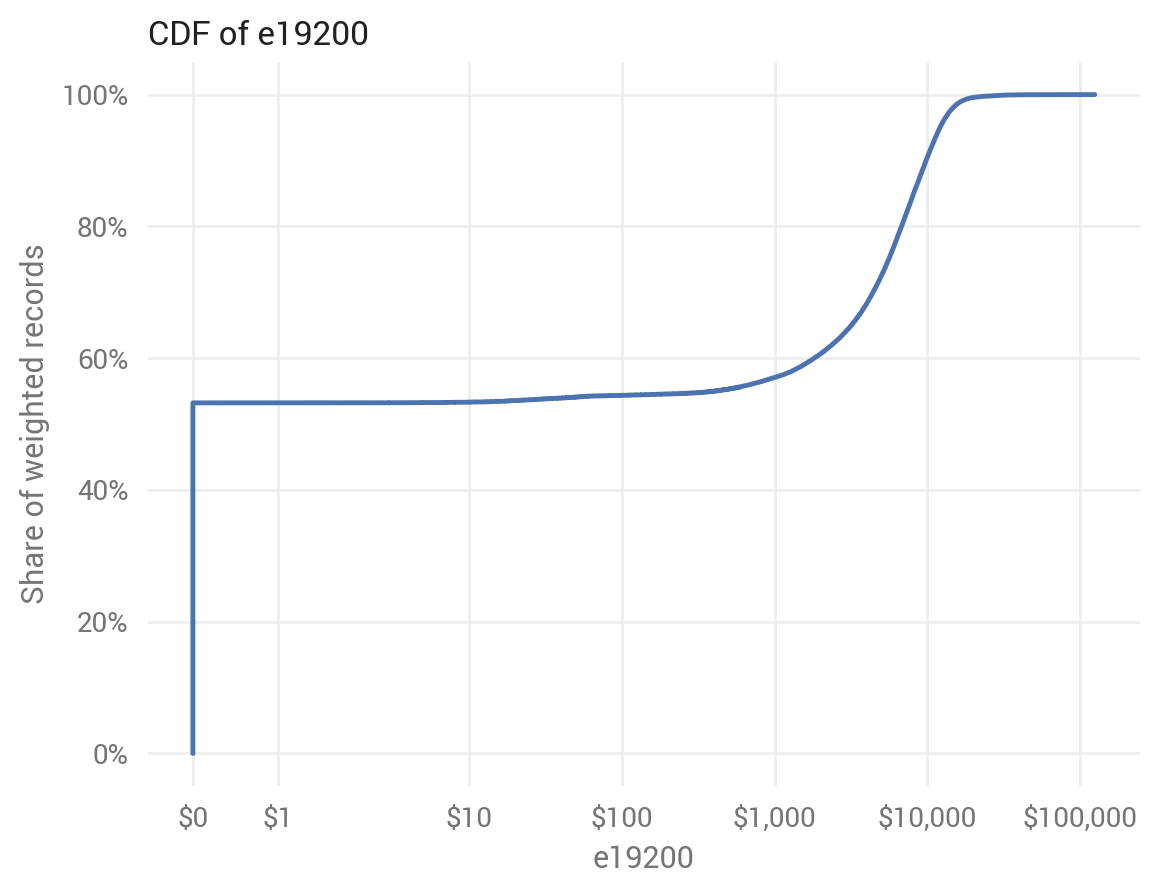

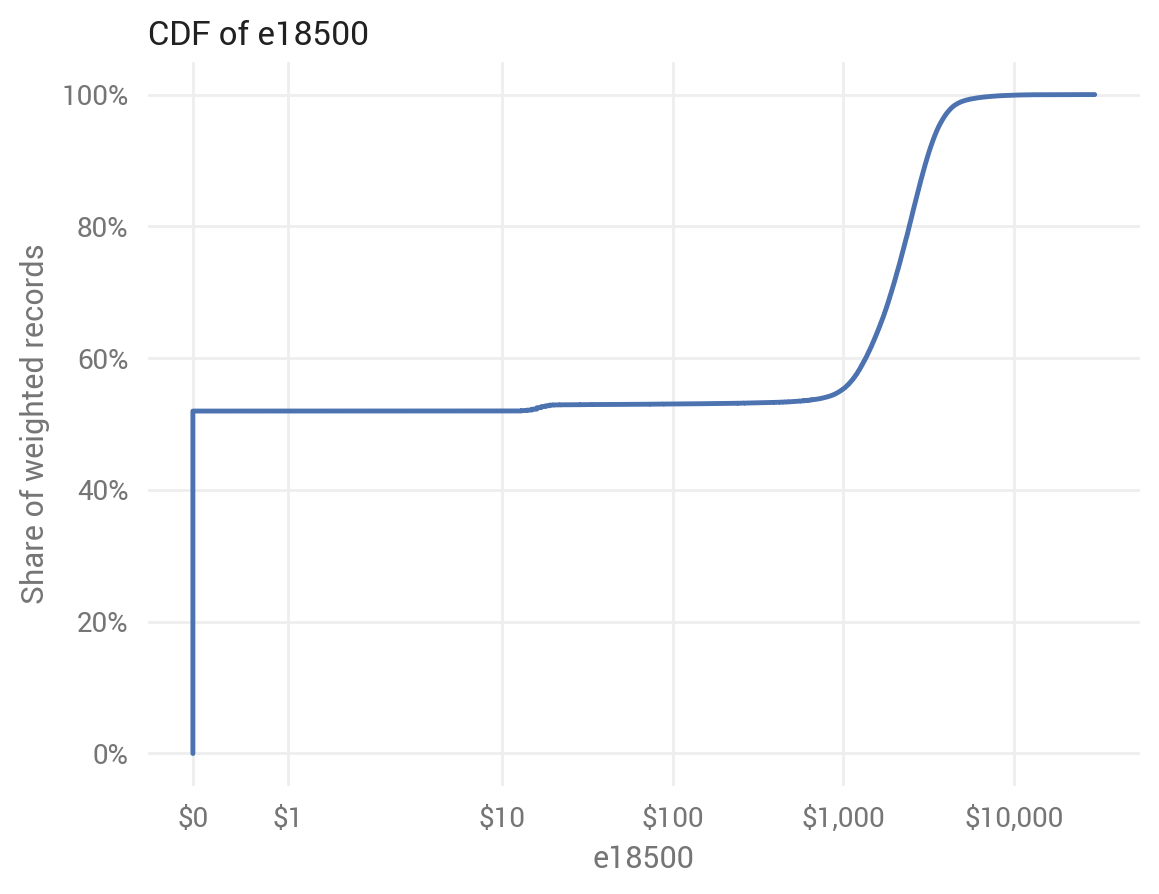

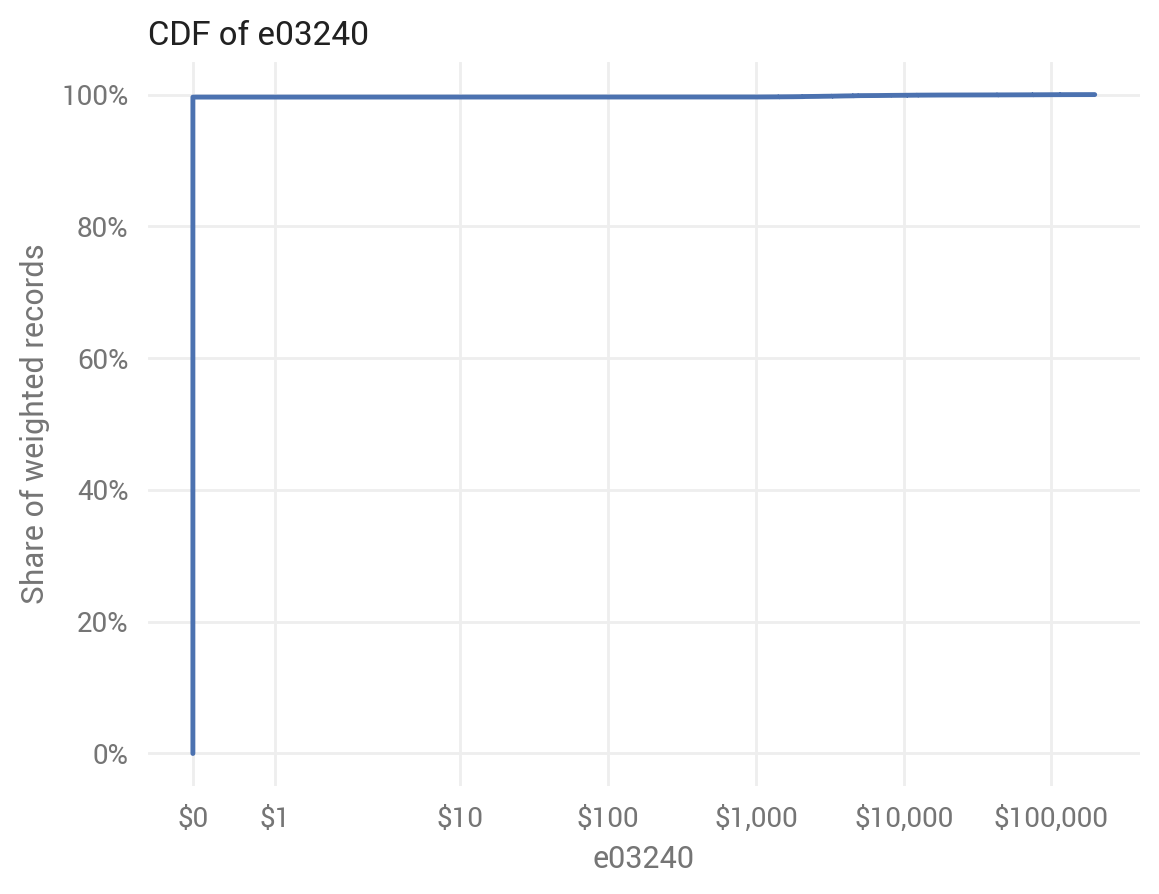

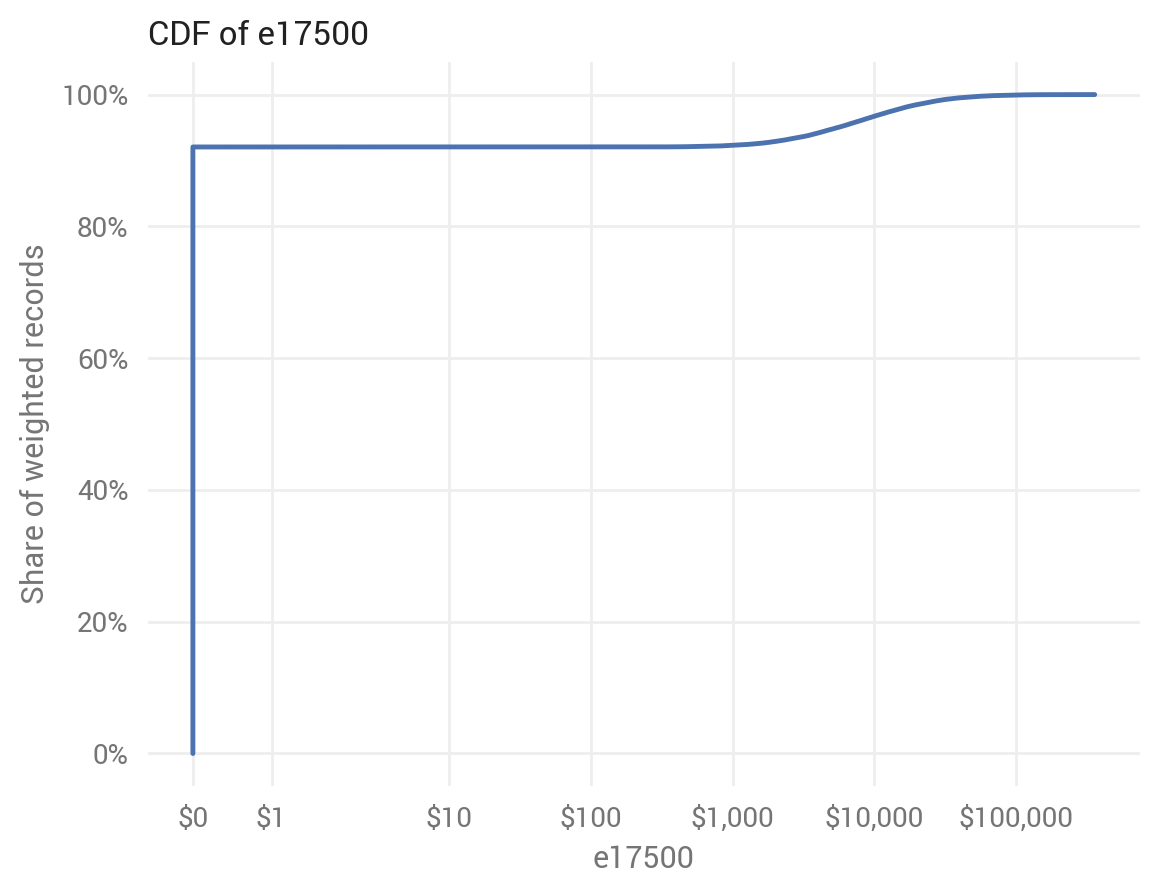

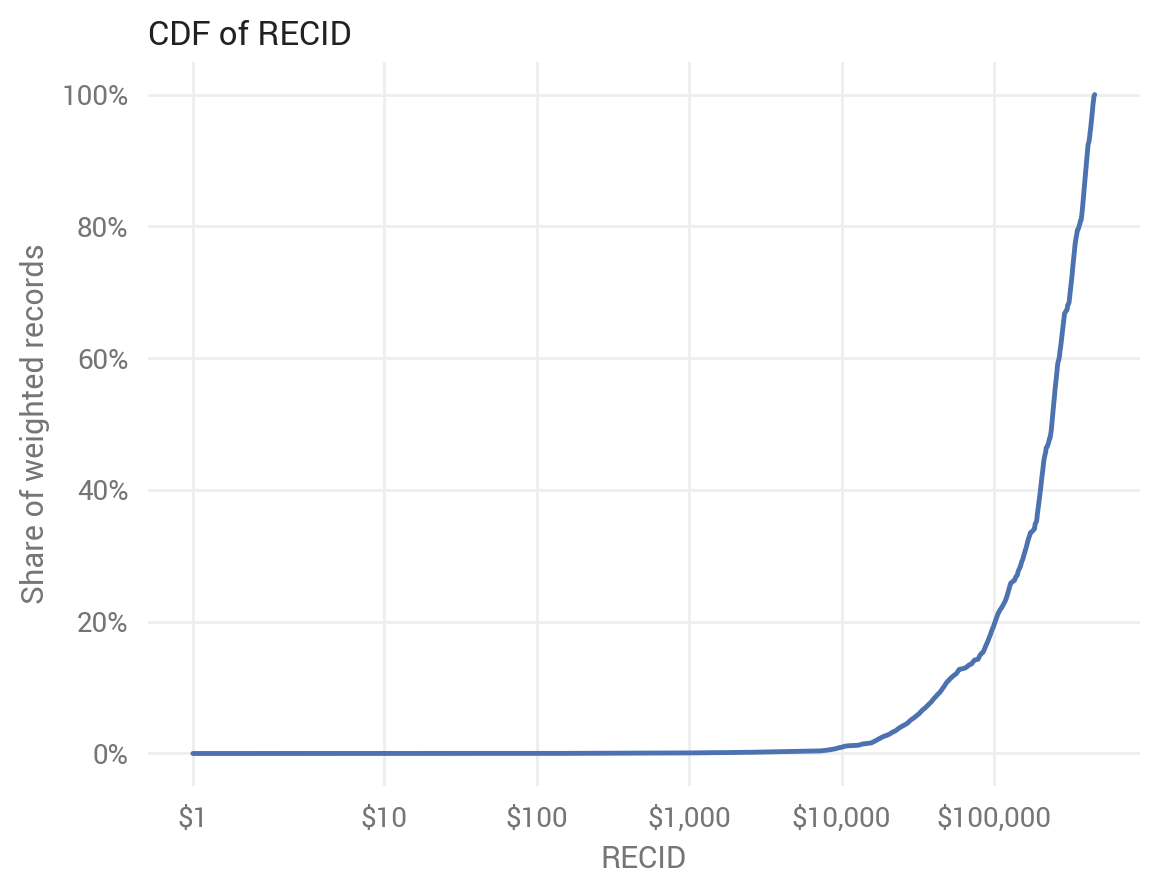

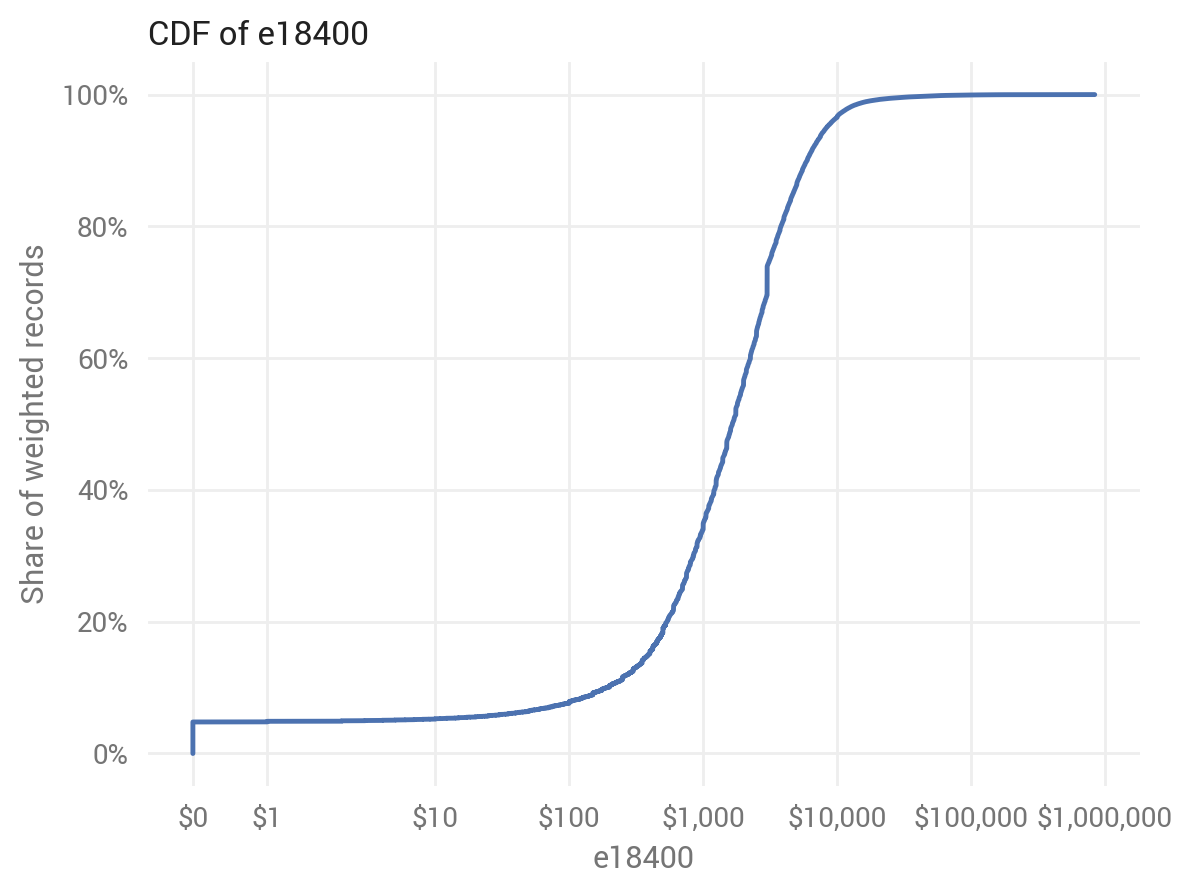

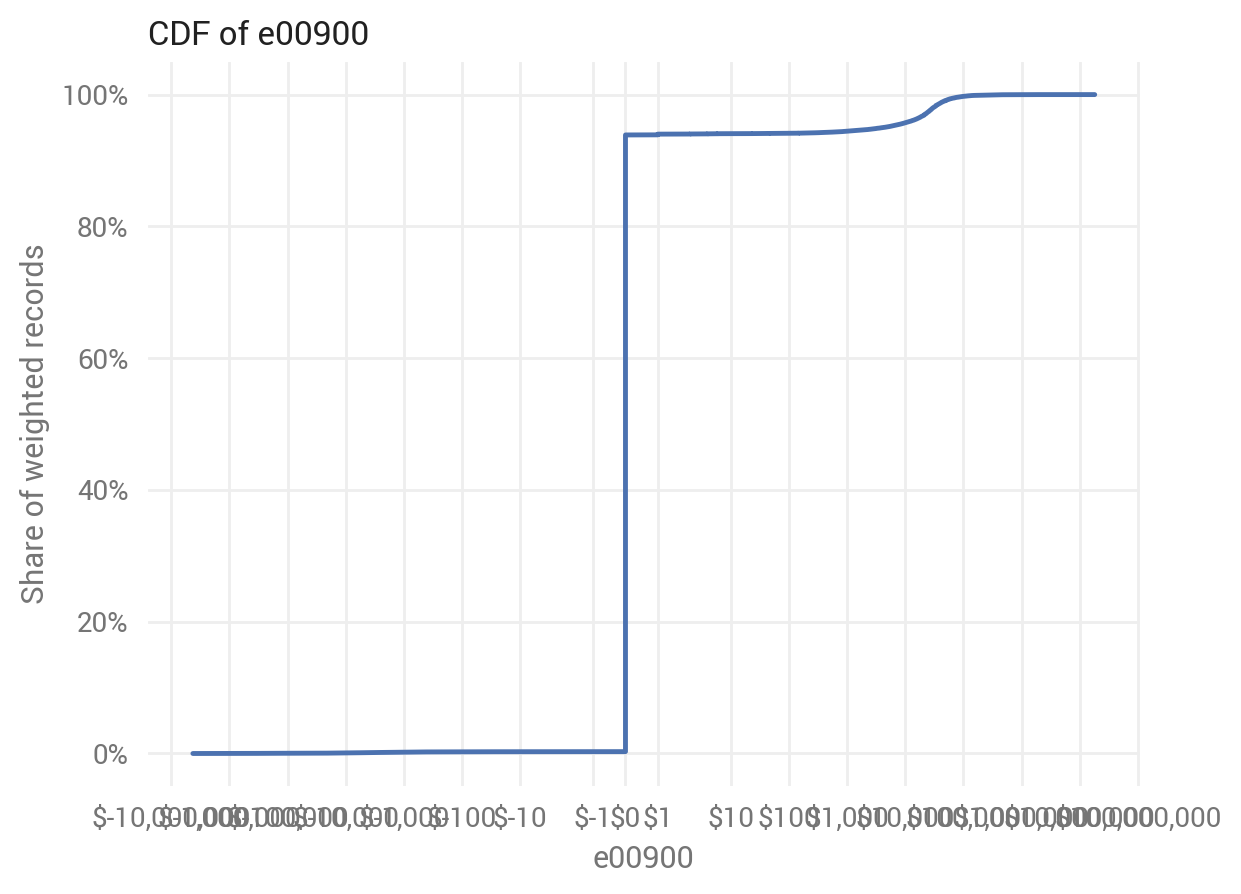

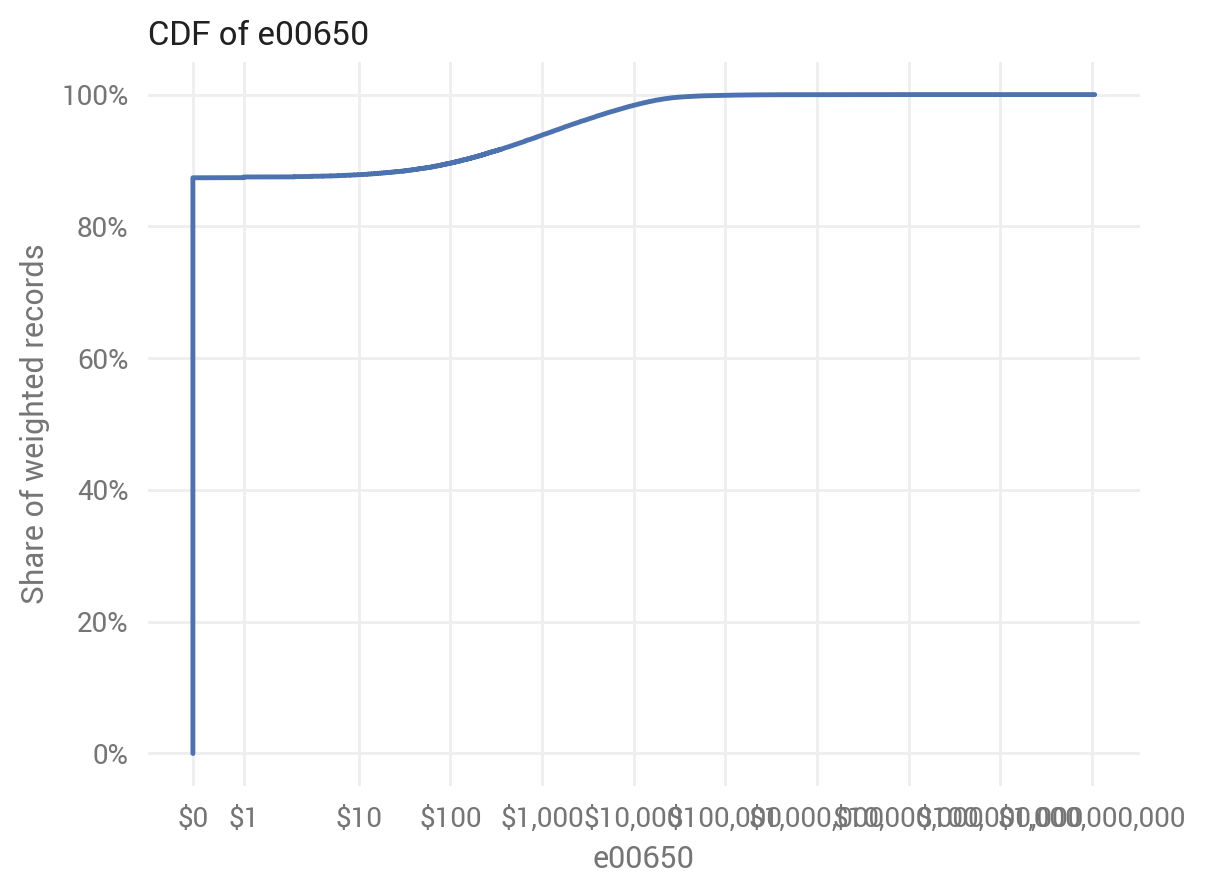

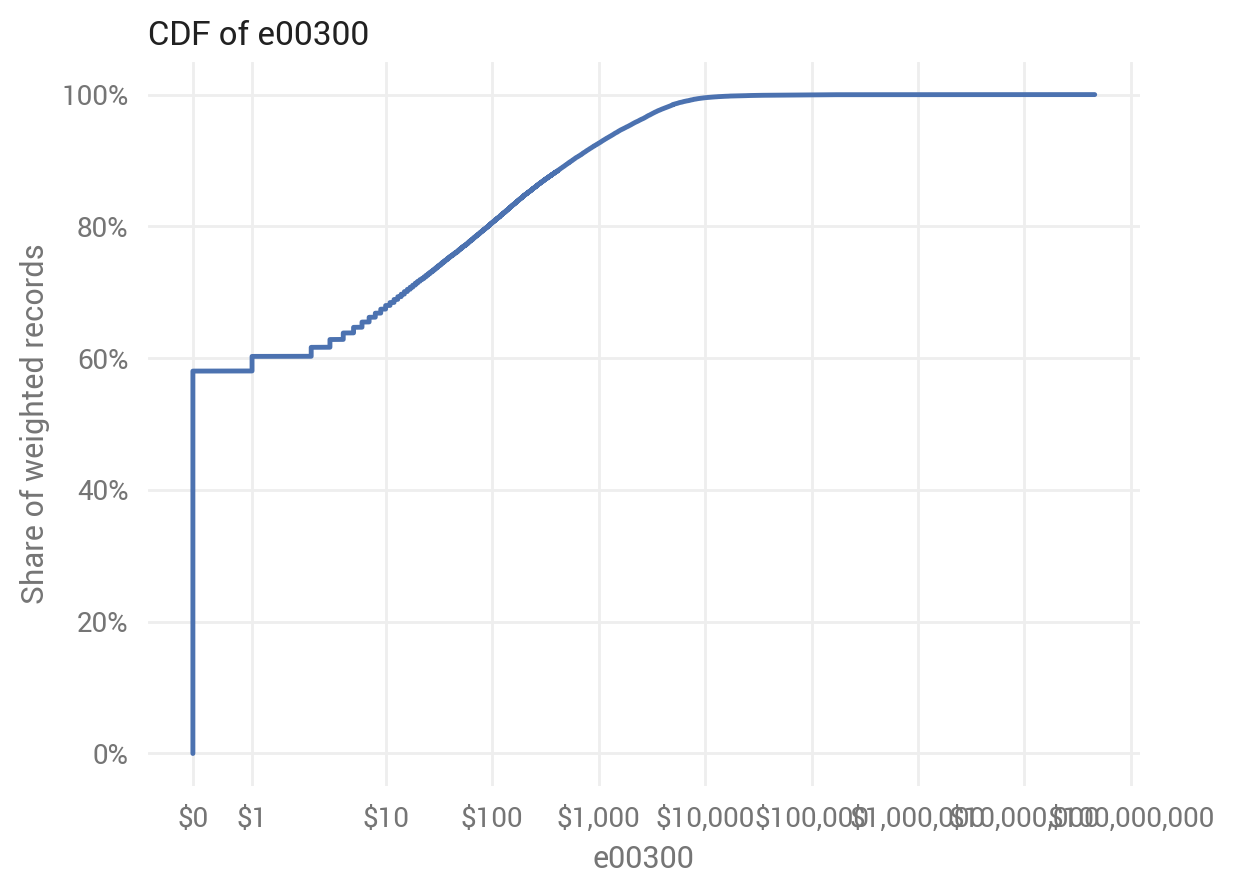

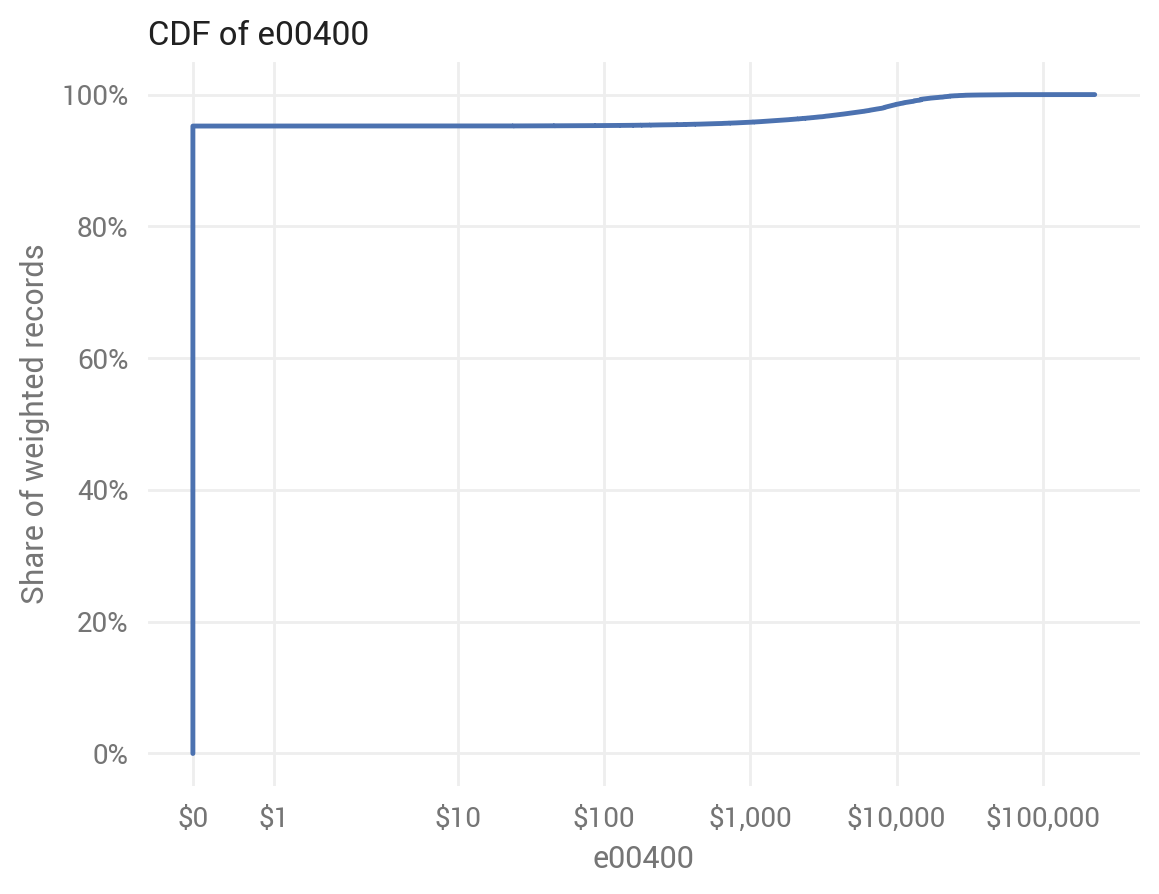

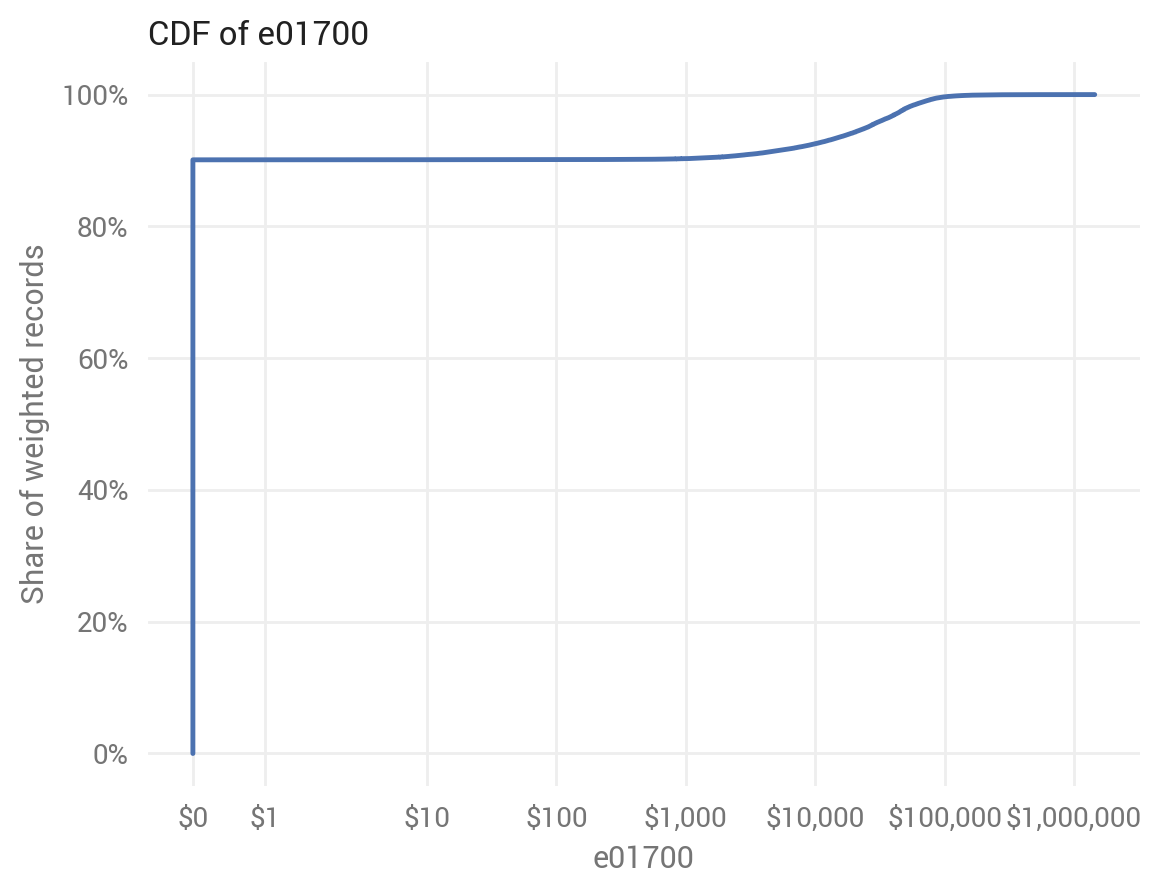

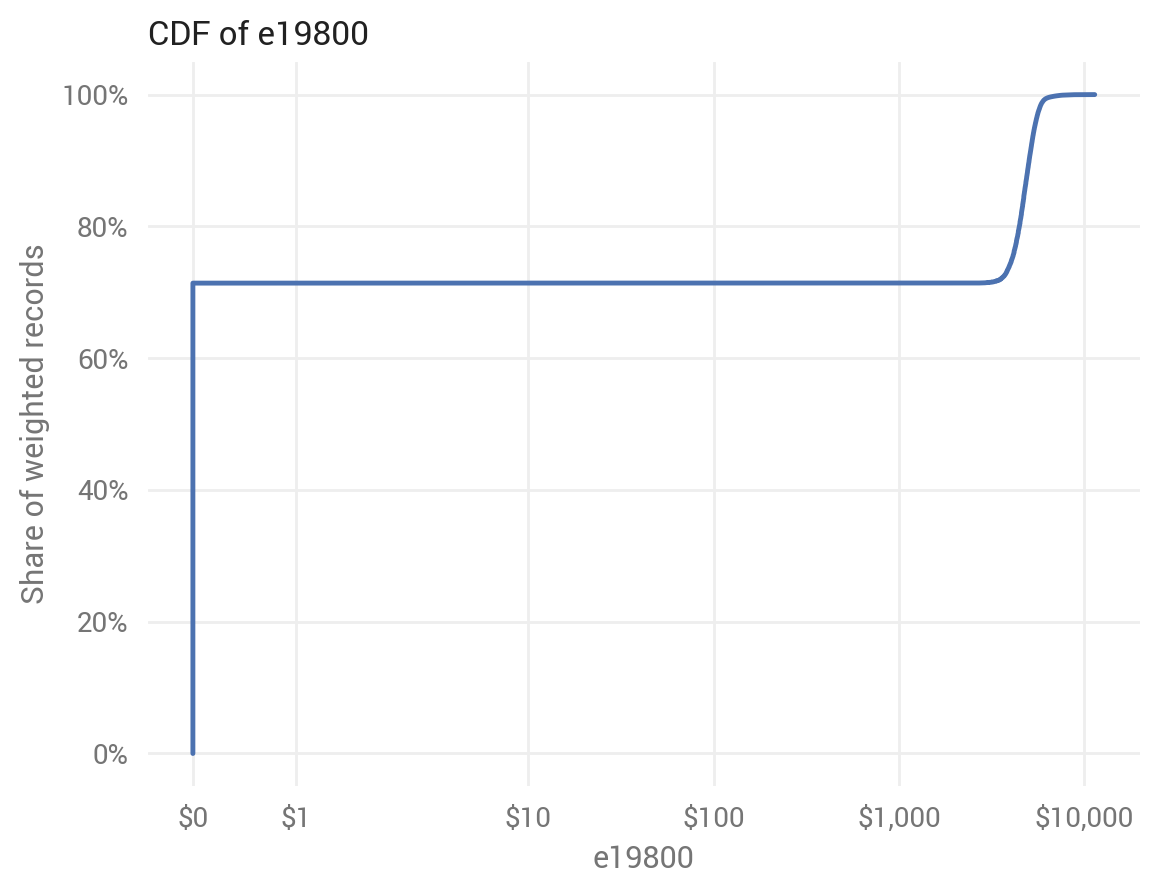

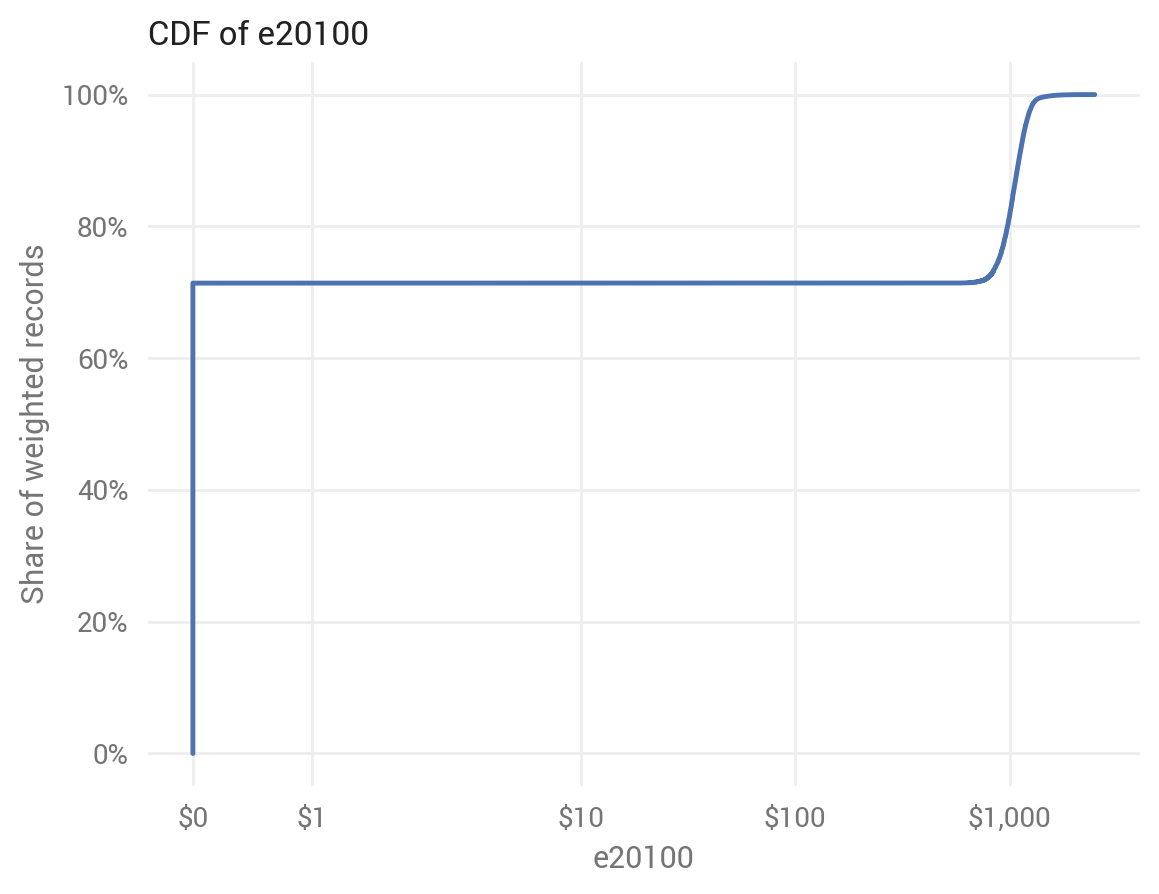

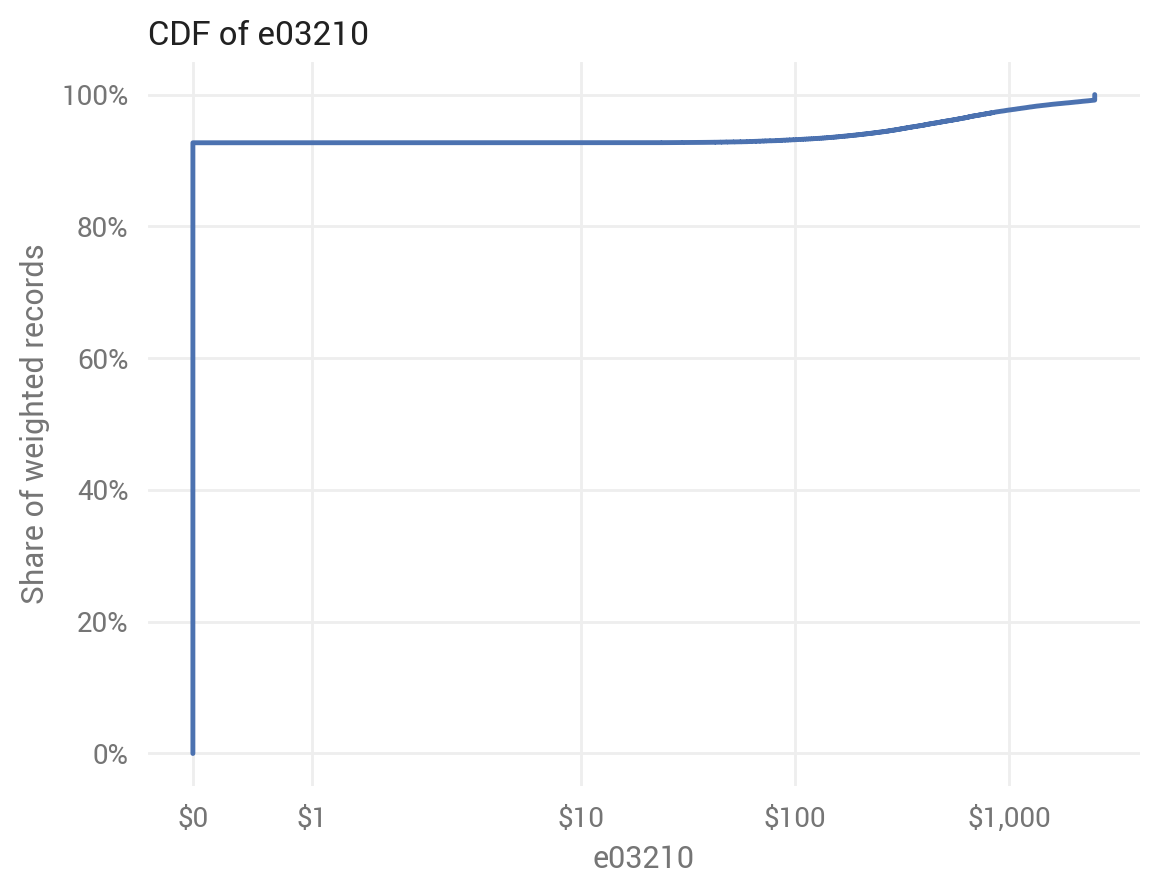

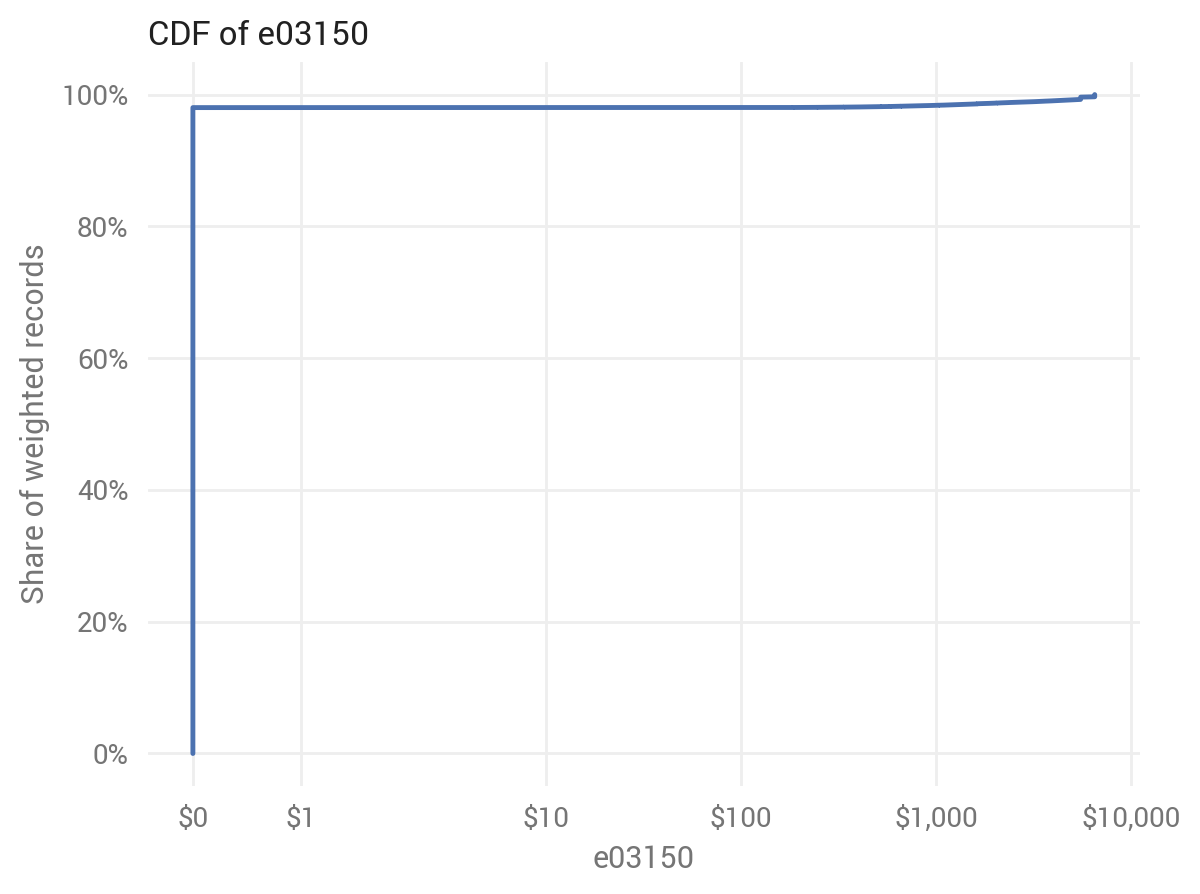

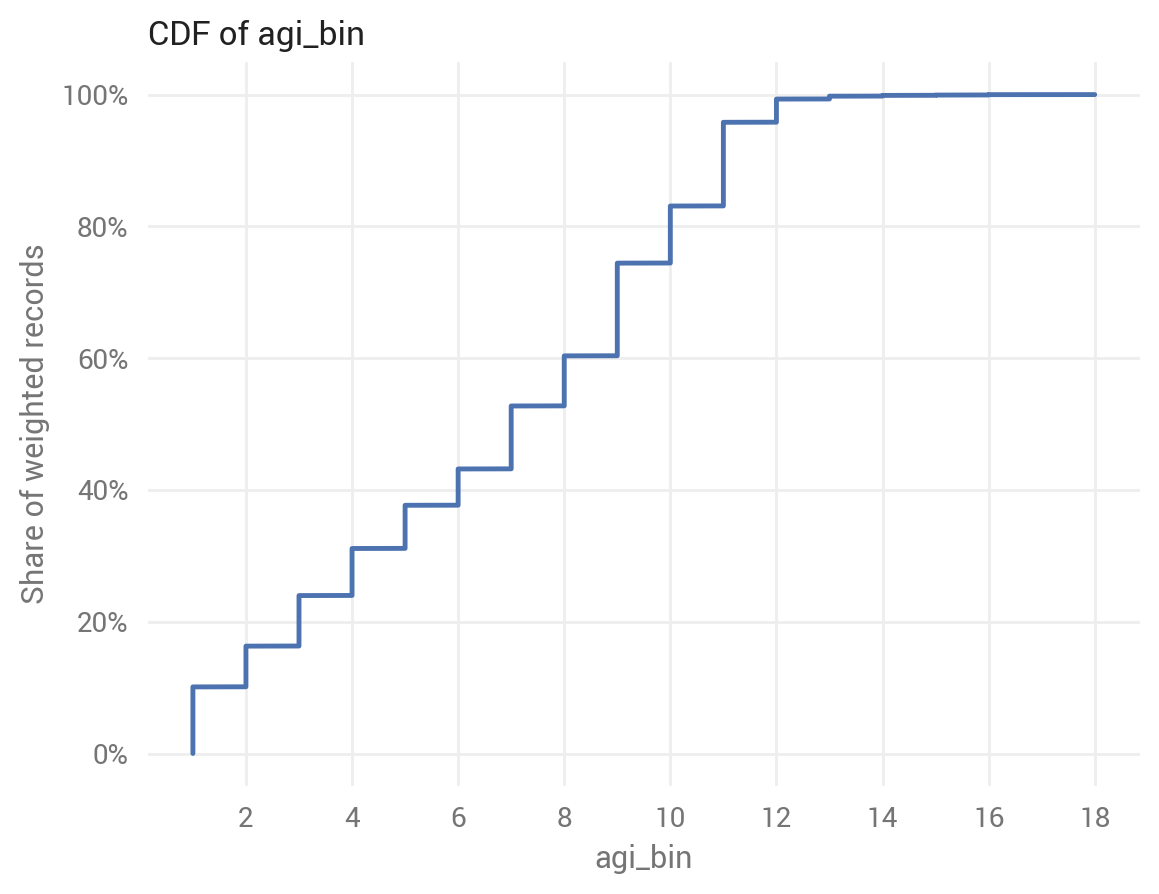

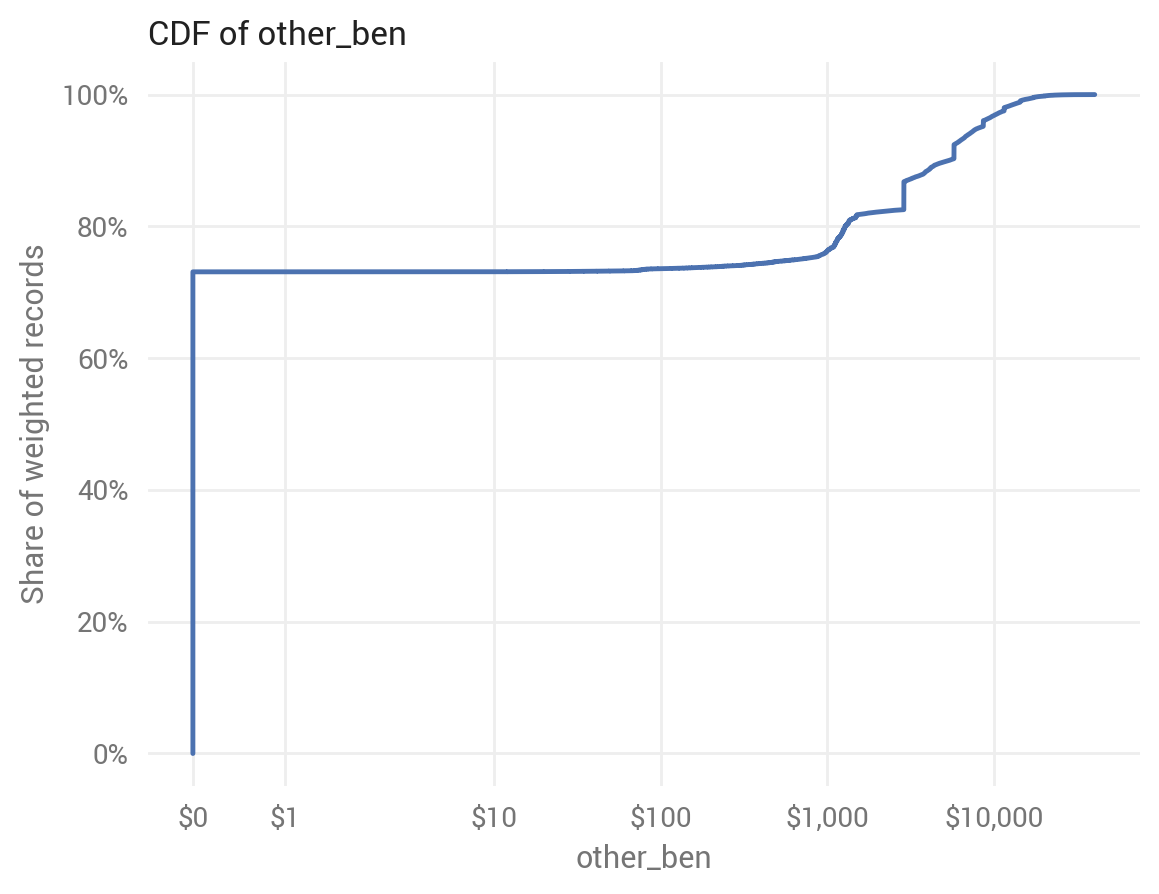

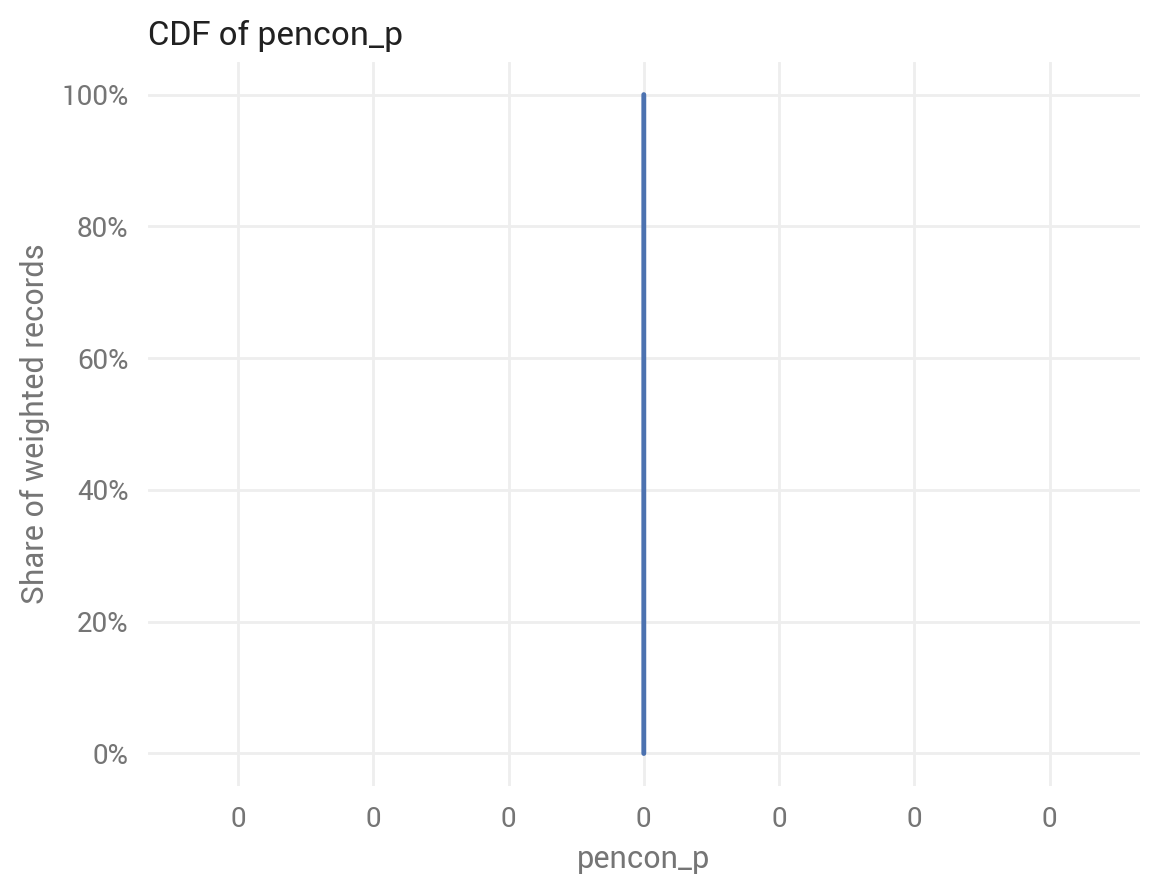

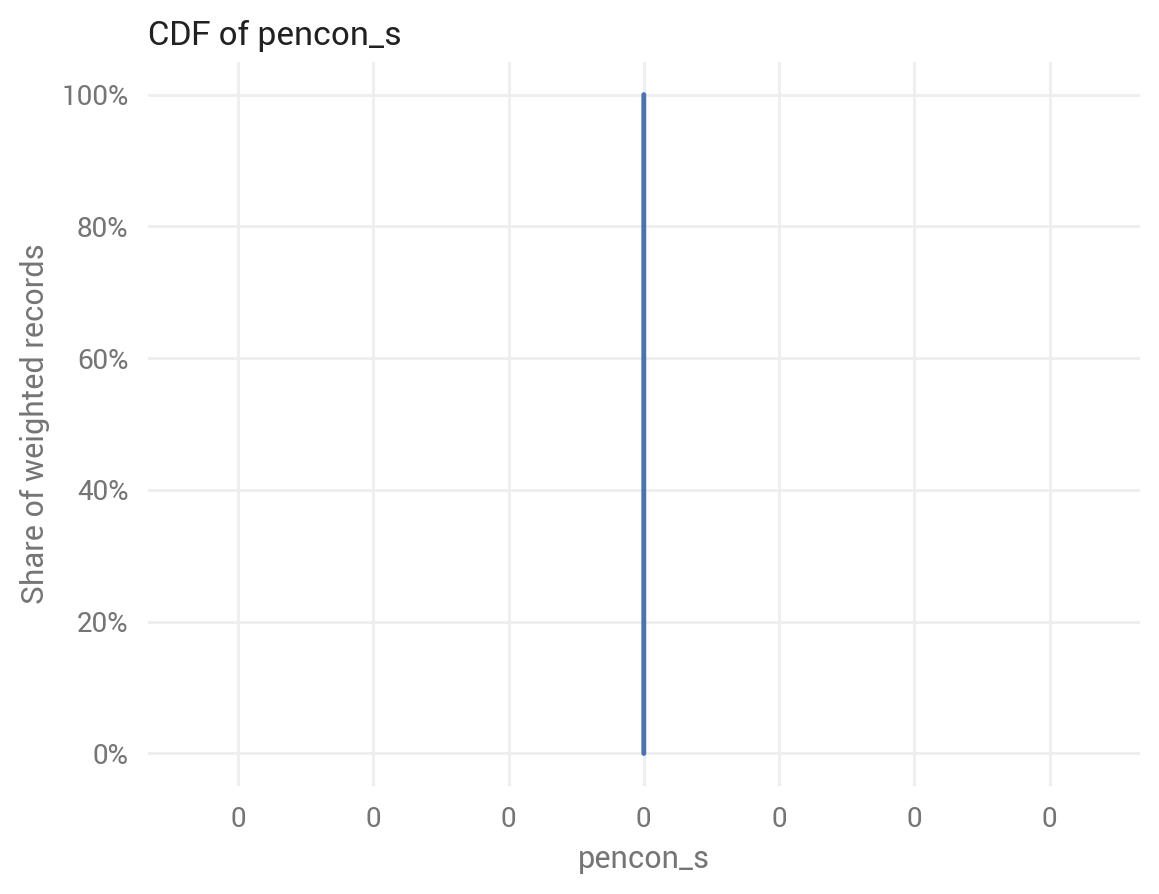

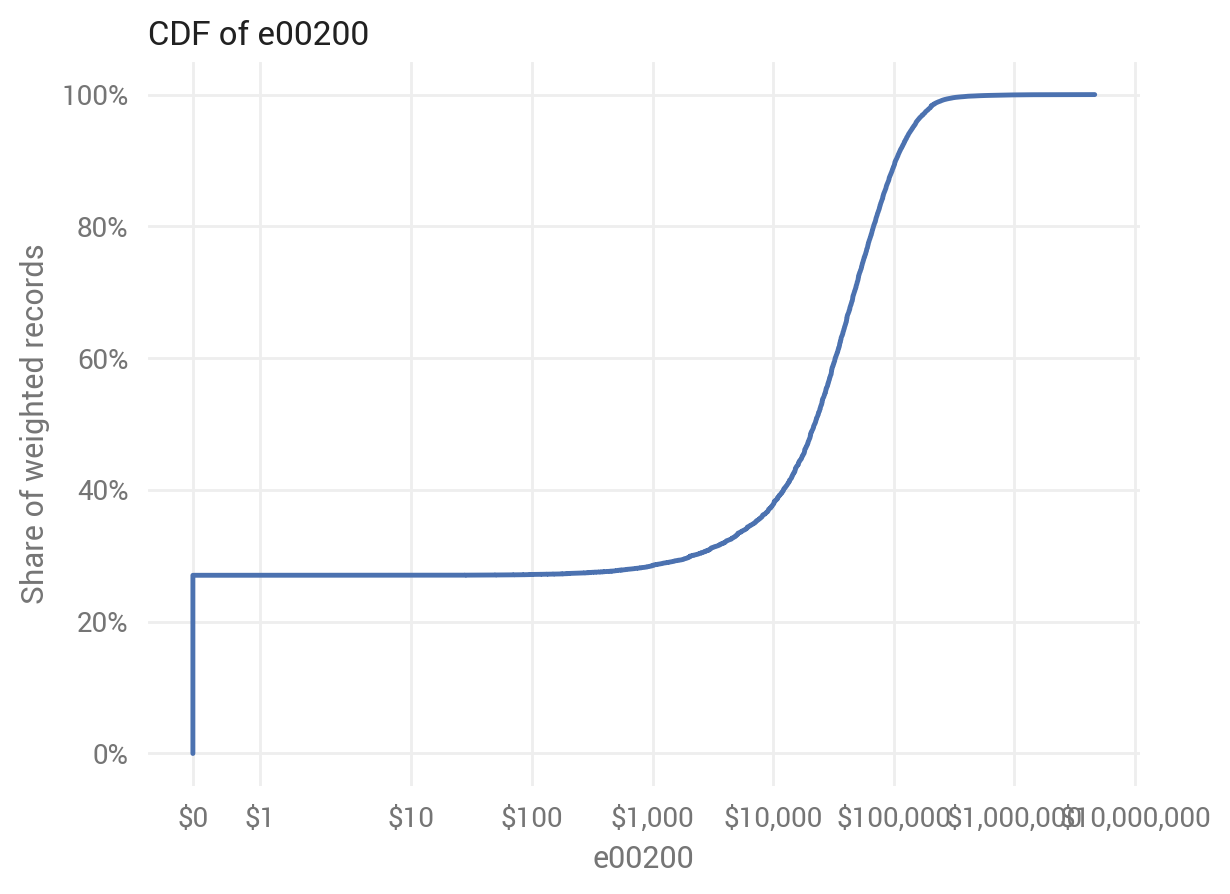

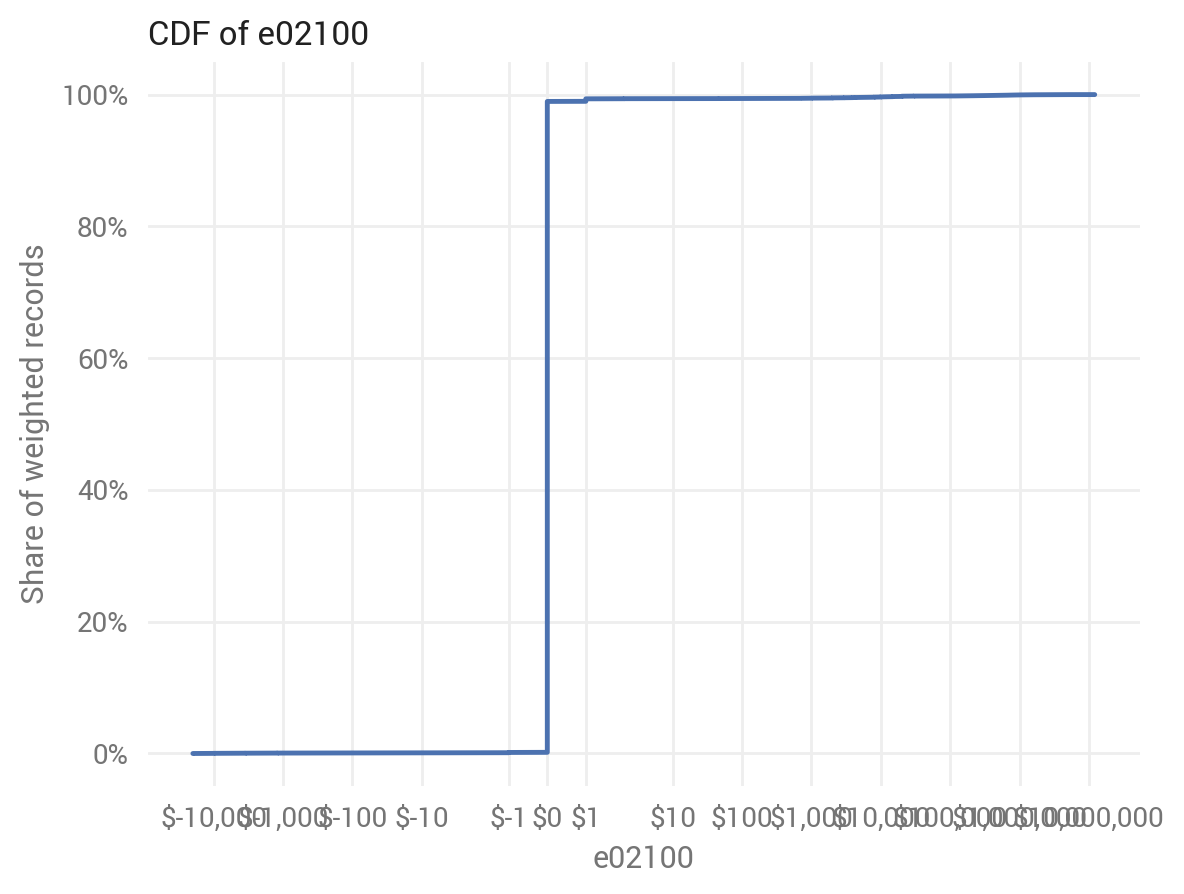

In [11]:
for i in cps.columns:
  if i != 'weight':
    plot_cdf(cps, i)